## **Data Analysis**

**Input for our analysis:**
- **Angel - Startup relations**
- **Startup list** including Name, #of angel investors, industry, region
- **Angel list** including #of investments, name, region, average shares, number of investments per industry

**Steps of our analysis:**

1. **Creating a network graph**

2. **Descriptive Statistics** on:
   - _Angels_
   - _Startups_
   - _Network_

3. **Simulating a network graph with Null distribution**

4. **Community detection** in actual and simulated communities

5. **Analysis of similarity of communities** in terms of:
   - _Reach and Power_
   - _Investment Style_
   - _Personal Characteristics_

## Importing libraries and data - 0

In [158]:
#all libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime


In [159]:
#all data sets
#open from csv the shareholder list as a dataframe

df_investment_rel_angel_startup = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_relations_2021_rows_updated - shareholder_relations_2021_rows_updated.csv")
    #open from csv the shareholders as a dataframe
# df_shareholders = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholders.csv', sep=';')
    #open from csv the investments as a dataframe
df_angels = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels - angels.csv")
    #open from csv the startups as a dataframe
df_startups = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/startups_rows_updated - startups_rows_updated.csv")
#get all shareholder with shareholder type angel    
# df_angels = df_angels[df_angels['shareholder_type'] == 'angel']


In [160]:
#replace shareholder_name spaces with _
df_angels['shareholder_name'] = df_angels['shareholder_name'].str.replace(' ', '_')

In [161]:
# Check if 'shareholder_name' is unique in df_angels
if df_angels['shareholder_name'].is_unique:
    # If it is unique, you can set it as index and perform the map operation
    df_investment_rel_angel_startup['shareholder_type'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels.set_index('shareholder_name')['shareholder_type'])
else:
    # If it is not unique, you need to handle the duplicates first
    # This is an example where we drop duplicates, keeping the first occurrence
    df_angels_unique = df_angels.drop_duplicates(subset=['shareholder_name'], keep='first')
    df_investment_rel_angel_startup['shareholder_type'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels_unique.set_index('shareholder_name')['shareholder_type'])

In [162]:
#return df startups with number_shareholders > 2
def filter_startups(df_startups):
    df_startups = df_startups[df_startups['number_shareholders'] >2]
    return df_startups
df_startups=filter_startups(df_startups)

In [163]:
#filter df_investment_rel_angel_startup for startups with number_shareholders > 2
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]
df_investment_rel_angel_startup

relation_id                     created_at  \
0           34337  2024-03-09 10:47:37.828776+00   
1            1963  2024-02-29 16:59:35.273749+00   
2            1958  2024-02-29 16:59:35.133672+00   
3            1959  2024-02-29 16:59:35.172778+00   
4            1970  2024-02-29 16:59:35.396716+00   
...           ...                            ...   
27769       12338  2024-02-29 20:08:01.461687+00   
27770       12336  2024-02-29 20:08:01.415954+00   
27771       12316  2024-02-29 20:08:00.893962+00   
27772       12329  2024-02-29 20:08:01.239844+00   
27773       12332  2024-02-29 20:08:01.320187+00   

                                        shareholder_name shareholder_location  \
0                                      Christian Jurisch          Senftenberg   
1                            Porsche Investments GmbH AG            Stuttgart   
2                                        Eugen Letkemann    Offenbach am Main   
3                                             Simon Vogt    Frankfurt am Main   
4      Helen Oy Finnisches Patent und Registeramts (P...             Helsinki   
...                                                  ...                  ...   
27769          Campione Ventures UG (haftungsbeschränkt)              Cologne   
27770                                      Thibaut Britz                Arlon   
27771                                      Marton Farago               Berlin   
27772                                Tim Roelen-Blasberg              Hamburg   
27773                                    MATUCA S.à r.l.           Luxembourg   

                birthdate register_id                        register_court  \
0      1984-10-08 0:00:00         NaN                                   NaN   
1                     NaN  HRB 769358                             Stuttgart   
2      1985-05-16 0:00:00         NaN                                   NaN   
3      1991-11-19 0:00:00         NaN                                   NaN   
4                     NaN         NaN                                   NaN   
...                   ...         ...                                   ...   
27769  1948-02-17 0:00:00   HRB 89795                                  Köln   
27770  1983-01-21 0:00:00         NaN                                   NaN   
27771  1982-07-15 0:00:00         NaN                                   NaN   
27772  1986-02-21 0:00:00         NaN                                   NaN   
27773                 NaN     B228349  Registre de Commerce et des Sociétés   

      percentage_of_total_shares shareholder_type  \
0                          38.64            angel   
1                        21.6494              NaN   
2                        18.0854            angel   
3                        18.0854            angel   
4                        24.0945            angel   
...                          ...              ...   
27769                     0.1913            angel   
27770                     0.9563            angel   
27771                     7.2978            angel   
27772                     0.5847            angel   
27773                     1.9098              NaN   

                         startup_name  ...         lastname  \
0      [NEXT] Automotive Testing GmbH  ...          jurisch   
1                        &Charge GmbH  ...              NaN   
2                        &Charge GmbH  ...        letkemann   
3                        &Charge GmbH  ...             vogt   
4                        &Charge GmbH  ...              NaN   
...                               ...  ...              ...   
27769                    ZYP.ONE GmbH  ...  von schwarzkopf   
27770                    ZYP.ONE GmbH  ...            britz   
27771                    ZYP.ONE GmbH  ...           farago   
27772                    ZYP.ONE GmbH  ...  roelen-blasberg   
27773                    ZYP.ONE GmbH  ...              NaN   

                 startup_industry_mapped startup_industry  \
0   

In [164]:
#drop duplicates in df_angels
print(len(df_angels))
df_angels = df_angels.drop_duplicates(subset = "shareholder_name", keep = "first") 
print(len(df_angels))

19887
19887


In [165]:
#return all rows in df_angels where firstname and lastname are duplicates
df_angels_duplicates = df_angels[df_angels.duplicated(subset=['firstname', 'lastname'])]
#give me only the first and last name of the duplicates as well as shareholder_name
df_angels_duplicates = df_angels_duplicates[['firstname', 'lastname', 'shareholder_name']]
#ignore all where firstname and lastname are NaN
df_angels_duplicates = df_angels_duplicates.dropna(subset=['firstname', 'lastname'])
#sort by first name
df_angels_duplicates = df_angels_duplicates.sort_values(by=['firstname'])

df_angels_duplicates

firstname  lastname            shareholder_name
2123    Kai-Uwe  Schröder  Prof._Dr._Kai-Uwe_Schröder
14557     Peter     Bruhn                 Peter_Bruhn

In [166]:
#get all from df angel where firstname is Wolgang and lastname is Rams
temp =df_angels[df_angels['firstname'] == 'Andreas'][df_angels['lastname'] == 'Koch']
#only giveme the first and last name and shareholder_name and birthdate
temp['shareholder_name']
df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == 'Andreas_Koch']


relation_id                     created_at         shareholder_name  \
5186        17913  2024-02-29 21:03:00.752933+00             Andreas Koch   
27276        8910  2024-02-29 19:10:44.339912+00  Koch, Prof. Dr. Andreas   

        shareholder_location           birthdate register_id register_court  \
5186   Vogtsburg/Oberrotweil  1957-01-09 0:00:00         NaN            NaN   
27276          64807 Dieburg  1957-01-09 0:00:00         NaN            NaN   

      percentage_of_total_shares shareholder_type              startup_name  \
5186                         1.5            angel           Compositas GmbH   
27276                          2            angel  Xelera Technologies GmbH   

       ... lastname      startup_industry_mapped startup_industry  \
5186   ...     koch  technology_digital_services           gaming   
27276  ...      NaN  technology_digital_services         software   

             startup_region count  region_mapping gender shareholder_region  \
5186   freiburg im breisgau   1.0           other   male              other   
27276             darmstadt   1.0       frankfurt   male              other   

        age    year  
5186   67.0  2018.0  
27276  67.0  2018.0  

[2 rows x 28 columns]

In [167]:
#clean df_investment_rel_angel_startup
#drop rows where shareholder_type is 'md'
print(f"before dropping mds:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'md']
print(f"after dropping mds:{len(df_investment_rel_angel_startup)}")

before dropping mds:21852
after dropping mds:21852


In [168]:
#filter df_investment_rel_angel_startup for startups with number_shareholders > 2
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]
df_investment_rel_angel_startup

relation_id                     created_at  \
0           34337  2024-03-09 10:47:37.828776+00   
1            1963  2024-02-29 16:59:35.273749+00   
2            1958  2024-02-29 16:59:35.133672+00   
3            1959  2024-02-29 16:59:35.172778+00   
4            1970  2024-02-29 16:59:35.396716+00   
...           ...                            ...   
27769       12338  2024-02-29 20:08:01.461687+00   
27770       12336  2024-02-29 20:08:01.415954+00   
27771       12316  2024-02-29 20:08:00.893962+00   
27772       12329  2024-02-29 20:08:01.239844+00   
27773       12332  2024-02-29 20:08:01.320187+00   

                                        shareholder_name shareholder_location  \
0                                      Christian Jurisch          Senftenberg   
1                            Porsche Investments GmbH AG            Stuttgart   
2                                        Eugen Letkemann    Offenbach am Main   
3                                             Simon Vogt    Frankfurt am Main   
4      Helen Oy Finnisches Patent und Registeramts (P...             Helsinki   
...                                                  ...                  ...   
27769          Campione Ventures UG (haftungsbeschränkt)              Cologne   
27770                                      Thibaut Britz                Arlon   
27771                                      Marton Farago               Berlin   
27772                                Tim Roelen-Blasberg              Hamburg   
27773                                    MATUCA S.à r.l.           Luxembourg   

                birthdate register_id                        register_court  \
0      1984-10-08 0:00:00         NaN                                   NaN   
1                     NaN  HRB 769358                             Stuttgart   
2      1985-05-16 0:00:00         NaN                                   NaN   
3      1991-11-19 0:00:00         NaN                                   NaN   
4                     NaN         NaN                                   NaN   
...                   ...         ...                                   ...   
27769  1948-02-17 0:00:00   HRB 89795                                  Köln   
27770  1983-01-21 0:00:00         NaN                                   NaN   
27771  1982-07-15 0:00:00         NaN                                   NaN   
27772  1986-02-21 0:00:00         NaN                                   NaN   
27773                 NaN     B228349  Registre de Commerce et des Sociétés   

      percentage_of_total_shares shareholder_type  \
0                          38.64            angel   
1                        21.6494              NaN   
2                        18.0854            angel   
3                        18.0854            angel   
4                        24.0945            angel   
...                          ...              ...   
27769                     0.1913            angel   
27770                     0.9563            angel   
27771                     7.2978            angel   
27772                     0.5847            angel   
27773                     1.9098              NaN   

                         startup_name  ...         lastname  \
0      [NEXT] Automotive Testing GmbH  ...          jurisch   
1                        &Charge GmbH  ...              NaN   
2                        &Charge GmbH  ...        letkemann   
3                        &Charge GmbH  ...             vogt   
4                        &Charge GmbH  ...              NaN   
...                               ...  ...              ...   
27769                    ZYP.ONE GmbH  ...  von schwarzkopf   
27770                    ZYP.ONE GmbH  ...            britz   
27771                    ZYP.ONE GmbH  ...           farago   
27772                    ZYP.ONE GmbH  ...  roelen-blasberg   
27773                    ZYP.ONE GmbH  ...              NaN   

                 startup_industry_mapped startup_industry  \
0   

In [169]:
#drop duplicates in df_angels
print(len(df_angels))
df_angels = df_angels.drop_duplicates(subset = "shareholder_name", keep = "first") 
print(len(df_angels))

19887
19887


In [170]:
#get all from df angel where firstname is Wolgang and lastname is Rams
temp =df_angels[df_angels['firstname'] == 'Andreas'][df_angels['lastname'] == 'Koch']
#only giveme the first and last name and shareholder_name and birthdate
temp['shareholder_name']
df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == 'Andreas_Koch']

relation_id                     created_at         shareholder_name  \
5186        17913  2024-02-29 21:03:00.752933+00             Andreas Koch   
27276        8910  2024-02-29 19:10:44.339912+00  Koch, Prof. Dr. Andreas   

        shareholder_location           birthdate register_id register_court  \
5186   Vogtsburg/Oberrotweil  1957-01-09 0:00:00         NaN            NaN   
27276          64807 Dieburg  1957-01-09 0:00:00         NaN            NaN   

      percentage_of_total_shares shareholder_type              startup_name  \
5186                         1.5            angel           Compositas GmbH   
27276                          2            angel  Xelera Technologies GmbH   

       ... lastname      startup_industry_mapped startup_industry  \
5186   ...     koch  technology_digital_services           gaming   
27276  ...      NaN  technology_digital_services         software   

             startup_region count  region_mapping gender shareholder_region  \
5186   freiburg im breisgau   1.0           other   male              other   
27276             darmstadt   1.0       frankfurt   male              other   

        age    year  
5186   67.0  2018.0  
27276  67.0  2018.0  

[2 rows x 28 columns]

In [171]:
#add column to df_startups called number_all_angels
df_startups['number_all_angels'] = 0
# calculate number of all angels for every startup based on occurences in df_investment_rel_angel_startup
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    number_all_angels = df_investment_rel_angel_startup[(df_investment_rel_angel_startup['startup_name'] == startup)&(df_investment_rel_angel_startup['shareholder_type'] == 'angel')]['shareholder_name_mapped'].nunique()
    df_startups.at[index, 'number_all_angels'] = number_all_angels

#if df_startups number_shareholders > number all_angels then add institutional_investor to column funding_round_type
df_startups['funding_round_type'] = 'angel'
df_startups.loc[df_startups['number_shareholders'] > df_startups['number_all_angels'], 'funding_round_type'] = 'institutional_investor'  


In [172]:
df_startups

#map funding round type into df_investment_rel_angel_startup
df_investment_rel_angel_startup['funding_round_type'] = ""
df_investment_rel_angel_startup['funding_round_type'] = df_investment_rel_angel_startup['startup_name'].map(df_startups.set_index('startup_name')['funding_round_type'])

In [173]:
#clean df_investment_rel_angel_startup
#drop rows where shareholder_type is 'md'
print(f"before dropping mds:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'institution']
print(f"after dropping mds:{len(df_investment_rel_angel_startup)}")

before dropping mds:21852
after dropping mds:21852


In [174]:
#calculate the number of shareholders per startup, add it as column number_shareholders
#for each startupId count how often they occur in df_investment_rel_angel_startup and add it into column number_shareholders
df_investment_rel_angel_startup['number_shareholders'] = df_investment_rel_angel_startup['startup_id'].map(df_investment_rel_angel_startup['startup_id'].value_counts())
df_investment_rel_angel_startup

#map changed_shareholder_structure into df_investment_rel_angel_startup
df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['startup_id'].map(df_startups.set_index('startup_id')['changed_shareholder_structure'])  
#map funding_round_type into df_investment_rel_angel_startup
df_investment_rel_angel_startup['funding_round_type'] = df_investment_rel_angel_startup['startup_id'].map(df_startups.set_index('startup_id')['funding_round_type'])

# #drop all rows where number_shareholders is 1
# print(f"before dropping single shareholders:{len(df_investment_rel_angel_startup)}")
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['number_shareholders'] != 1]
# print(f"after dropping single shareholders:{len(df_investment_rel_angel_startup)}")

#return df_invetment_rel_angel_startup with number_shareholders =1

In [175]:
print(f"before dropping duplicates:{len(df_investment_rel_angel_startup)}")

df_investment_rel_angel_startup = df_investment_rel_angel_startup.drop_duplicates(subset=['shareholder_name_mapped','startup_id'])
print(f"after dropping duplicates:{len(df_investment_rel_angel_startup)}")

before dropping duplicates:21852
after dropping duplicates:21663


In [176]:
#get subset of df startups that is actually in the df_investment_rel_angel_startup
print(f"before dropping startups not in investment relations:{len(df_startups)}")
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
print(f"after dropping startups not in investment relations:{len(df_startups)}")

before dropping startups not in investment relations:5006
after dropping startups not in investment relations:4821


In [177]:
#get subset of shareholders that are actually in the df_investment_rel_angel_startup
print(f"before dropping shareholders not in investment relations:{len(df_angels)}")
df_angels = df_angels[df_angels['shareholder_name'].isin(df_investment_rel_angel_startup['shareholder_name_mapped'])]
print(f"after dropping shareholders not in investment relations:{len(df_angels)}")

before dropping shareholders not in investment relations:19887
after dropping shareholders not in investment relations:15513


In [178]:
#calculate the number of investments per angel, add it as column number_of_investments
#for each shareholder_name_mapped count how often they occur in df_investment_rel_angel_startup and add it into column number_of_investments
df_angels['number_of_investments'] = df_angels['shareholder_name'].map(df_investment_rel_angel_startup['shareholder_name_mapped'].value_counts())
#cast column number of investments to integer
df_angels['number_of_investments'] = pd.to_numeric(df_angels['number_of_investments'], errors='coerce').fillna(1).astype(int)
#assign angels the active status if the hace more than 1 investments
df_angels['status'] = df_angels['number_of_investments'].apply(lambda x: 'active' if x > 1 else 'inactive')
df_angels


#drop column unnamed from df_angels
df_angels = df_angels.drop(columns=['Unnamed: 0'])
df_angels

#get subset of active angels
df_angels_active = df_angels[df_angels['status'] == 'active']
df_angels_active
#drop duplicates in shareholder_name from df_angels_active
df_angels_active = df_angels_active.drop_duplicates(subset=['shareholder_name'])
df_angels_active

shareholder_name_old  shareholder_id  \
0                                    Jacobo Invest GmbH           768.0   
1                          CG Ventures GmbH Baiersbronn          1941.0   
2                         Charles Maxim Rolfe Songhurst          2792.0   
3          Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
4                                 Liberty Ventures GmbH          3959.0   
...                                                 ...             ...   
1301  Happy & Fresh Beratungs- und Beteiligungsgesel...          1847.0   
1302               Miyamax Beteiligungsgesellschaft mbH         20616.0   
1303                                        ALLUTI GmbH          9421.0   
1304                                 MM Investment GmbH          6459.0   
1305         F. Friede Ventures UG (haftungsbeschränkt)         11210.0   

                         created_at  number_of_investments shareholder_type  \
0     2024-03-10 17:37:19.751917+00                     15            angel   
1     2024-03-10 17:37:20.561047+00                     15            angel   
2     2024-03-10 17:37:20.561047+00                     14            angel   
3     2024-03-10 17:37:21.332579+00                     11            angel   
4     2024-03-10 17:37:21.332579+00                      8            angel   
...                             ...                    ...              ...   
1301  2024-03-10 17:37:20.561047+00                      2            angel   
1302  2024-03-10 17:37:30.929372+00                      2            angel   
1303  2024-03-10 17:37:24.528696+00                      2            angel   
1304  2024-03-10 17:37:22.963246+00                      2            angel   
1305  2024-03-10 17:37:25.834675+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
0       HRB 737155             Ulm            16.224912             109.0   
1       HRB 726408       Stuttgart             7.089747              95.0   
2              NaN             NaN             1.004879               NaN   
3       HRB 159992  Charlottenburg             0.468650             217.0   
4     HRB 158031 B  Charlottenburg            32.057400             217.0   
...            ...             ...                  ...               ...   
1301     HRB 39000         Dresden             8.500000             621.0   
1302    HRB 771450       Stuttgart            18.681650              95.0   
1303        210537    M\u00fcnchen             2.636859             136.0   
1304    HRB 216984  Charlottenburg            17.017700             217.0   
1305  HRB 151510 B  Charlottenburg             1.226000             217.0   

                                    shareholder_purpose  ... other  \
0     {"shareholder_purpose": "Halten von Beteiligun...  ...   1.0   
1     {"shareholder_purpose": "der Kauf, die dauernd...  ...   0.0   
2                                                   NaN  ...   0.0   
3     {"shareholder_purpose": "Das Halten und Verwal...  ...   0.0   
4     {"shareholder_purpose": "Der Erwerb, Halten, V...  ...   0.0   
...                                                 ...  ...   ...   
1301  {"shareholder_purpose": "Halten und Verwalten ...  ...   2.0   
1302  {"shareholder_purpose": "Der Erwerb, das langf...  ...   0.0   
1303  {"shareholder_purpose": "Verwaltung eigenen Ve...  ...   1.0   
1304  {"shareholder_purpose": "Die Verwaltung eigene...  ...   0.0   
1305  {"shareholder_purpose": "Der Erwerb, die Verwa...  ...   0.0   

     international mannheim           birthdate  2017 2018 2019 2020 2021  \
0              0.0      0.0  1973-03-30 0:00:00   5.0  3.0  5.0  3.0  0.0   
1              0.0      0.0  1985-12-29 0:00:00   2.0  3.0  5.0  3.0  2.0   
2              0.0      0.0  1978-09-18 0:00:00   2.0  4.0  4.0  3.0  1.0   
3              0.0      0.0  1982-11-03 0:00:00   2.0  0.0  3.0  5.0  2.0   
4              0.0      0.0  1986-

In [179]:
#get unique startup_ids
unique_startup_ids = df_investment_rel_angel_startup['startup_id'].unique()
len(unique_startup_ids)

4821

## Creating a Network Graph of all Angels - 1

In [180]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels['shareholder_name'])]
#only angels where status is active



# # Create a new DataFrame where each row represents a co-investment
# co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# # Filter out rows where the investor is the same in both columns
# co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # # Create a table with the number of co-investments for each pair of investors
# co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

# #replace all spaces with _ in shareholder_name_mapped_x
# co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
# co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

# #co_investment_counts.to_csv('co_investment_counts.csv', index=False)

# #sort by number of co-investments
# co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
# co_investment_counts

In [181]:
# # Create a graph from the co_investment_counts DataFrame
# #get subset where co-investments >1
# # co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
# G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# # Draw the graph
# pos = nx.spring_layout(G)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap
# #nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
# #save plot as png
# plt.savefig('output/graphs/co_investments_all_angels.png')
# plt.show()


In [182]:
# # get largest connected component
# largest_cc = max(nx.connected_components(G), key=len)
# subgraph = G.subgraph(largest_cc)
# # Draw the graph
# pos = nx.spring_layout(subgraph)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap

# #save plot as png
# plt.savefig('output/graphs/co_investments_largest_connected_component.png')

In [183]:
# #get number of nodes of G
# len(subgraph.nodes)

In [184]:
# import pandas as pd
# from d3graph import d3graph, vec2adjmat
# source = co_investment_counts['shareholder_name_mapped_x']
# target = co_investment_counts['shareholder_name_mapped_y']
# weight = co_investment_counts['CoInvestments']


# adjmat = vec2adjmat(source, target, weight=weight)
# print(adjmat)
# # Initialize
# d3 = d3graph()

# d3.graph(adjmat)
# # save as graph.html in dataframes
# d3.show('dataframes/graph.html')
# # Additional customization for interactivity


# # Convert to html and open in the browser
# d3.show(filepath='output/graphs/graph_all_angels.html')


In [185]:
df_investment_rel_angel_startup

relation_id                     created_at  \
0           34337  2024-03-09 10:47:37.828776+00   
2            1958  2024-02-29 16:59:35.133672+00   
3            1959  2024-02-29 16:59:35.172778+00   
4            1970  2024-02-29 16:59:35.396716+00   
5            1961  2024-02-29 16:59:35.229476+00   
...           ...                            ...   
27768       12322  2024-02-29 20:08:01.079119+00   
27769       12338  2024-02-29 20:08:01.461687+00   
27770       12336  2024-02-29 20:08:01.415954+00   
27771       12316  2024-02-29 20:08:00.893962+00   
27772       12329  2024-02-29 20:08:01.239844+00   

                                        shareholder_name shareholder_location  \
0                                      Christian Jurisch          Senftenberg   
2                                        Eugen Letkemann    Offenbach am Main   
3                                             Simon Vogt    Frankfurt am Main   
4      Helen Oy Finnisches Patent und Registeramts (P...             Helsinki   
5                                     Matthias Drechsler           Münzenberg   
...                                                  ...                  ...   
27768                                Gerber Capital GmbH               Berlin   
27769          Campione Ventures UG (haftungsbeschränkt)              Cologne   
27770                                      Thibaut Britz                Arlon   
27771                                      Marton Farago               Berlin   
27772                                Tim Roelen-Blasberg              Hamburg   

                birthdate   register_id  register_court  \
0      1984-10-08 0:00:00           NaN             NaN   
2      1985-05-16 0:00:00           NaN             NaN   
3      1991-11-19 0:00:00           NaN             NaN   
4                     NaN           NaN             NaN   
5      1979-10-29 0:00:00           NaN             NaN   
...                   ...           ...             ...   
27768  1985-12-14 0:00:00  HRB 117442 B  Charlottenburg   
27769  1948-02-17 0:00:00     HRB 89795            Köln   
27770  1983-01-21 0:00:00           NaN             NaN   
27771  1982-07-15 0:00:00           NaN             NaN   
27772  1986-02-21 0:00:00           NaN             NaN   

      percentage_of_total_shares shareholder_type  \
0                          38.64            angel   
2                        18.0854            angel   
3                        18.0854            angel   
4                        24.0945            angel   
5                        18.0854            angel   
...                          ...              ...   
27768                     2.0027            angel   
27769                     0.1913            angel   
27770                     0.9563            angel   
27771                     7.2978            angel   
27772                     0.5847            angel   

                         startup_name  ...            startup_region  count  \
0      [NEXT] Automotive Testing GmbH  ...  senftenberg ot peickwitz    1.0   
2                        &Charge GmbH  ...         frankfurt am main    1.0   
3                        &Charge GmbH  ...         frankfurt am main    1.0   
4                        &Charge GmbH  ...         frankfurt am main    1.0   
5                        &Charge GmbH  ...         frankfurt am main    1.0   
...                               ...  ...                       ...    ...   
27768                    ZYP.ONE GmbH  ...                    berlin    1.0   
27769                    ZYP.ONE GmbH  ...                    berlin    1.0   
27770                    ZYP.ONE GmbH  ...                    berlin    1.0   
27771                    ZYP.ONE GmbH  ...                    berlin    1.0   
27772                    ZYP.ONE GmbH  ...                    berlin    1.0   

      region_mapping  gender shareholder_region   age    year  \
0              other     NaN                NaN 

## Creating a network graph of active angels


In [186]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]
#only take rleations where shareholder type is insitution

print(len(df_investment_rel_angel_startup))
# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
co_investment_counts

2437


shareholder_name_mapped_x      shareholder_name_mapped_y  \
4528             ROMM_Holding_GmbH                 whiletrue_GmbH   
4896  Roskopf_Ventures_GmbH_Berlin              ROMM_Holding_GmbH   
4522             ROMM_Holding_GmbH   Roskopf_Ventures_GmbH_Berlin   
6223                whiletrue_GmbH              ROMM_Holding_GmbH   
306                     Alvio_GmbH              ROMM_Holding_GmbH   
...                            ...                            ...   
2233                    GUIDO_LANG                 Mark_Mailänder   
2232                    GUIDO_LANG       MARKUS_RICHARD_REISINGER   
2230                    GUIDO_LANG                   Lutz_Kettner   
2229                    GUIDO_LANG  JOHANNES_GERD_EDUARD_SCHRADER   
6249                 zero.one_GmbH                Jonas_Altenburg   

      CoInvestments  
4528              6  
4896              6  
4522              6  
6223              6  
306               5  
...             ...  
2233              1  
2232              1  
2230              1  
2229              1  
6249              1  

[6250 rows x 3 columns]

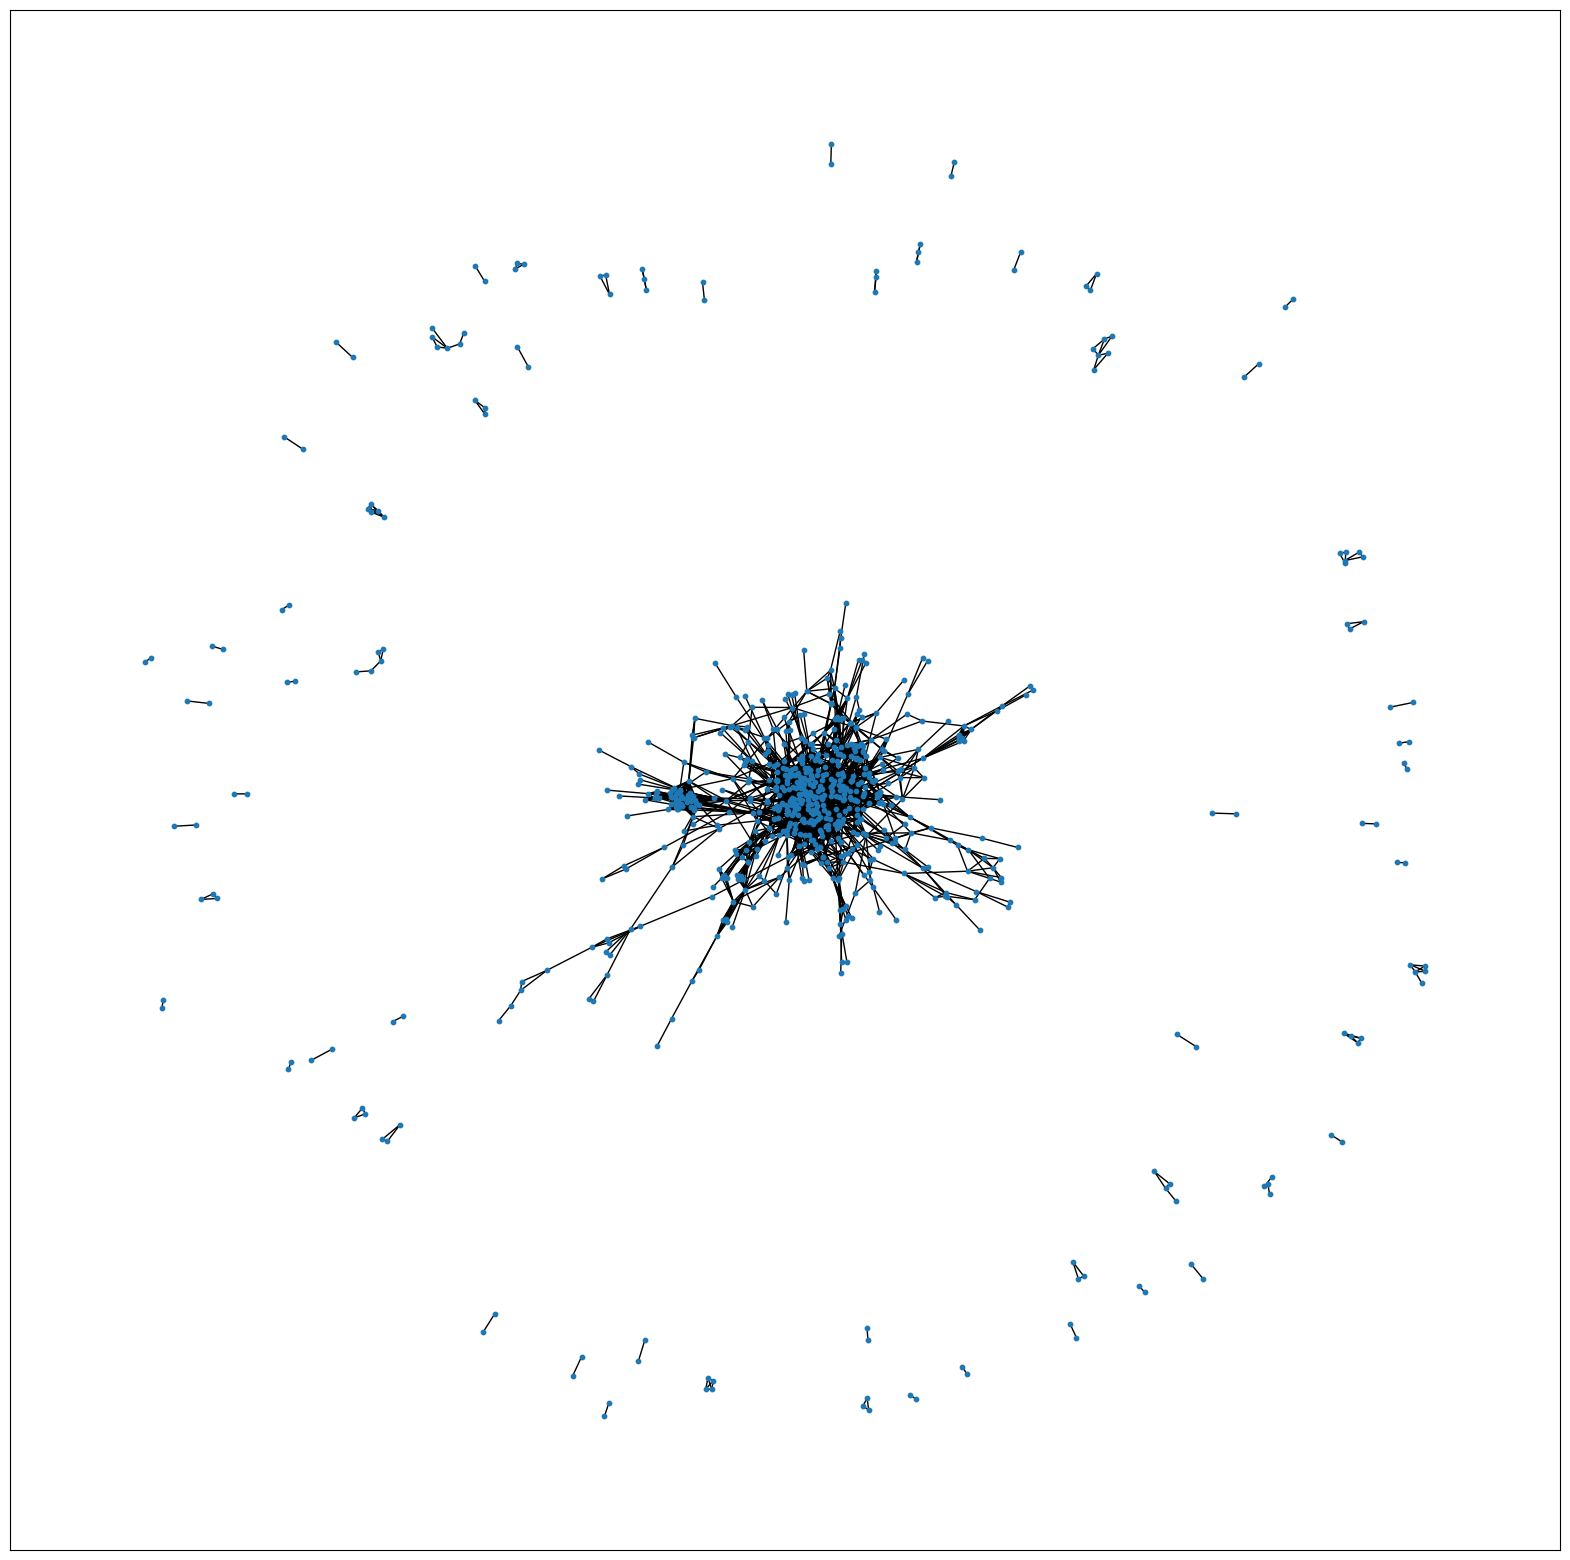

In [187]:
# Create a graph from the co_investment_counts DataFrame
#get subset where co-investments >1
# co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
plt.savefig('graphs/co_investments_active_angels.png')
plt.show()
#save plot as png




In [188]:
import pandas as pd
from d3graph import d3graph, vec2adjmat
source = co_investment_counts['shareholder_name_mapped_x']
target = co_investment_counts['shareholder_name_mapped_y']
weight = co_investment_counts['CoInvestments']


adjmat = vec2adjmat(source, target, weight=weight)

# Initialize
d3 = d3graph()

d3.graph(adjmat)
# save as graph.html in dataframes
d3.show('dataframes/graph.html')
# Additional customization for interactivity


# Convert to html and open in the browser
d3.show(filepath='output/graphs/graph_active_angels_mor_than_one_SH.html')


[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] WARNING> Colormap [Set2] can not create [81] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 782
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmpcpm6oejn/d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmpcpm6oejn/d3graph.html]
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graphs/graph_active_angels_mor_

## **Descriptive Statistics** - 2

In [189]:
#read in csv
# df_angels_active = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/df_angels_active_to_correct - df_angels_active_to_correct.csv")

In [190]:
#add column full name where you concatenate firstname and lastname
df_angels_active['full_name'] = df_angels_active['firstname'] + ' ' + df_angels_active['lastname']
df_angels_active

#now save a subset of the first 500 rows
df_angels_active_subset = df_angels_active.head(500)

#now save a subset of the bottom 403 rows
df_angels_active_subset2 = df_angels_active.tail(403)

#save both as csv
df_angels_active_subset.to_csv('df_angels_active_subset.csv', index=False)
df_angels_active_subset2.to_csv('df_angels_active_subset2.csv', index=False)


In [191]:
#read in 2 csvs and concatenate them
df_angels_active_subset = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/namsor_full-name-country_df_angels_active_subset (2).csv')
df_angels_active_subset2 = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/namsor_full-name-country_df_angels_active_subset2.csv')
df_angels_active_subset = pd.concat([df_angels_active_subset, df_angels_active_subset2])
df_angels_active_subset
# df_angels_active =df_angels_active_subset

shareholder_name_old  shareholder_id  \
0                         5DMG UG (haftungsbeschränkt)            2804   
1           Stoß Beteiligungen UG (haftungsbeschränkt)           19228   
2                                          Jensen GmbH           22244   
3    Florian Berendt Beteiligungs UG (haftungsbesch...             941   
4                               Dr. Thede Holding GmbH           19740   
..                                                 ...             ...   
398                     GridHub GmbH AG Charlottenburg           18029   
399                               Prof. Dr. Ivar Roots            7581   
400                           Hackethal & Friends GmbH           20662   
401                                   Dr. Jens Odewald            4135   
402                          Felix Management GP II LP            3207   

                        created_at  number_of_investments shareholder_type  \
0    2024-03-10 17:37:20.561047+00                      3            angel   
1    2024-03-10 17:37:30.209471+00                      2            angel   
2    2024-03-10 17:37:32.544819+00                      2            angel   
3    2024-03-10 17:37:19.751917+00                      2            angel   
4    2024-03-10 17:37:30.209471+00                      2            angel   
..                             ...                    ...              ...   
398  2024-03-10 17:37:29.143888+00                      2            angel   
399  2024-03-10 17:37:22.963246+00                      2            angel   
400  2024-03-10 17:37:30.929372+00                      2            angel   
401  2024-03-10 17:37:21.332579+00                      3            angel   
402  2024-03-10 17:37:21.332579+00                      2            angel   

      register_id                    register_court total_participation  \
0             NaN                               NaN              28.772   
1       HRB 20352                              Kiel               3.359   
2     HRB 7025 FL                         Flensburg              23.642   
3    HRB 35658 HB                            Bremen                  46   
4     HRB 8798 KI                              Kiel                13.4   
..            ...                               ...                 ...   
398  HRB 176688 B                    Charlottenburg              4.7479   
399           NaN                               NaN                 655   
400     HRB 44709                 Offenbach am Main                 505   
401           NaN                               NaN              1.2426   
402      SL 33778  Registrar Companies for Scotland                0.35   

     register_mapping                                shareholder_purpose  ...  \
0                 NaN                                                NaN  ...   
1               706.0                                                NaN  ...   
2               695.0                                                NaN  ...   
3               258.0  {"shareholder_purpose": "Die Beteiligung an Un...  ...   
4               706.0                                                NaN  ...   
..                ...                                                ...  ...   
398             217.0  {"shareholder_purpose": "Das Betreiben einer I...  ...   
399               NaN                                                NaN  ...   
400             279.0  {"shareholder_purpose": "die Erbringung von Le...  ...   
401               NaN                                                NaN  ...   
402               NaN                      {"shareholder_purpose": null}  ...   

                        name      score country countryAlt  region topRegion  \
0                Nico Roemer   2.496398      DE         NL  Europe    Europe   
1               Julian Stoss   3.350582      AT         DE  Europe    Europe   
2                Marc Jensen  18.408830      DK         LU  Europe    Europe   
3            F

In [192]:
df_angels_active['region_mapping']

0           stuttgart
1           stuttgart
2       international
3              berlin
4              berlin
            ...      
1301            other
1302              NaN
1303              NaN
1304           berlin
1305           berlin
Name: region_mapping, Length: 959, dtype: object

Descriptive Statistics on Angels

In [193]:
df_angel_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of angels and add to df_angel_descriptive with variable name "total_number_of_angels"
total_number_of_angels = len(df_angels)
df_angel_descriptive.loc[0] = ["total_number_of_angels", total_number_of_angels]
#Calculate the amount of males among the angels
number_of_male_angels_total = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[1] = ["number_of_male_angels", number_of_male_angels_total]
#Calculate the amount of females among all angels
number_of_female_angels_total = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[2] = ["number_of_female_angels", number_of_female_angels_total]

# calculate share of female angels
share_of_female_angels = number_of_female_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[3] = ["share_of_female_angels_total", share_of_female_angels]

#calculate share of male angels
share_of_male_angels = number_of_male_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[4] = ["share_of_male_angels_total", share_of_male_angels]

#cast column number of age to integer
df_angels['age'] = pd.to_numeric(df_angels['age'], errors='coerce').fillna(1).astype(int)
#calculate mean of age for all angels where age is not 0
df_angels_mf = df_angels[df_angels['age'] != 1]
mean_age_of_all_angels = df_angels_mf['age'].mean()
df_angel_descriptive.loc[5] = ["mean_age_of_all_angels", mean_age_of_all_angels]

#Calculate mean age of female angels
df_female_angels = df_angels[df_angels['gender']=='female']
mean_age_of_female_angels = df_female_angels['age'].mean()
df_angel_descriptive.loc[6] = ["mean_age_of_all_female_angels", mean_age_of_female_angels]

#Calculate mean age of male angels
df_male_angels = df_angels[df_angels['gender']=='male']
mean_age_of_male_angels = df_male_angels['age'].mean()
df_angel_descriptive.loc[7] = ["mean_age_of_all_male_angels", mean_age_of_male_angels]



# df_gender_unknown = df_angels[df_angels['gender'] =='unknown']
# mean_age_unknown = df_gender_unknown['age'].mean()
# df_angel_descriptive.loc[8] = ["mean_age_of_all_unknown_angels", mean_age_unknown]

#Calulate total number of active angels and add to df_angel_descriptive with variable name "total_number_of_active_angels"
total_number_of_active_angels = len(df_angels[df_angels['status'] == 'active'])
df_angel_descriptive.loc[9] = ["total_number_of_active_angels", total_number_of_active_angels]

# Calculate number of angels investing through a holding and add to df_angel_descriptive with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels[df_angels['investment_type'] == 'holding'])
# add them to df
df_angel_descriptive.loc[10] = ["number_of_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]

#Calculate number of angels investing as a person and add to df_angel_descriptive with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels[df_angels['investment_type'] == 'person'])



# add them to df
df_angel_descriptive.loc[11] = ["number_of_angels_investing_as_a_person", number_of_angels_investing_as_a_person]

share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[12] = ["share_of_investments_through_holding", share_of_investments_through_holding]
# #share of investments through holding and add to df_angel_descriptive with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[13] = ["share_of_investments_as_person", share_of_investments_as_person]

#calculate number of angels where academic titke is not nan
number_of_angels_with_academic_title = len(df_angels[df_angels['title'].notnull()])

#calculate ratio of angels with academic title and add to df
ratio_of_angels_with_academic_title = number_of_angels_with_academic_title / number_of_angels_investing_as_a_person
df_angel_descriptive.loc[14] = ["ratio_of_angels_with_academic_title", ratio_of_angels_with_academic_title]



df_angel_descriptive

variable         value
0                         total_number_of_angels  15513.000000
1                          number_of_male_angels  12544.000000
2                        number_of_female_angels   1771.000000
3                   share_of_female_angels_total      0.123716
4                     share_of_male_angels_total      0.876284
5                         mean_age_of_all_angels     43.927659
6                  mean_age_of_all_female_angels     43.479390
7                    mean_age_of_all_male_angels     43.999043
9                  total_number_of_active_angels    959.000000
10  number_of_angels_investing_through_a_holding   4908.000000
11        number_of_angels_investing_as_a_person  10604.000000
12          share_of_investments_through_holding      0.316400
13                share_of_investments_as_person      0.683600
14           ratio_of_angels_with_academic_title      0.128631

In [194]:

# And 'gender', 'firstname', 'lastname', and 'country' are columns in df_angels_active_subset
df_angels_active = df_angels[df_angels['status'] == 'active']
df_angels_active['country']=""
#in df_angels_active replace all spaces with _
df_angels_active['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(' ', '_')

# Assuming 'df_angels_active' and 'df_angels_active_subset' are already defined and correct
for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    subset_row = df_angels_active_subset[df_angels_active_subset['shareholder_name'] == angel]
    
    if not subset_row.empty:
        df_angels_active.at[index, 'firstname'] = subset_row['firstname'].values[0]
        df_angels_active.at[index, 'lastname'] = subset_row['lastname'].values[0]
        df_angels_active.at[index, 'gender'] = subset_row['gender'].values[0]
        df_angels_active.at[index, 'country'] = subset_row['country'].values[0]
    else:
        # Handle cases where the angel is not found in the subset
        # You might want to set default values or perform some other action
        pass


In [195]:
df_angels_descriptive_active = pd.DataFrame(columns=("variable","value"))
i=0
#only consider active angels
# df_angels_active = df_angels[df_angels['status'] == 'active']

# Calculate number of angels investing through a holding and add to df_angels_descriptive_active with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels_active[df_angels_active['investment_type'] == 'holding'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]
i=i+1
#Calculate number of angels investing as a person and add to df_angels_descriptive_active with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels_active[df_angels_active['investment_type'] == 'person'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_as_a_person", number_of_angels_investing_as_a_person]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_through_holding", share_of_investments_through_holding]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_as_person", share_of_investments_as_person]
i=i+1
# calculate age based on birthdate and add to df_angel

#cast column number of age to integer
df_angels_active['age'] = pd.to_numeric(df_angels_active['age'], errors='coerce').fillna(1).astype(int)

#calculate mean age of angels and add to df_angels_descriptive_active with variable name "mean_age_of_angels"
mean_age_of_angels = df_angels_active['age'].mean()

# add them to df
df_angels_descriptive_active.loc[i] = ["mean_age_of_active_angels", mean_age_of_angels]
i=i+1
#Calculate the amount of males among the active angels
number_of_male_angels_active = len(df_angels_active[df_angels_active['gender'] == 'male'])
df_angels_descriptive_active.loc[i] = ["number_of_male_angels_active", number_of_male_angels_active]
i=i+1
#Calculate the amount of females among the active angels
number_of_female_angels_active = len(df_angels_active[df_angels_active['gender'] == 'female'])
df_angels_descriptive_active.loc[i] = ["number_of_female_angels_active", number_of_female_angels_active]
i=i+1

#calculate share of female angels
share_of_female_angels_active = number_of_female_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels female", share_of_female_angels_active]
i=i+1
#calculate share of male angels
share_of_male_angels_active = number_of_male_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels male", share_of_male_angels_active]
i=i+1
#Calculate average number of investment per active angel and add to df_angels_descriptive_active with variable name "average_number_of_investments_per_active_angel"
average_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].mean()
# add them to df
df_angels_descriptive_active.loc[i] = ["average_number_of_investments_per_active_angel", average_number_of_investments_per_active_angel]
i=i+1
#Calculate median number of investment per active angel and add to df_angels_descriptive_active with variable name "median_number_of_investments_per_active_angel"
median_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].median()
# add them to df
df_angels_descriptive_active.loc[i] = ["median_number_of_investments_per_active_angel", median_number_of_investments_per_active_angel]
i=i+1
#calculate number of angels where academic titke is not nan
number_of_angels_with_academic_title = len(df_angels_active[df_angels_active['title'].notnull()])

#calculate ratio of angels with academic title and add to df
ratio_of_angels_with_academic_title = number_of_angels_with_academic_title / number_of_angels_investing_as_a_person
df_angels_descriptive_active.loc[i] = ["ratio_of_angels_with_academic_title", ratio_of_angels_with_academic_title]

#calculate ratio of non-Dach names, meaning country is not DE, AT or CH
non_dach = df_angels_active[~df_angels_active['country'].isin(['DE', 'AT', 'CH'])]
number_of_non_dach = len(non_dach)
ratio_of_non_dach = number_of_non_dach / total_number_of_active_angels
df_angels_descriptive_active.loc[i] = ["ratio_of_non_dach", ratio_of_non_dach]

# #Calculate average inustry_HHI per active angel and add to df_angels_descriptive_active with variable name "average_inustry_HHI_per_active_angel"
# average_inustry_HHI = df_angels_active['industry_HHI'].mean()
# # add them to df
# df_angels_descriptive_active.loc[12] = ["average_industry_HHI", average_inustry_HHI]

# #Calculate average industry HHI across angels and add to df_angels_descriptive_active with variable name "average_industry_HHI_across_angels"
# average_industry_HHI_across_angels = df_angels_active['industry_HHI_angel'].mean()
# # add them to df
# df_angels_descriptive_active.loc[13] = ["average_industry_HHI_across_angels", average_industry_HHI_across_angels]

# #Calculate average eigenvector centrality across angels and add to df_angels_descriptive_active with variable name "average_eigenvector_centrality_across_angels"
# average_eigenvector_centrality_across_angels = df_angels_active['eigenvector_centrality'].mean()
# # add them to df
# df_angels_descriptive_active.loc[14] = ["average_eigenvector_centrality_across_angels", average_eigenvector_centrality_across_angels]

df_angels_descriptive_active

variable       value
0   number_of_active_angels_investing_through_a_ho...  639.000000
1       number_of_active_angels_investing_as_a_person  320.000000
2                share_of_investments_through_holding    0.666319
3                      share_of_investments_as_person    0.333681
4                           mean_age_of_active_angels   45.946820
5                        number_of_male_angels_active  891.000000
6                      number_of_female_angels_active   66.000000
7                       share of active angels female    0.068966
8                         share of active angels male    0.931034
9      average_number_of_investments_per_active_angel    2.541189
10      median_number_of_investments_per_active_angel    2.000000
11                                  ratio_of_non_dach    0.252346

In [196]:
#calculate sd age active angels
sd_age_active_angels = df_angels_active['age'].std()
sd_age_active_angels

11.248859269458524

In [197]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi
english_industries = [
    'mobility', 'software', 'food', 'industry', 'staffing', 'energy', 'media', 'service', 'construction', 'hardware', 'blockchain_crypto', 'gaming', 'medicine_biotech', 'agriculture', 'real_estate', 'environmental_technology', 'sports', 'education', 
    'ecommerce', 'finance', 'tourism', 'advertising', 'logistics', 
    'legal_consulting', 'insurance'
]

for column in english_industries:
    df_angels_active[column] = pd.to_numeric(df_angels_active[column], errors='coerce').fillna(0)
#calculate the industry_HHI for each angel based on the industry columns in english_industries
df_angels_active['industry_HHI'] = df_angels_active[english_industries].apply(calculate_hhi, axis=1)


#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


shareholder_name_old  shareholder_id  \
0                                    Jacobo Invest GmbH           768.0   
1                          CG Ventures GmbH Baiersbronn          1941.0   
2                         Charles Maxim Rolfe Songhurst          2792.0   
3          Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
4                                 Liberty Ventures GmbH          3959.0   
...                                                 ...             ...   
1301  Happy & Fresh Beratungs- und Beteiligungsgesel...          1847.0   
1302               Miyamax Beteiligungsgesellschaft mbH         20616.0   
1303                                        ALLUTI GmbH          9421.0   
1304                                 MM Investment GmbH          6459.0   
1305         F. Friede Ventures UG (haftungsbeschränkt)         11210.0   

                         created_at  number_of_investments shareholder_type  \
0     2024-03-10 17:37:19.751917+00                     15            angel   
1     2024-03-10 17:37:20.561047+00                     15            angel   
2     2024-03-10 17:37:20.561047+00                     14            angel   
3     2024-03-10 17:37:21.332579+00                     11            angel   
4     2024-03-10 17:37:21.332579+00                      8            angel   
...                             ...                    ...              ...   
1301  2024-03-10 17:37:20.561047+00                      2            angel   
1302  2024-03-10 17:37:30.929372+00                      2            angel   
1303  2024-03-10 17:37:24.528696+00                      2            angel   
1304  2024-03-10 17:37:22.963246+00                      2            angel   
1305  2024-03-10 17:37:25.834675+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
0       HRB 737155             Ulm            16.224912             109.0   
1       HRB 726408       Stuttgart             7.089747              95.0   
2              NaN             NaN             1.004879               NaN   
3       HRB 159992  Charlottenburg             0.468650             217.0   
4     HRB 158031 B  Charlottenburg            32.057400             217.0   
...            ...             ...                  ...               ...   
1301     HRB 39000         Dresden             8.500000             621.0   
1302    HRB 771450       Stuttgart            18.681650              95.0   
1303        210537    M\u00fcnchen             2.636859             136.0   
1304    HRB 216984  Charlottenburg            17.017700             217.0   
1305  HRB 151510 B  Charlottenburg             1.226000             217.0   

                                    shareholder_purpose  ...  \
0     {"shareholder_purpose": "Halten von Beteiligun...  ...   
1     {"shareholder_purpose": "der Kauf, die dauernd...  ...   
2                                                   NaN  ...   
3     {"shareholder_purpose": "Das Halten und Verwal...  ...   
4     {"shareholder_purpose": "Der Erwerb, Halten, V...  ...   
...                                                 ...  ...   
1301  {"shareholder_purpose": "Halten und Verwalten ...  ...   
1302  {"shareholder_purpose": "Der Erwerb, das langf...  ...   
1303  {"shareholder_purpose": "Verwaltung eigenen Ve...  ...   
1304  {"shareholder_purpose": "Die Verwaltung eigene...  ...   
1305  {"shareholder_purpose": "Der Erwerb, die Verwa...  ...   

               birthdate 2017 2018 2019  2020 2021  status country  \
0     1973-03-30 0:00:00  5.0  3.0  5.0   3.0  0.0  active      DE   
1     1985-12-29 0:00:00  2.0  3.0  5.0   3.0  2.0  active      AT   
2     1978-09-18 0:00:00  2.0  4.0  4.0   3.0  1.0  active      GB   
3     1982-11-03 0:00:00  2.0  0.0  3.0   5.0  2.0  active      US   
4     1986-08-10 0:00:00  0.0  2.0  4.0   4.0  0.0  active      AT   
...                  ...  ...  ...  ...   ...  ...     ...     ...   
1

In [198]:
#create df with columns variable and value
df_active_angels_descriptive_hhi = pd.DataFrame(columns=("variable","value"))
#calculate the average industry HHI for all active angels and put it into a df
average_industry_HHI = df_angels_active['industry_HHI'].mean()
average_industry_HHI
df_active_angels_descriptive_hhi.loc[0] = ["average_industry_HHI", average_industry_HHI]
#calculate the average region HHI for all active angels and put it into a df
average_region_HHI = df_angels_active['region_HHI'].mean()
average_region_HHI
df_active_angels_descriptive_hhi.loc[1] = ["average_region_HHI", average_region_HHI]

df_active_angels_descriptive_hhi    




variable     value
0  average_industry_HHI  0.524271
1    average_region_HHI  0.704782

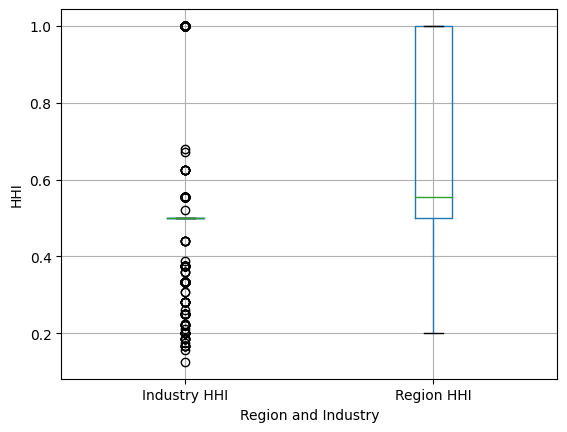

In [199]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
df_angels_active.boxplot(column=['industry_HHI', 'region_HHI'], ax=ax)

# Capitalize the column names for x-axis labels
ax.set_xticklabels(['Industry HHI', 'Region HHI'])

# Set the labels
ax.set_ylabel('HHI')
ax.set_xlabel('Region and Industry')

# Save the plot
plt.savefig('output/graphs/boxplot_regional_industry_HHI.png')

# Show the plot
plt.show()

In [200]:
#calculate average industry_HHI and sd industry HHI
average_industry_HHI = df_angels_active['industry_HHI'].mean()
sd_industry_HHI = df_angels_active['industry_HHI'].std()
average_industry_HHI, sd_industry_HHI

(0.5242713890773936, 0.2110005449208323)

In [201]:
#calculate average region_HHI and sd region HHI
average_region_HHI = df_angels_active['region_HHI'].mean()
sd_region_HHI = df_angels_active['region_HHI'].std()
average_region_HHI, sd_region_HHI

(0.7047816502194668, 0.2576697891461103)

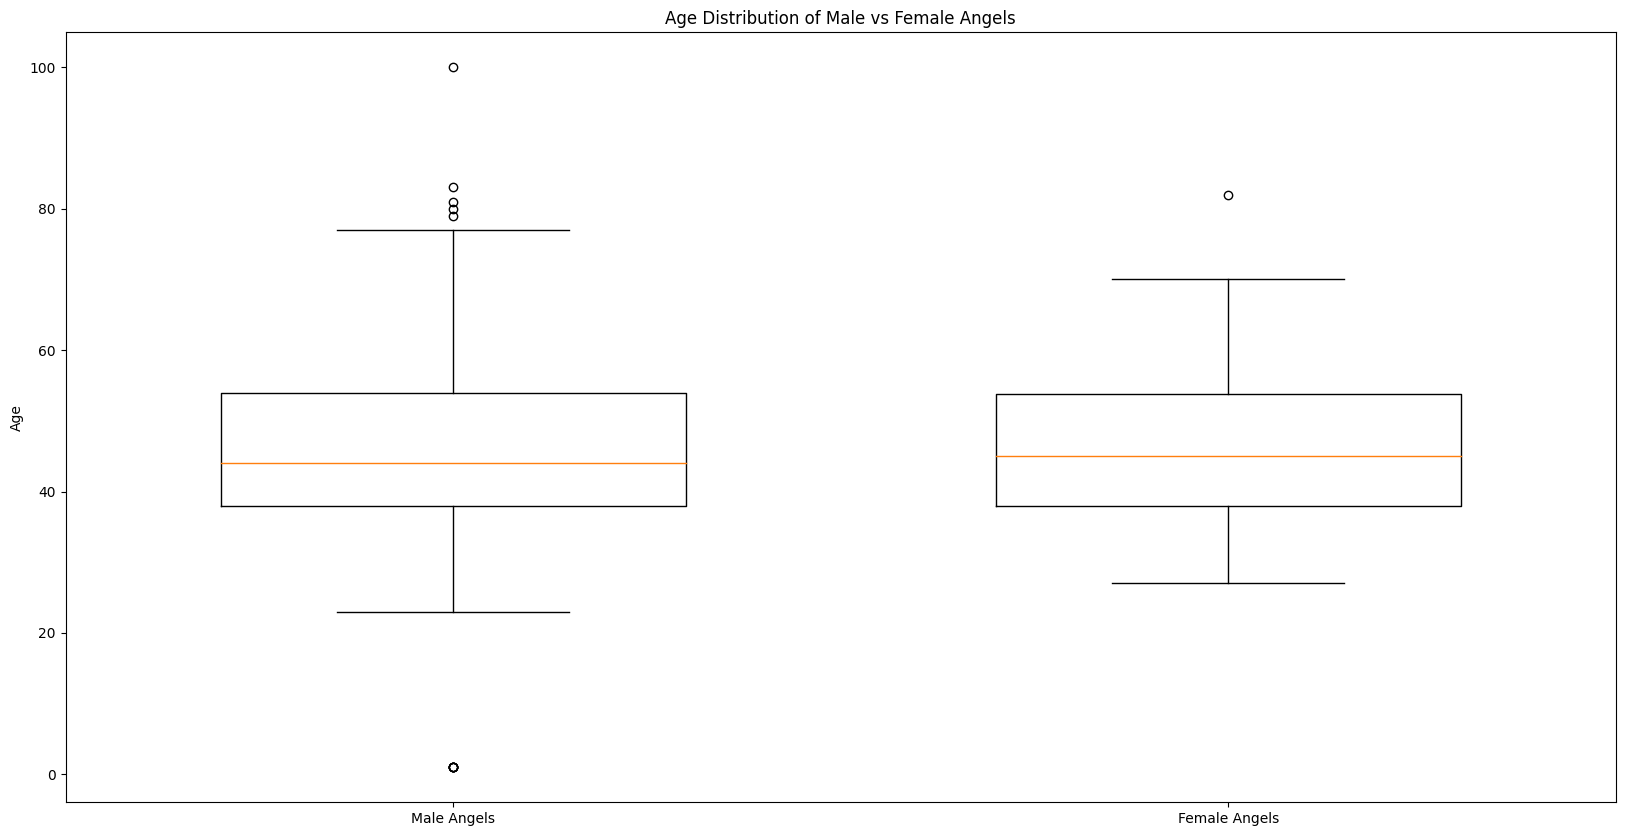

In [202]:
import matplotlib.pyplot as plt

df_angels_male = df_angels_active[df_angels_active["gender"]=='male']

df_angels_female = df_angels_active[df_angels_active['gender']=='female']

# Assuming df_angels_male and df_angels_female are your dataframes and they both have an 'age' column

# Combine the data into a list where each element is a Series/DataFrame of ages
data_to_plot = [df_angels_male['age'], df_angels_female['age']]

plt.figure(figsize=(20,10))

# Create boxplot with the combined data
# The positions parameter is optional, it sets the positions of the boxes in the plot
plt.boxplot(data_to_plot, positions=[1, 2], widths=0.6)

# Set the x-tick labels to correspond to your two categories
plt.xticks([1, 2], ['Male Angels', 'Female Angels'])

plt.title('Age Distribution of Male vs Female Angels')
plt.ylabel('Age')

# Save the figure
plt.savefig('output/boxplot_age_gender_comparison.png')

plt.show()

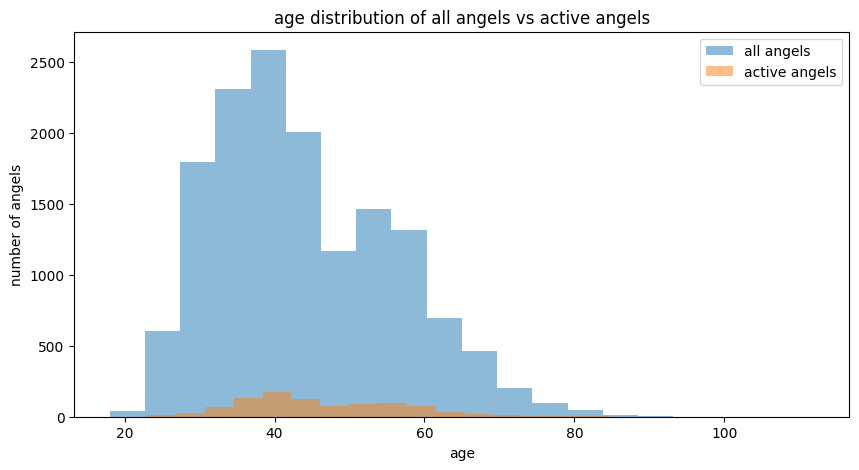

In [203]:
#plot age distribution of all angels
plt.figure(figsize=(10,5))
#drop angels with age 0
df_angels_mf = df_angels[df_angels['age'] !=1]
df_angels_active_mf = df_angels_active[df_angels_active['age'] !=1]

plt.hist(df_angels_mf['age'], bins=20, alpha=0.5, label='all angels')
plt.hist(df_angels_active_mf['age'], bins=20, alpha=0.5, label='active angels')
plt.xlabel('age')
plt.ylabel('number of angels')
plt.legend(loc='upper right')
plt.title('age distribution of all angels vs active angels')
plt.savefig('output/graphs/age_distribution_all_vs_active_angels.png')
plt.show()

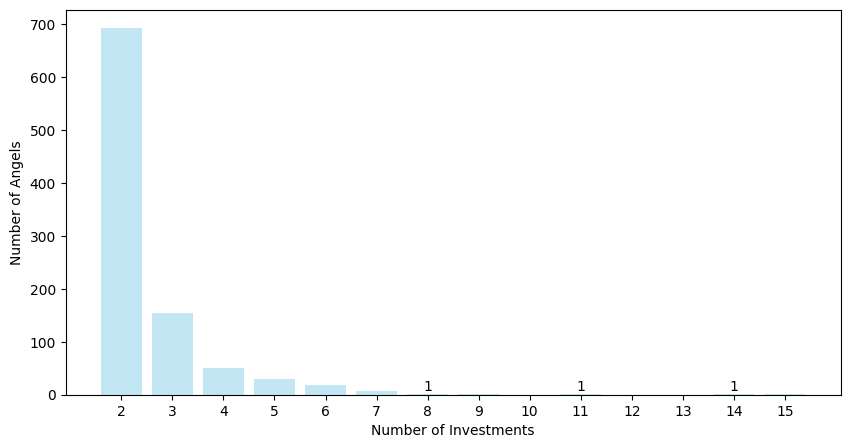

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'number_of_investments' contains only whole numbers and drop zeros if necessary
df_angels_active['number_of_investments'] = df_angels_active['number_of_investments'].replace(0, np.nan).dropna().astype(int)

# Determine the bin edges so that each bin represents an integer value
bin_edges = np.arange(df_angels_active['number_of_investments'].min() - 0.5, 
                      df_angels_active['number_of_investments'].max() + 1.5, 1)

plt.figure(figsize=(10,5))
# Plot the histogram with bins aligned with the unique investment counts, set the bar width to 0.8, and color to skyblue
n, bins, patches = plt.hist(df_angels_active['number_of_investments'], bins=bin_edges, alpha=0.5, label='active angels', rwidth=0.8, color='skyblue')

# Set the x-axis labels to be the unique values of 'number_of_investments'
xticks = np.arange(df_angels_active['number_of_investments'].min(), 
                   df_angels_active['number_of_investments'].max() + 1, 1)
plt.xticks(xticks)

plt.xlabel('Number of Investments')
plt.ylabel('Number of Angels')

# Annotate bars with height equal to 1
for count, value in zip(n, xticks):
    if count == 1:
        plt.text(value, count, str(int(count)), ha='center', va='bottom')

plt.savefig('output/graphs/number_of_investments_active_angels.png')
plt.show()

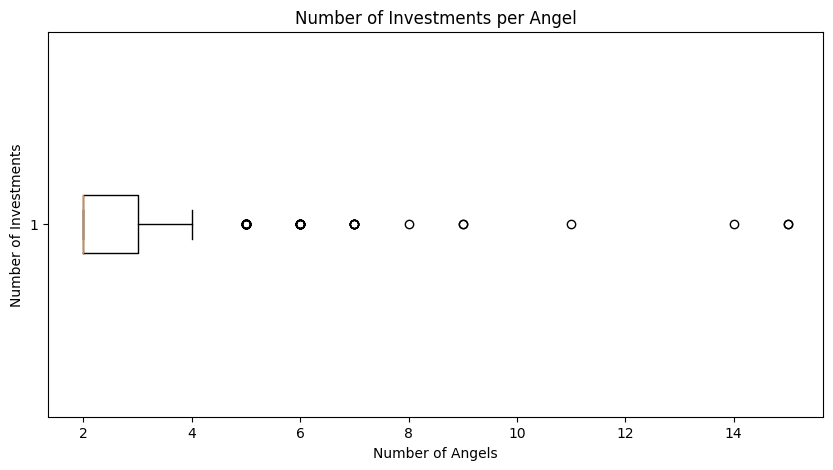

In [205]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_angels_active['number_of_investments'], vert=False)  # Set vert=False to swap the axes
plt.ylabel('Number of Investments')  # This is now the y-axis label
plt.xlabel('Number of Angels')       # This is now the x-axis label
plt.title('Number of Investments per Angel')

# To rotate x-axis labels (if needed):
# plt.xticks(rotation=90)

# To rotate y-axis labels (if needed):
# plt.yticks(rotation=90)

plt.savefig('graphs/boxplot_number_of_investments_per_angel.png')
plt.show()


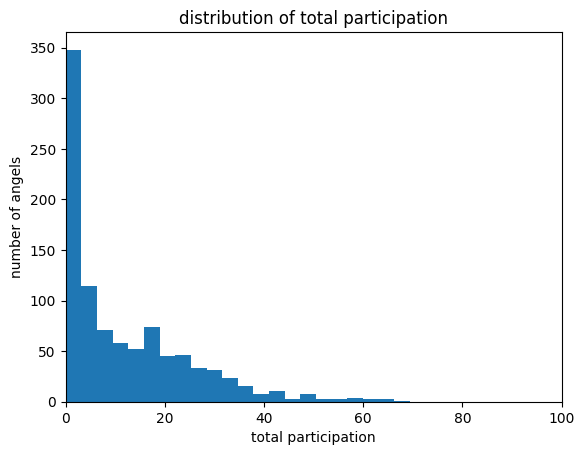

In [206]:
#plot distribution of average shares in their investments including decimals

#put it into bins
plt.hist(df_angels_active['total_participation'], bins=100)
#make x axis from 0 to 100
plt.xlim(0,100)
plt.xlabel('total participation')
plt.ylabel('number of angels')
plt.title('distribution of total participation')
plt.savefig('graphs/distribution_total_participation.png')
plt.show()


In [207]:
#give back the angel with total participation >50
df_angels_active[df_angels_active['total_participation'] > 1]


shareholder_name_old  shareholder_id  \
0                                    Jacobo Invest GmbH           768.0   
1                          CG Ventures GmbH Baiersbronn          1941.0   
2                         Charles Maxim Rolfe Songhurst          2792.0   
4                                 Liberty Ventures GmbH          3959.0   
5                 Reber Capital UG (haftungsbeschränkt)          9495.0   
...                                                 ...             ...   
1301  Happy & Fresh Beratungs- und Beteiligungsgesel...          1847.0   
1302               Miyamax Beteiligungsgesellschaft mbH         20616.0   
1303                                        ALLUTI GmbH          9421.0   
1304                                 MM Investment GmbH          6459.0   
1305         F. Friede Ventures UG (haftungsbeschränkt)         11210.0   

                         created_at  number_of_investments shareholder_type  \
0     2024-03-10 17:37:19.751917+00                     15            angel   
1     2024-03-10 17:37:20.561047+00                     15            angel   
2     2024-03-10 17:37:20.561047+00                     14            angel   
4     2024-03-10 17:37:21.332579+00                      8            angel   
5     2024-03-10 17:37:24.528696+00                      9            angel   
...                             ...                    ...              ...   
1301  2024-03-10 17:37:20.561047+00                      2            angel   
1302  2024-03-10 17:37:30.929372+00                      2            angel   
1303  2024-03-10 17:37:24.528696+00                      2            angel   
1304  2024-03-10 17:37:22.963246+00                      2            angel   
1305  2024-03-10 17:37:25.834675+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
0       HRB 737155             Ulm            16.224912             109.0   
1       HRB 726408       Stuttgart             7.089747              95.0   
2              NaN             NaN             1.004879               NaN   
4     HRB 158031 B  Charlottenburg            32.057400             217.0   
5     HRB 158048 B  Charlottenburg             5.334811             217.0   
...            ...             ...                  ...               ...   
1301     HRB 39000         Dresden             8.500000             621.0   
1302    HRB 771450       Stuttgart            18.681650              95.0   
1303        210537    M\u00fcnchen             2.636859             136.0   
1304    HRB 216984  Charlottenburg            17.017700             217.0   
1305  HRB 151510 B  Charlottenburg             1.226000             217.0   

                                    shareholder_purpose  ...  \
0     {"shareholder_purpose": "Halten von Beteiligun...  ...   
1     {"shareholder_purpose": "der Kauf, die dauernd...  ...   
2                                                   NaN  ...   
4     {"shareholder_purpose": "Der Erwerb, Halten, V...  ...   
5     {"shareholder_purpose": "Erwerb, Verwaltung un...  ...   
...                                                 ...  ...   
1301  {"shareholder_purpose": "Halten und Verwalten ...  ...   
1302  {"shareholder_purpose": "Der Erwerb, das langf...  ...   
1303  {"shareholder_purpose": "Verwaltung eigenen Ve...  ...   
1304  {"shareholder_purpose": "Die Verwaltung eigene...  ...   
1305  {"shareholder_purpose": "Der Erwerb, die Verwa...  ...   

               birthdate 2017 2018 2019  2020 2021  status country  \
0     1973-03-30 0:00:00  5.0  3.0  5.0   3.0  0.0  active      DE   
1     1985-12-29 0:00:00  2.0  3.0  5.0   3.0  2.0  active      AT   
2     1978-09-18 0:00:00  2.0  4.0  4.0   3.0  1.0  active      GB   
4     1986-08-10 0:00:00  0.0  2.0  4.0   4.0  0.0  active      AT   
5     1987-08-27 0:00:00  1.0  2.0  3.0   2.0  1.0  active      DE   
...                  ...  ...  ...  ...   ...  ...     ...     ...   
1

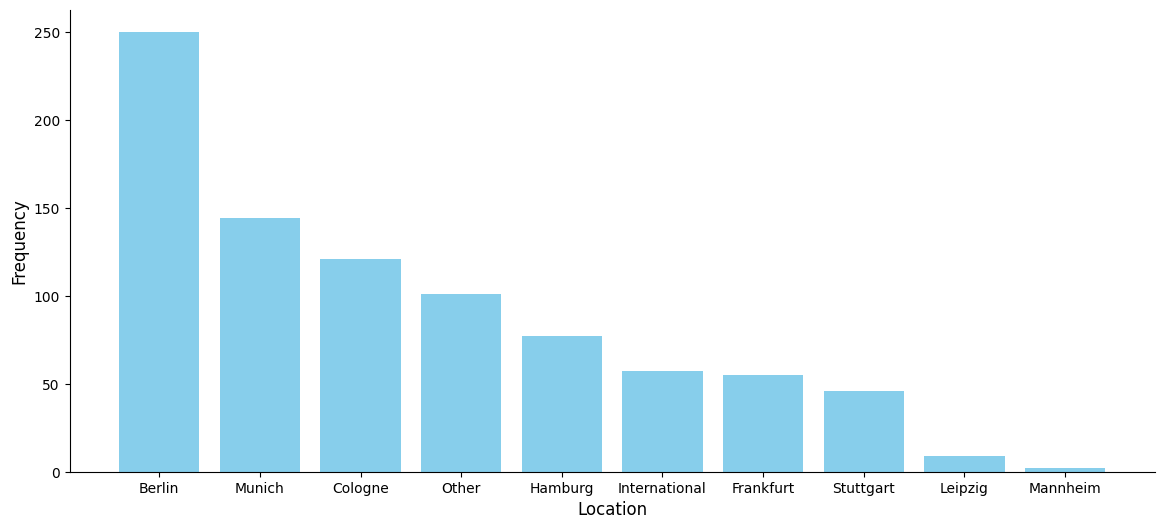

In [208]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop NaN values
data = df_angels_active['region_mapping'].dropna()

# Calculate the frequency of each unique value and sort by this frequency
value_counts = data.value_counts().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(14,6))

# Plot the histogram with the sorted data
plt.bar(value_counts.index, value_counts, color='skyblue', edgecolor='none')

# Set the labels with specified font sizes
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels to horizontal and capitalize the first letter of each label
labels = [label.capitalize() for label in value_counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Export graph as image called "Number of angels per region.png"
plt.savefig('graphs/Number of angels per region.png', bbox_inches='tight')

# Show the plot
plt.show()

## Descriptive Statistics on Startups

In [209]:
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))
#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1
df_startup_descriptive

#get subset of startups with more than 2 shareholders
df_startups = df_startups[df_startups['number_shareholders'] > 2]
#get subset of startups that is also in df_investment_rel_angel_startup
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
number_startups_in_dataset=len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups_in_dataset", number_startups_in_dataset]
df_startup_descriptive

variable  value
0            total_number_of_companies   4821
1  total_number_of_startups_in_dataset   1195

In [210]:
#save df_Startups to csv with name "startups_filtered.csv" and seperator ";"
df_startups.to_csv('dataframes/startups_filtered.csv', sep=";")

In [211]:
df_investment_rel_angel_startup

relation_id                     created_at  \
3            1959  2024-02-29 16:59:35.172778+00   
4            1970  2024-02-29 16:59:35.396716+00   
37          10121  2024-02-29 19:22:45.030248+00   
39           9432  2024-02-29 19:15:43.880909+00   
57            122  2024-02-29 16:41:45.654748+00   
...           ...                            ...   
27715       19224   2024-02-29 21:14:56.59349+00   
27757       14442  2024-02-29 20:27:56.342567+00   
27765       12324   2024-02-29 20:08:01.13122+00   
27766       12327  2024-02-29 20:08:01.197047+00   
27769       12338  2024-02-29 20:08:01.461687+00   

                                        shareholder_name shareholder_location  \
3                                             Simon Vogt    Frankfurt am Main   
4      Helen Oy Finnisches Patent und Registeramts (P...             Helsinki   
37                                        Frederik Dietz              Hamburg   
39                          5DMG UG (haftungsbeschränkt)            Karlsruhe   
57                              AREO B Beteiligungs GmbH            Osnabrück   
...                                                  ...                  ...   
27715                                  Next Big Thing AG               Berlin   
27757                                   FRESH Media GmbH            Ottobrunn   
27765                                Spree Eternity GmbH               Berlin   
27766                                    phm equity GmbH               Berlin   
27769          Campione Ventures UG (haftungsbeschränkt)              Cologne   

                birthdate   register_id  register_court  \
3      1991-11-19 0:00:00           NaN             NaN   
4                     NaN           NaN             NaN   
37     1977-12-17 0:00:00           NaN             NaN   
39                    NaN    HRB 722183        Mannheim   
57     1969-01-12 0:00:00    HRB 206849       Osnabrück   
...                   ...           ...             ...   
27715  1971-02-14 0:00:00  HRB 178480 B  Charlottenburg   
27757  1969-02-12 0:00:00    HRB 256756         München   
27765  1974-06-28 0:00:00  HRB 139036 B  Charlottenburg   
27766  1984-01-10 0:00:00  HRB 160130 B  Charlottenburg   
27769  1948-02-17 0:00:00     HRB 89795            Köln   

      percentage_of_total_shares shareholder_type       startup_name  ...  \
3                        18.0854            angel       &Charge GmbH  ...   
4                        24.0945            angel       &Charge GmbH  ...   
37                           NaN            angel     101skills GmbH  ...   
39                          37.5            angel    10er Karte GmbH  ...   
57                           1.9            angel  1648 Factory GmbH  ...   
...                          ...              ...                ...  ...   
27715                      47.41            angel  ZERO defects GmbH  ...   
27757                         44            angel         Zwopr GmbH  ...   
27765                     0.7951            angel       ZYP.ONE GmbH  ...   
27766                     0.7951            angel       ZYP.ONE GmbH  ...   
27769                     0.1913            angel       ZYP.ONE GmbH  ...   

          startup_region  count region_mapping  gender shareholder_region  \
3      frankfurt am main    1.0      frankfurt    male            leipzig   
4      frankfurt am main    1.0      frankfurt  female      international   
37               hamburg    1.0        hamburg    male            hamburg   
39             karlsruhe    1.0      stuttgart    male          stuttgart   
57               münster    1.0          other    male              other   
...                  ...    ...            ...     ...                ...   
27715             berlin    1.0         berlin    male             berlin   
27757            münchen    1.0         munich    male             munich   
27765             berlin    1.0         berlin    male             berlin   
2776

In [212]:
#get startups_id that are in df_investment_relations_angel_startup but not in df_startps
startups_not_in_df_startups = df_investment_rel_angel_startup[~df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]


In [213]:
#get startups with startup_name Bluu GmbH
df_startups_bluu = df_startups[df_startups['startup_name'] == 'Bluu GmbH']
df_startups_bluu

startup_id                    created_at startup_name  \
1874        5064  2024-01-17 10:12:54.79246+00    Bluu GmbH   

                                       shareholder_json  \
1874  {\n        "shareholders": [\n            {\n ...   

                                               list_mds  number_shareholders  \
1874  {"name":{"0":5064,"1":5064},"aktenzeichen":{"0...                    5   

      number_angels startup_industry  \
1874            NaN             food   

                                        startup_purpose  \
1874  {"gegenstand": "Die Entwicklung von Konzepten ...   

                             link_shareholder_file_2021  ...  \
1874  Bluu GmbH_Berlin Charlottenburg_HRB 218096/Lis...  ...   

                   link_structured_content_file_current  \
1874  Bluu GmbH_Berlin Charlottenburg_HRB 218096/SI-...   

                                        azure_json_2021  \
1874  {"Name des Gesellschafters\/ Shareholder's Nam...   

                                  shareholder_json_2021 startup_region  \
1874  {"shareholders":[{"shareholder_name":"EVIG Gmb...         berlin   

      changed_shareholder_structure region_mapping number_of_shareholders  \
1874                            yes         berlin                    1.0   

     year_of_incorporation number_all_angels      funding_round_type  
1874                  2020                 1  institutional_investor  

[1 rows x 31 columns]

In [214]:
#calculate for each startup number_angels per startup as variable number_angels from how often shareholder_type in df_investment_rel_angel_startup is "angel"
#for each row in df_startups, count how often the startup_name occurs in df_investment_rel_angel_startup where shareholder_type is "angel"
print(len(df_investment_rel_angel_startup))
df_startups['number_angels'] = df_startups['startup_name'].map(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'].value_counts())
#get df_investment_rel_angel_startup where shareholder_type is "angel"


#get sum of all number of angels
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels


2437


2437

In [215]:
# Calculate descriptive statistics for strtups from df_startups, add to df_startup_descriptive
# we want to calculate the following variables:
# total_number_of_startups
#average number of angel investors
#median number of angel investors
#average number of active angels
#median number of active angels
#get subset of df_startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))

# total_number_of_startups = len(df_startups)
# df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1

# # get subset of startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'])]

# # get subset where angel is active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']['startup_name'])]

#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups", total_number_of_startups]
i=i+1
#Calulate average number of angel investors and add to df_startup_descriptive with variable name "average_number_of_angel_investors"
average_number_of_angel_investors = df_startups['number_shareholders'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_shareholders", average_number_of_angel_investors]
i=i+1
#Calulate median number of angel investors and add to df_startup_descriptive with variable name "median_number_of_angel_investors"
median_number_of_angel_investors = df_startups['number_shareholders'].median()
df_startup_descriptive.loc[i] = ["median_number_of_shareholders", median_number_of_angel_investors]
i=i+1
#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_angels = df_startups['number_angels'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_angels", average_number_of_angels]
i=i+1
#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_angels = df_startups['number_angels'].median()
df_startup_descriptive.loc[i] = ["median_number_of_angels", median_number_of_angels]
i=i+1
# #Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
# average_number_of_active_angels = df_startups['number_of_active_angels'].mean()
# df_startup_descriptive.loc[5] = ["average_number_of_active_angels", average_number_of_active_angels]

# #Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
# median_number_of_active_angels = df_startups['number_of_active_angels'].median()
# df_startup_descriptive.loc[6] = ["median_number_of_active_angels", median_number_of_active_angels]


df_startup_descriptive



variable        value
1        total_number_of_startups  1195.000000
2  average_number_of_shareholders     8.613389
3   median_number_of_shareholders     6.000000
4        average_number_of_angels     2.039331
5         median_number_of_angels     1.000000

In [216]:
#count how often values for number_angels occur
df_startups['number_angels'].value_counts()


1     708
2     227
3     111
4      56
5      25
6      21
7      13
8       9
12      5
9       5
10      3
14      3
16      2
11      2
13      2
15      2
17      1
Name: number_angels, dtype: int64

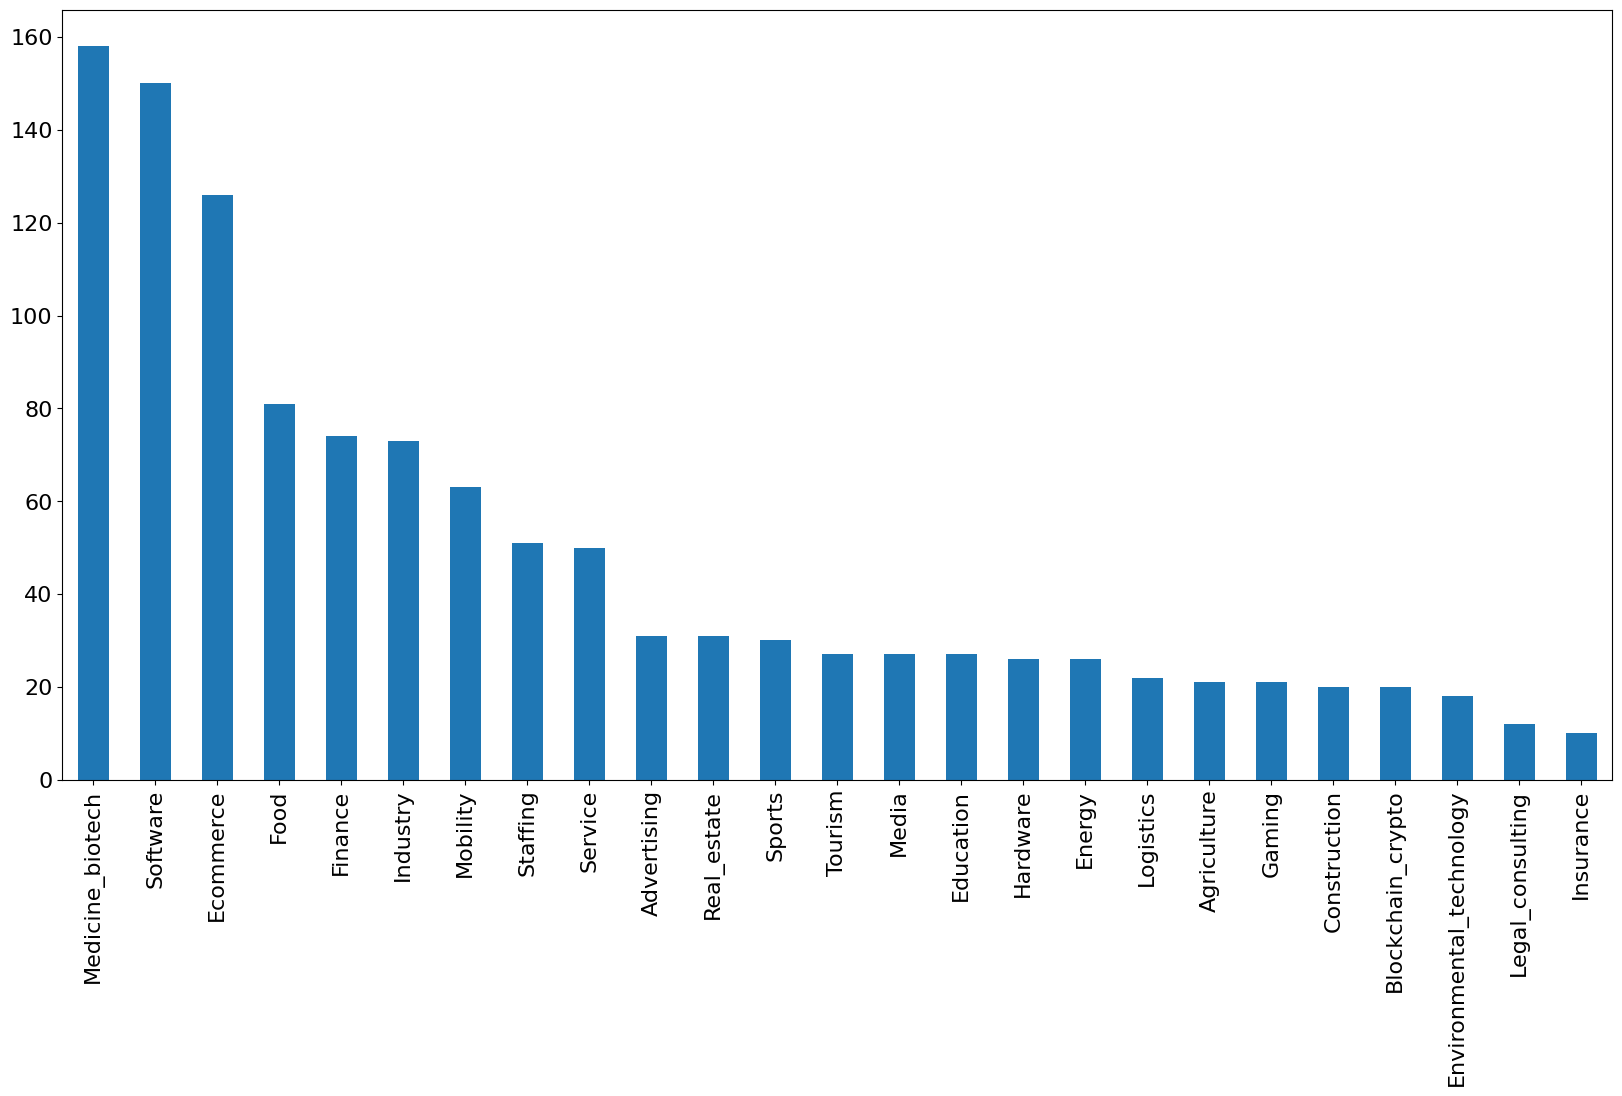

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
# Plot the number of startups per industry
df_startups['startup_industry'].value_counts().plot(kind='bar', fontsize=16)  # Set larger font size here

# Capitalize the first letter of each x-tick label
labels = [label.get_text().capitalize() for label in plt.gca().get_xticklabels()]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)  # Apply the new labels with rotation

# Adjust y-axis font size
plt.yticks(fontsize=16)

# Export graph as image called "Number of Startups per Industry.png"
plt.savefig('graphs/Number of Startups per Industry.png', bbox_inches='tight')
plt.show()

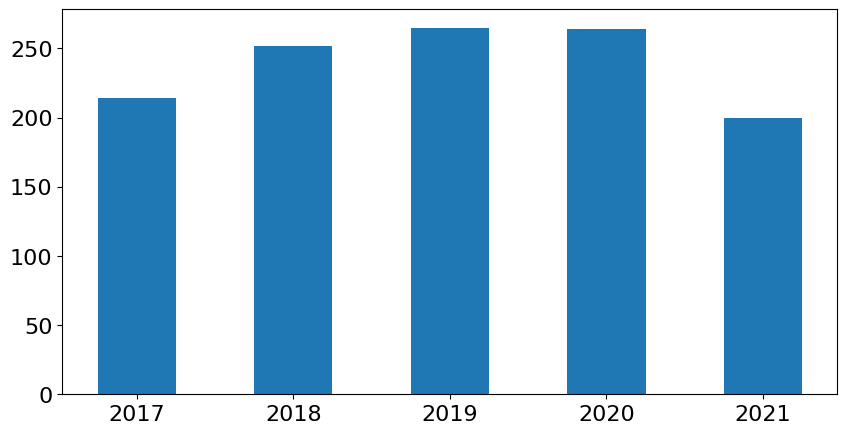

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df_startups and 'date_incorporated' are already defined
df_startups['year_of_incorporation'] = pd.to_datetime(df_startups['date_incorporated']).dt.year

# Plot startups per year of incorporation
# Calculate the number of bins needed for each year
bins = np.arange(df_startups['year_of_incorporation'].min(), df_startups['year_of_incorporation'].max() + 2) - 0.5  # Shift by 0.5 to center the bars

plt.figure(figsize=(10, 5))
plt.hist(df_startups['year_of_incorporation'], bins=bins, rwidth=0.5)  # rwidth < 1 makes bars thicker

# Set x-ticks to be every year and ensure they are integers, flip the labels, and set font size
tick_locs = np.arange(df_startups['year_of_incorporation'].min(), df_startups['year_of_incorporation'].max() + 1)  # Locations of ticks
tick_lbls = [str(year) for year in tick_locs]  # Labels for ticks as strings

plt.xticks(ticks=tick_locs, labels=tick_lbls, rotation='horizontal', fontsize=16)  # Set ticks positions and labels with vertical rotation and font size 16
plt.yticks(fontsize=16)  # Set font size for y-axis ticks

# Export graph as image called "Number of Startups per Year of Incorporation.png"
plt.savefig('graphs/Number of Startups per Year of Incorporation.png', bbox_inches='tight')
plt.show()

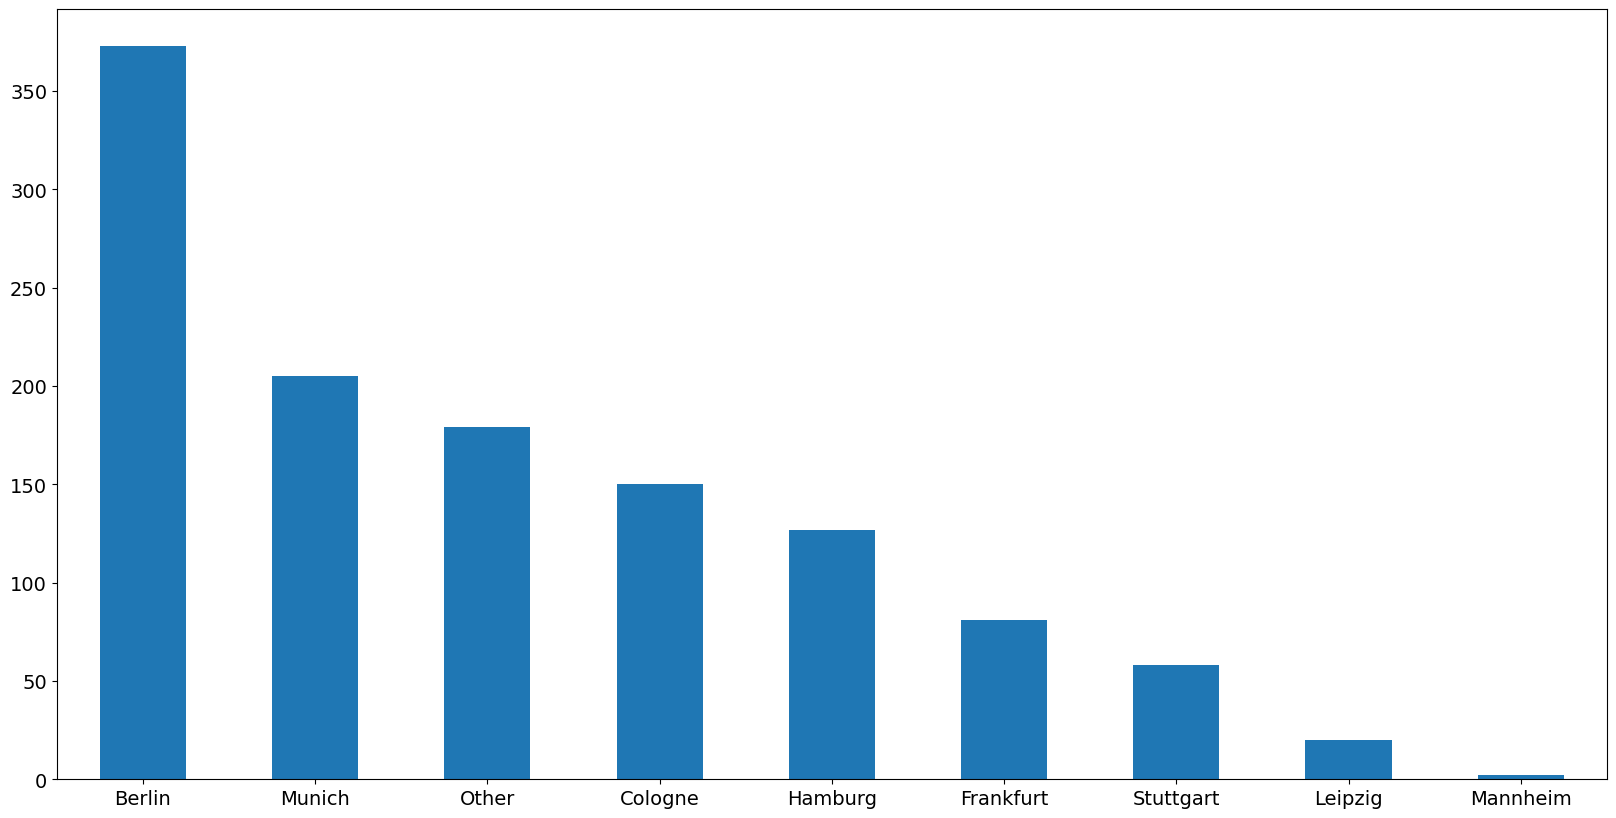

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
# Plot the number of startups per region
df_startups['region_mapping'].value_counts().plot(kind='bar', fontsize=14)

# Get current x-tick labels and capitalize the first letter
labels = [label.get_text().capitalize() for label in plt.gca().get_xticklabels()]

# Set new labels with the first letter capitalized
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)  # rotation set to 0 for horizontal labels

# Export graph as image called "Number of Startups per Region.png"
plt.savefig('graphs/Number of Startups per Region.png', bbox_inches='tight')
plt.show()

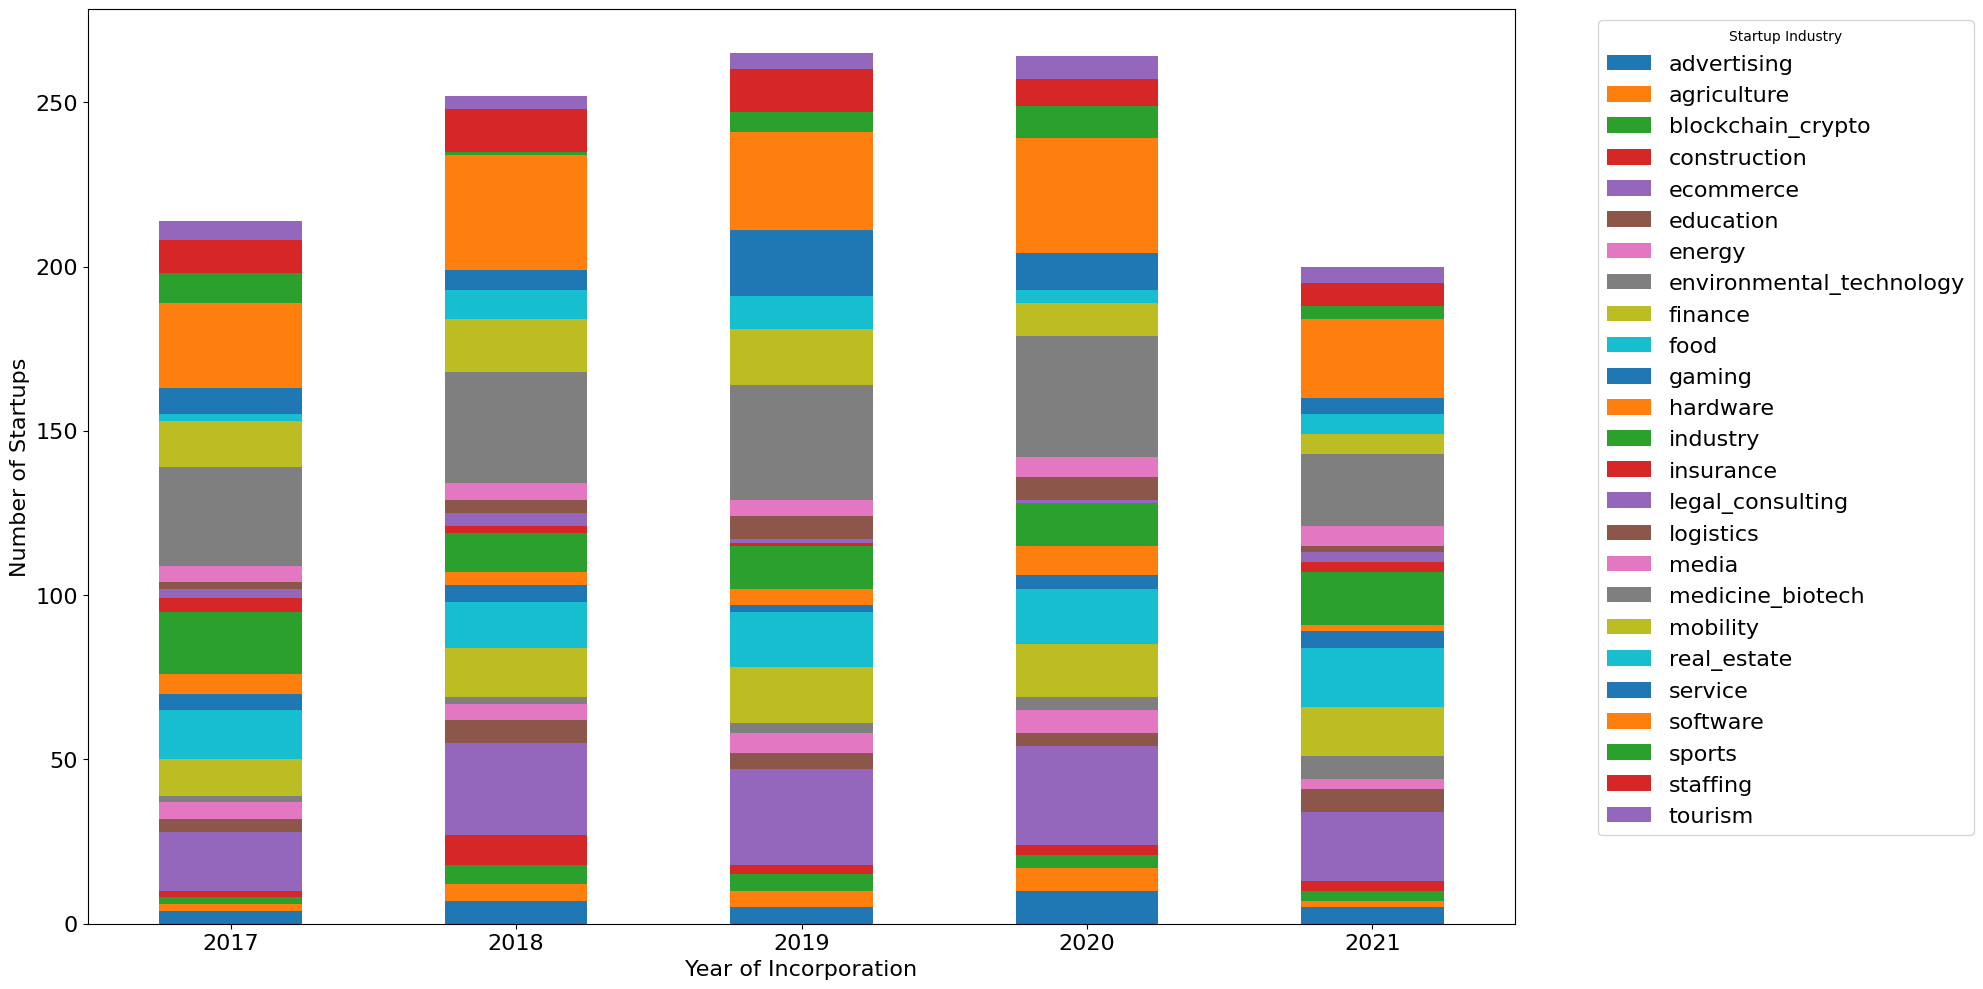

In [220]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
df_startups.groupby(['year_of_incorporation', 'startup_industry']).size().unstack().plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title with capitalized text and font size 16
ax.set_ylabel('Number of Startups', fontsize=16)
ax.set_xlabel('Year of Incorporation', fontsize=16)


# Ensure the x-axis labels are horizontal (which is the default, so no rotation is needed)
plt.xticks(fontsize=16, rotation ='horizontal')
plt.yticks(fontsize=16)

# Place the legend to the side of the plot with font size 16
ax.legend(title='Startup Industry', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Tweak the figure to prevent the legend from being cut off
fig.tight_layout()

# Save the plot
plt.savefig('output/Number of Startups per Year per Industry.png', bbox_inches='tight')

# Show the plot
plt.show()

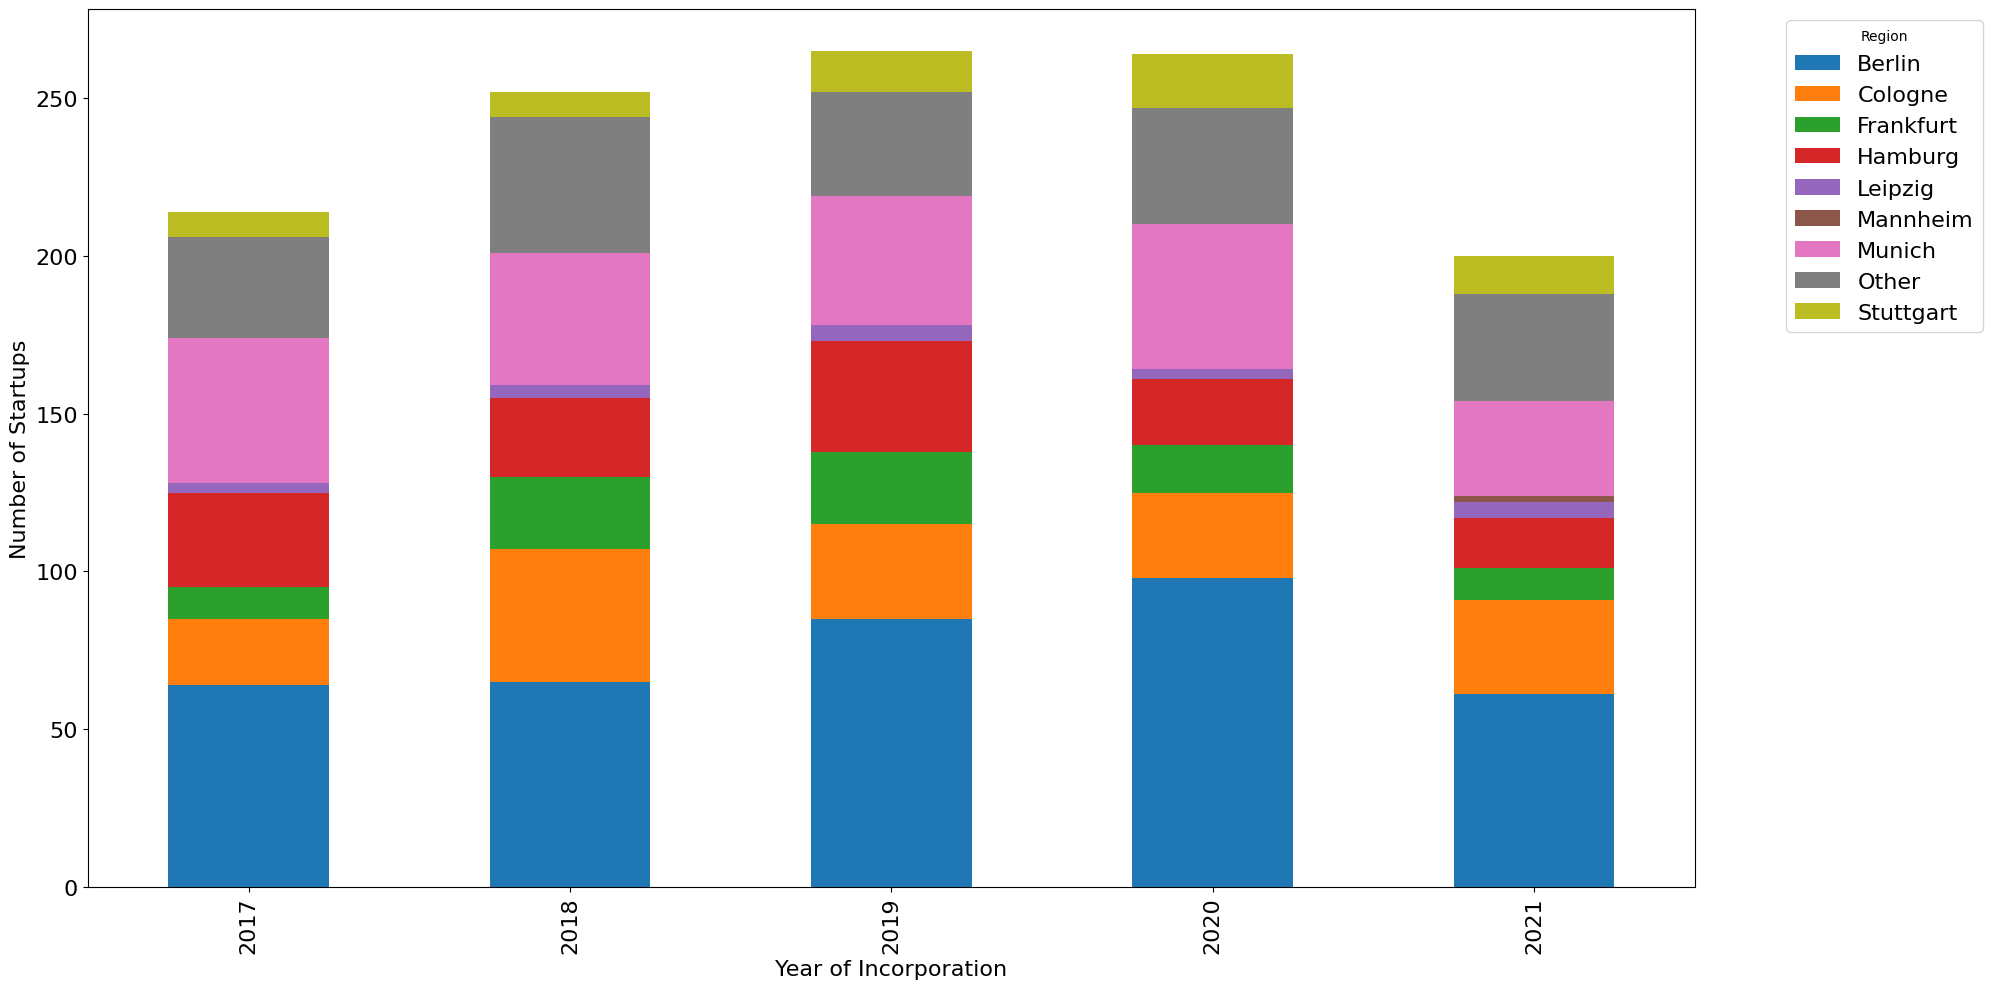

In [221]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
df_startups.groupby(['year_of_incorporation', 'region_mapping']).size().unstack().plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title with capitalized text and font size 16
ax.set_ylabel('Number of Startups', fontsize=16)
ax.set_xlabel('Year of Incorporation', fontsize=16)


# Ensure the x-axis labels are horizontal and set font size to 16
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Place the legend to the side of the plot with font size 16
legend = ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Capitalize the legend labels
for text in legend.get_texts():
    text.set_text(text.get_text().capitalize())

# Tweak the figure to prevent the legend from being cut off
fig.tight_layout()

# Save the plot
plt.savefig('output/Number of Startups per Year per Region.png', bbox_inches='tight')

# Show the plot
plt.show()

In [222]:
#Calculate average number of sahreholders and sd shareholders
average_number_of_shareholders = df_startups['number_shareholders'].mean()
sd_number_of_shareholders = df_startups['number_shareholders'].std()
average_number_of_shareholders, sd_number_of_shareholders

(8.613389121338912, 6.670981796986665)

In [223]:
#calculate average number of angels and sd angels
average_number_of_angels = df_startups['number_angels'].mean()
sd_number_of_angels = df_startups['number_angels'].std()
average_number_of_angels, sd_number_of_angels


(2.0393305439330542, 2.042092947212384)

## Network metrics



In [224]:
df_investment_rel_angel_startup

relation_id                     created_at  \
3            1959  2024-02-29 16:59:35.172778+00   
4            1970  2024-02-29 16:59:35.396716+00   
37          10121  2024-02-29 19:22:45.030248+00   
39           9432  2024-02-29 19:15:43.880909+00   
57            122  2024-02-29 16:41:45.654748+00   
...           ...                            ...   
27715       19224   2024-02-29 21:14:56.59349+00   
27757       14442  2024-02-29 20:27:56.342567+00   
27765       12324   2024-02-29 20:08:01.13122+00   
27766       12327  2024-02-29 20:08:01.197047+00   
27769       12338  2024-02-29 20:08:01.461687+00   

                                        shareholder_name shareholder_location  \
3                                             Simon Vogt    Frankfurt am Main   
4      Helen Oy Finnisches Patent und Registeramts (P...             Helsinki   
37                                        Frederik Dietz              Hamburg   
39                          5DMG UG (haftungsbeschränkt)            Karlsruhe   
57                              AREO B Beteiligungs GmbH            Osnabrück   
...                                                  ...                  ...   
27715                                  Next Big Thing AG               Berlin   
27757                                   FRESH Media GmbH            Ottobrunn   
27765                                Spree Eternity GmbH               Berlin   
27766                                    phm equity GmbH               Berlin   
27769          Campione Ventures UG (haftungsbeschränkt)              Cologne   

                birthdate   register_id  register_court  \
3      1991-11-19 0:00:00           NaN             NaN   
4                     NaN           NaN             NaN   
37     1977-12-17 0:00:00           NaN             NaN   
39                    NaN    HRB 722183        Mannheim   
57     1969-01-12 0:00:00    HRB 206849       Osnabrück   
...                   ...           ...             ...   
27715  1971-02-14 0:00:00  HRB 178480 B  Charlottenburg   
27757  1969-02-12 0:00:00    HRB 256756         München   
27765  1974-06-28 0:00:00  HRB 139036 B  Charlottenburg   
27766  1984-01-10 0:00:00  HRB 160130 B  Charlottenburg   
27769  1948-02-17 0:00:00     HRB 89795            Köln   

      percentage_of_total_shares shareholder_type       startup_name  ...  \
3                        18.0854            angel       &Charge GmbH  ...   
4                        24.0945            angel       &Charge GmbH  ...   
37                           NaN            angel     101skills GmbH  ...   
39                          37.5            angel    10er Karte GmbH  ...   
57                           1.9            angel  1648 Factory GmbH  ...   
...                          ...              ...                ...  ...   
27715                      47.41            angel  ZERO defects GmbH  ...   
27757                         44            angel         Zwopr GmbH  ...   
27765                     0.7951            angel       ZYP.ONE GmbH  ...   
27766                     0.7951            angel       ZYP.ONE GmbH  ...   
27769                     0.1913            angel       ZYP.ONE GmbH  ...   

          startup_region  count region_mapping  gender shareholder_region  \
3      frankfurt am main    1.0      frankfurt    male            leipzig   
4      frankfurt am main    1.0      frankfurt  female      international   
37               hamburg    1.0        hamburg    male            hamburg   
39             karlsruhe    1.0      stuttgart    male          stuttgart   
57               münster    1.0          other    male              other   
...                  ...    ...            ...     ...                ...   
27715             berlin    1.0         berlin    male             berlin   
27757            münchen    1.0         munich    male             munich   
27765             berlin    1.0         berlin    male             berlin   
2776

In [225]:
#Cosntruct a network graph of only the active angels
# get a list of co-investments
#replace all spaces with _ in shareholder_name_mapped in df_investment_relations_angel_startup
df_investment_rel_angel_startup['shareholder_name_mapped'] = df_investment_rel_angel_startup['shareholder_name_mapped'].str.replace(' ', '_')

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#get subset of only active angels
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]

# #get subset of df_investment_rel_angel_startup where startup_name is part of df_startups
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]


# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts)


         shareholder_name_mapped_x      shareholder_name_mapped_y  \
4528             ROMM_Holding_GmbH                 whiletrue_GmbH   
4896  Roskopf_Ventures_GmbH_Berlin              ROMM_Holding_GmbH   
4522             ROMM_Holding_GmbH   Roskopf_Ventures_GmbH_Berlin   
6223                whiletrue_GmbH              ROMM_Holding_GmbH   
306                     Alvio_GmbH              ROMM_Holding_GmbH   
...                            ...                            ...   
2233                    GUIDO_LANG                 Mark_Mailänder   
2232                    GUIDO_LANG       MARKUS_RICHARD_REISINGER   
2230                    GUIDO_LANG                   Lutz_Kettner   
2229                    GUIDO_LANG  JOHANNES_GERD_EDUARD_SCHRADER   
6249                 zero.one_GmbH                Jonas_Altenburg   

      CoInvestments  
4528              6  
4896              6  
4522              6  
6223              6  
306               5  
...             ...  
2233             

In [226]:
#sum up CoInvestments
sum_co_investments = co_investment_counts['CoInvestments'].sum()
sum_co_investments

7512

In [227]:
#save df_investment_rel_angel_startup as csv
df_investment_rel_angel_startup.to_csv('dataframes/df_investment_rel_angel_startup.csv', index=False)


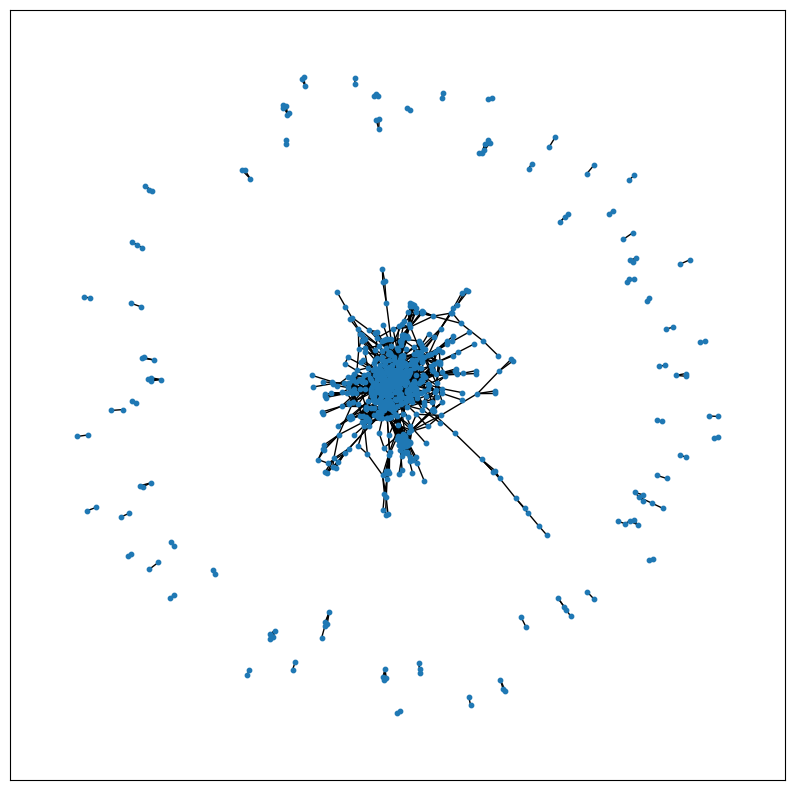

In [228]:
# Create a graph from the co_investment_counts DataFrame

G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [229]:
#get unique shareholder_ids in df_investment_rel_angel_startup
unique_shareholder_ids = df_investment_rel_angel_startup['shareholder_name_mapped'].unique()
len(unique_shareholder_ids)

959

In [230]:
#save unique_shareholder_ids to csv
unique_shareholder_ids

array(['Simon_Vogt', 'Helen_Oy', 'Frederik_Dietz',
       '5DMG_UG_(haftungsbeschränkt)', 'AREO_B_Beteiligungs_GmbH',
       'CSB_Beteiligungen_GmbH', 'SFO_Investment_GmbH',
       'BJF-Holding_GmbH', 'Cinco_Capital_GmbH', 'ID_Ventures_GmbH',
       'Jörg_Johannes_Schröder', 'Dirk_Willers',
       'Sutor_Vermögensverwaltungs_GmbH', 'Niklas_Günther',
       'Tobias_Lindenau', 'Frank_Neumann', 'Benjamin_Schwarz',
       'Andreas_Baier', 'Dr._David_Kuck',
       'Patrick_Fröse_Beteiligungsgesellschaft_UG_(haftungsbeschränkt)',
       'Marina_Guseva', 'Prof._Dr._Stefan_Dübel', 'Alexander_Lange',
       'Dr._Dr._Alexander_Weiss', 'MediVentures_GmbH',
       'High_Tech_Corporate_Service_GmbH',
       'First_Solid_Capital_GmbH_mit_Sitz_in_Hamburg',
       'Final_Frontier_GmbH', 'Florian_Sieber', 'Carl_Baasel',
       'ELUNDA_GmbH', 'Mutti_Ventures_GmbH', 'Torsten_Kurth',
       'goodcap_ventures_UG_(haftungsbeschränkt)',
       'Dupuis_Investment_GmbH', 'Benjamin_Takats', 'Dennis_Hauck',
    

In [231]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(G.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(G.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]

#Calculate eigenvector centrality per angel
eigenvector_centrality = nx.eigenvector_centrality(G)
#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

# #Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
# average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(G).items()])
# df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

# #Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
# median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(G).items()])
# df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

# #Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
# average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(G).items()])
# df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

# #Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
# median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(G).items()])
# df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

# #Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
# average_pagerank = np.mean([v for k,v in nx.pagerank(G).items()])
# df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

# #Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
# median_pagerank = np.median([v for k,v in nx.pagerank(G).items()])
# df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]


#sum up co-investments where shareholder_name_mapped_x = shareholder_name in df_angels_active
df_angels_active['number_of_co_investments'] = df_angels_active['shareholder_name'].map(co_investment_counts.groupby('shareholder_name_mapped_x')['CoInvestments'].sum())
#calculate mean
average_number_of_co_investments = df_angels_active['number_of_co_investments'].mean()
#add to df
df_network_descriptive.loc[16] = ["average_number_of_co_investors", average_number_of_co_investments]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = df_angels_active['number_of_co_investments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments_with_one_other_shareholder", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                               total_number_of_nodes   782.000000
1                               total_number_of_edges  3125.000000
2                                      average_degree     7.992327
3                                       median_degree     5.000000
4                      average_clustering_coefficient     0.560564
5                       median_clustering_coefficient     0.560564
8                      average_eigenvector_centrality     0.008762
9                       median_eigenvector_centrality     0.000036
16                     average_number_of_co_investors     9.606138
17          median_number_of_co_investments_per_angel     6.000000
18  maximum_number_of_co_investments_with_one_othe...     6.000000

In [232]:
co_investment_counts.groupby('shareholder_name_mapped_x')['CoInvestments'].sum()

shareholder_name_mapped_x
5W_Tech_Ventures_UG_(haftungsbeschränkt)     4
7gen_Holdings_GmbH                          10
8eyes_GmbH                                  16
A06_Ventures_UG_(haftungsbeschränkt)        11
ADVINOS_GmbH                                 4
                                            ..
transloid_GmbH                               3
ueGei_Capital_UG_(haftungsbeschränkt)        2
whiletrue_GmbH                              61
wrapall_UG_(haftungsbeschränkt)             19
zero.one_GmbH                                1
Name: CoInvestments, Length: 782, dtype: int64

Average shortest path length: 4.418709745539013
Average clustering coefficient: 0.5926320879348997
Is the original graph a small-world graph? True


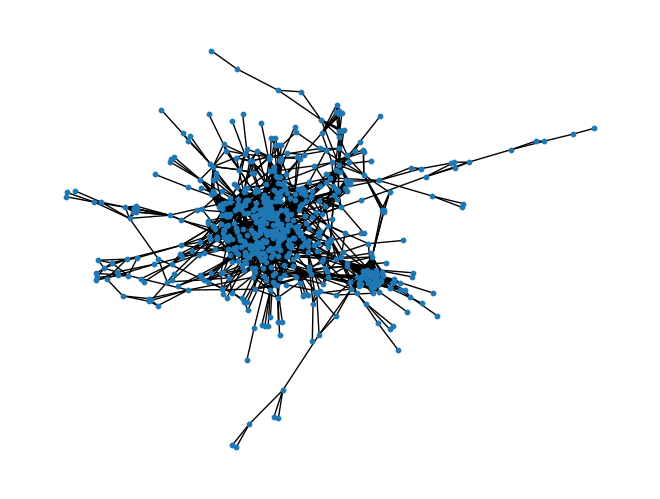

In [233]:
#check network for largest connected component
largest_cc = max(nx.connected_components(G), key=len)
import networkx as nx
#show largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)
#plot largest connected component
nx.draw(largest_cc_subgraph, with_labels=False, node_size=10, edge_color='black')


# # Calculate average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(largest_cc_subgraph)
print(f"Average shortest path length: {avg_shortest_path_length}")

# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(largest_cc_subgraph)
print(f"Average clustering coefficient: {avg_clustering_coeff}")

import numpy as np
# Create a random graph with the same number of nodes and similar number of edges, force connectedness
random_graph = nx.connected_watts_strogatz_graph(n=total_number_of_nodes, k=4, p=0.5)

# Calculate metrics for the random graph
random_avg_shortest_path_length = nx.average_shortest_path_length(random_graph)
random_avg_clustering_coeff = nx.average_clustering(random_graph)

# Compare metrics
print(f"Is the original graph a small-world graph? {np.all([(avg_clustering_coeff > random_avg_clustering_coeff), (avg_shortest_path_length <= random_avg_shortest_path_length)])}")

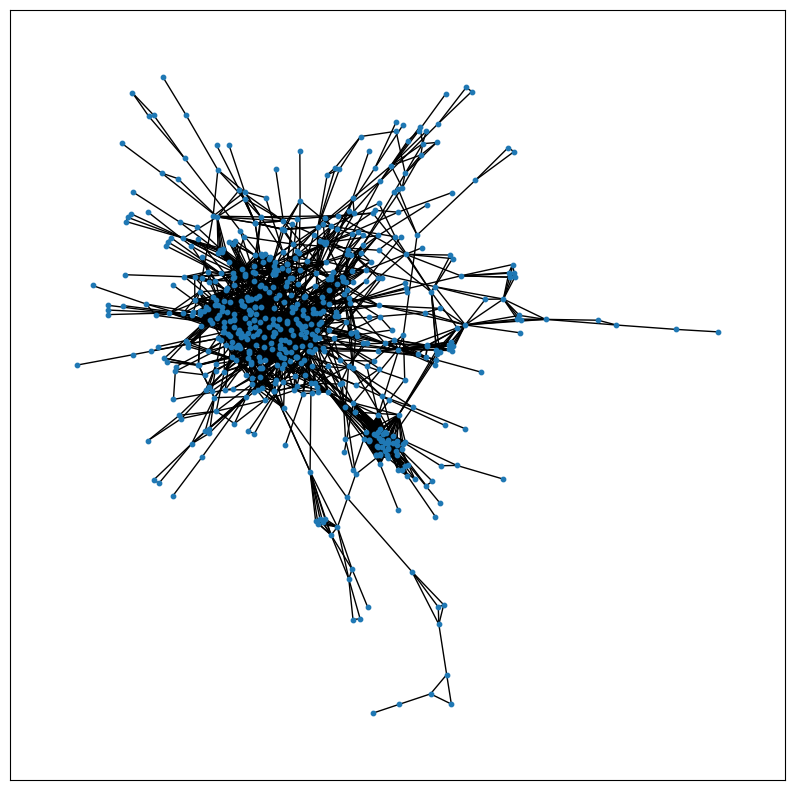

In [234]:
#plot largest subgraph
# Create a subgraph of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
#save as png
plt.savefig('graphs/largest_connected_component.png')
plt.show()


In [235]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(subgraph.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(subgraph.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                        total_number_of_nodes   616.000000
1                        total_number_of_edges  2987.000000
2                               average_degree     9.698052
3                                median_degree     7.000000
4               average_clustering_coefficient     0.592632
5                median_clustering_coefficient     0.592632
8               average_eigenvector_centrality     0.011124
9                median_eigenvector_centrality     0.000121
10              average_betweenness_centrality     0.005568
11               median_betweenness_centrality     0.001754
12                average_closeness_centrality     0.235446
13                 median_closeness_centrality     0.241035
14                            average_pagerank     0.001623
15                             median_pagerank     0.001538
16  average_number_of_co_investments_per_angel     1.201920
17   median_number_of_co_investments_per_angel     1.000000
18            maximum_number_of_co_investments     6.000000

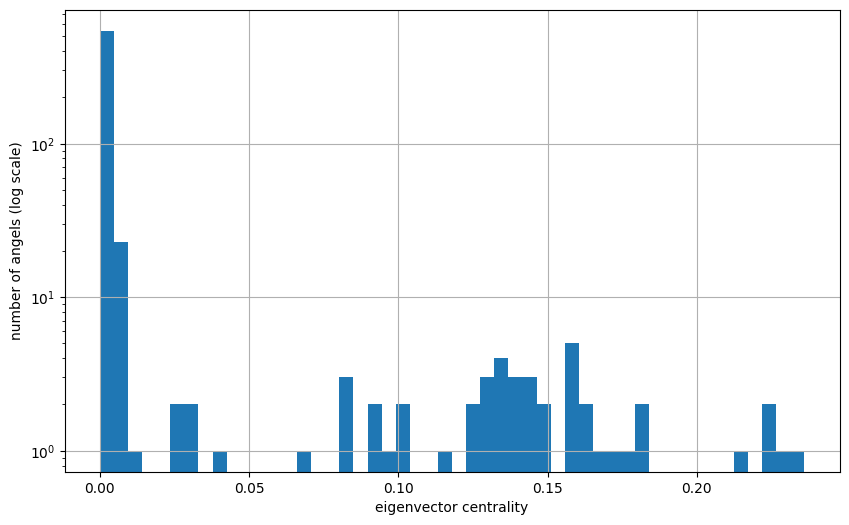

In [236]:
#plot distribution of eigenvector centrality values, start plot with 0.1 and end with 0.2
eigenvector_cebtrality_values= [v for k,v in nx.eigenvector_centrality(subgraph).items()]



#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(subgraph))
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_cebtrality_values, bins=50, log=True, range=(0, max(eigenvector_cebtrality_values)))

plt.xlabel('eigenvector centrality')
plt.ylabel('number of angels (log scale)')
plt.grid(True)

# plt.xticks(np.arange(0.2, 0.1))
# #Swap x and y axis

# #add title
# plt.title('Distribution of eigenvector centrality values')
# #add x label
# plt.xlabel('eigenvector centrality')
# #add y label
# plt.ylabel('number of angels')
# #add labels on x axis
# plt.xticks(rotation=90)
# #remove top and right spines
# plt.gca().spines['top'].set_visible(False)

# #export graph as image called "Distribution of eigenvector centrality values.png"
plt.savefig('graphs/Distribution of eigenvector centrality values.png')
plt.show()

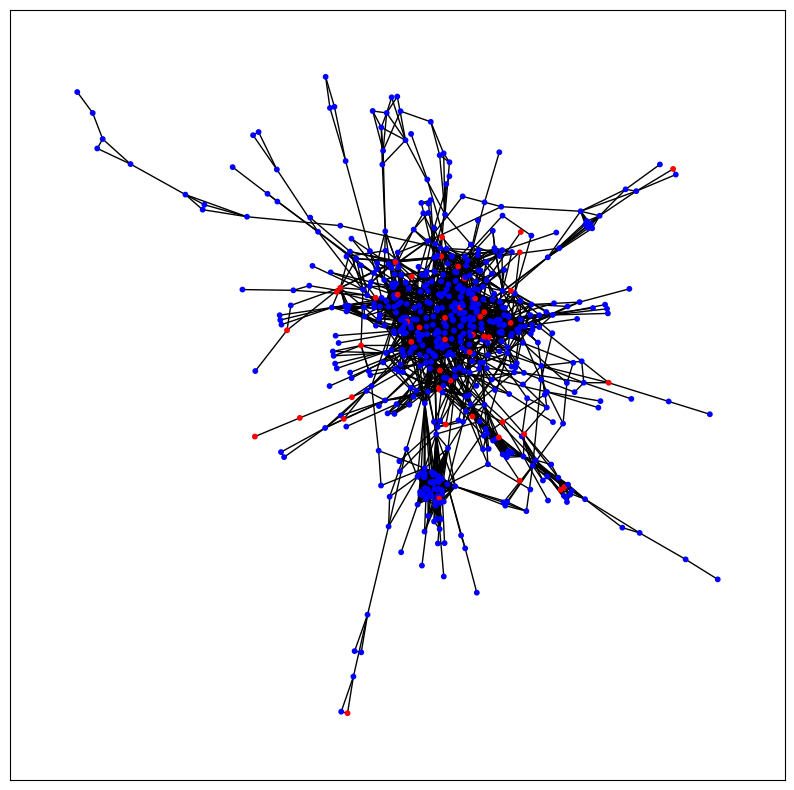

In [237]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

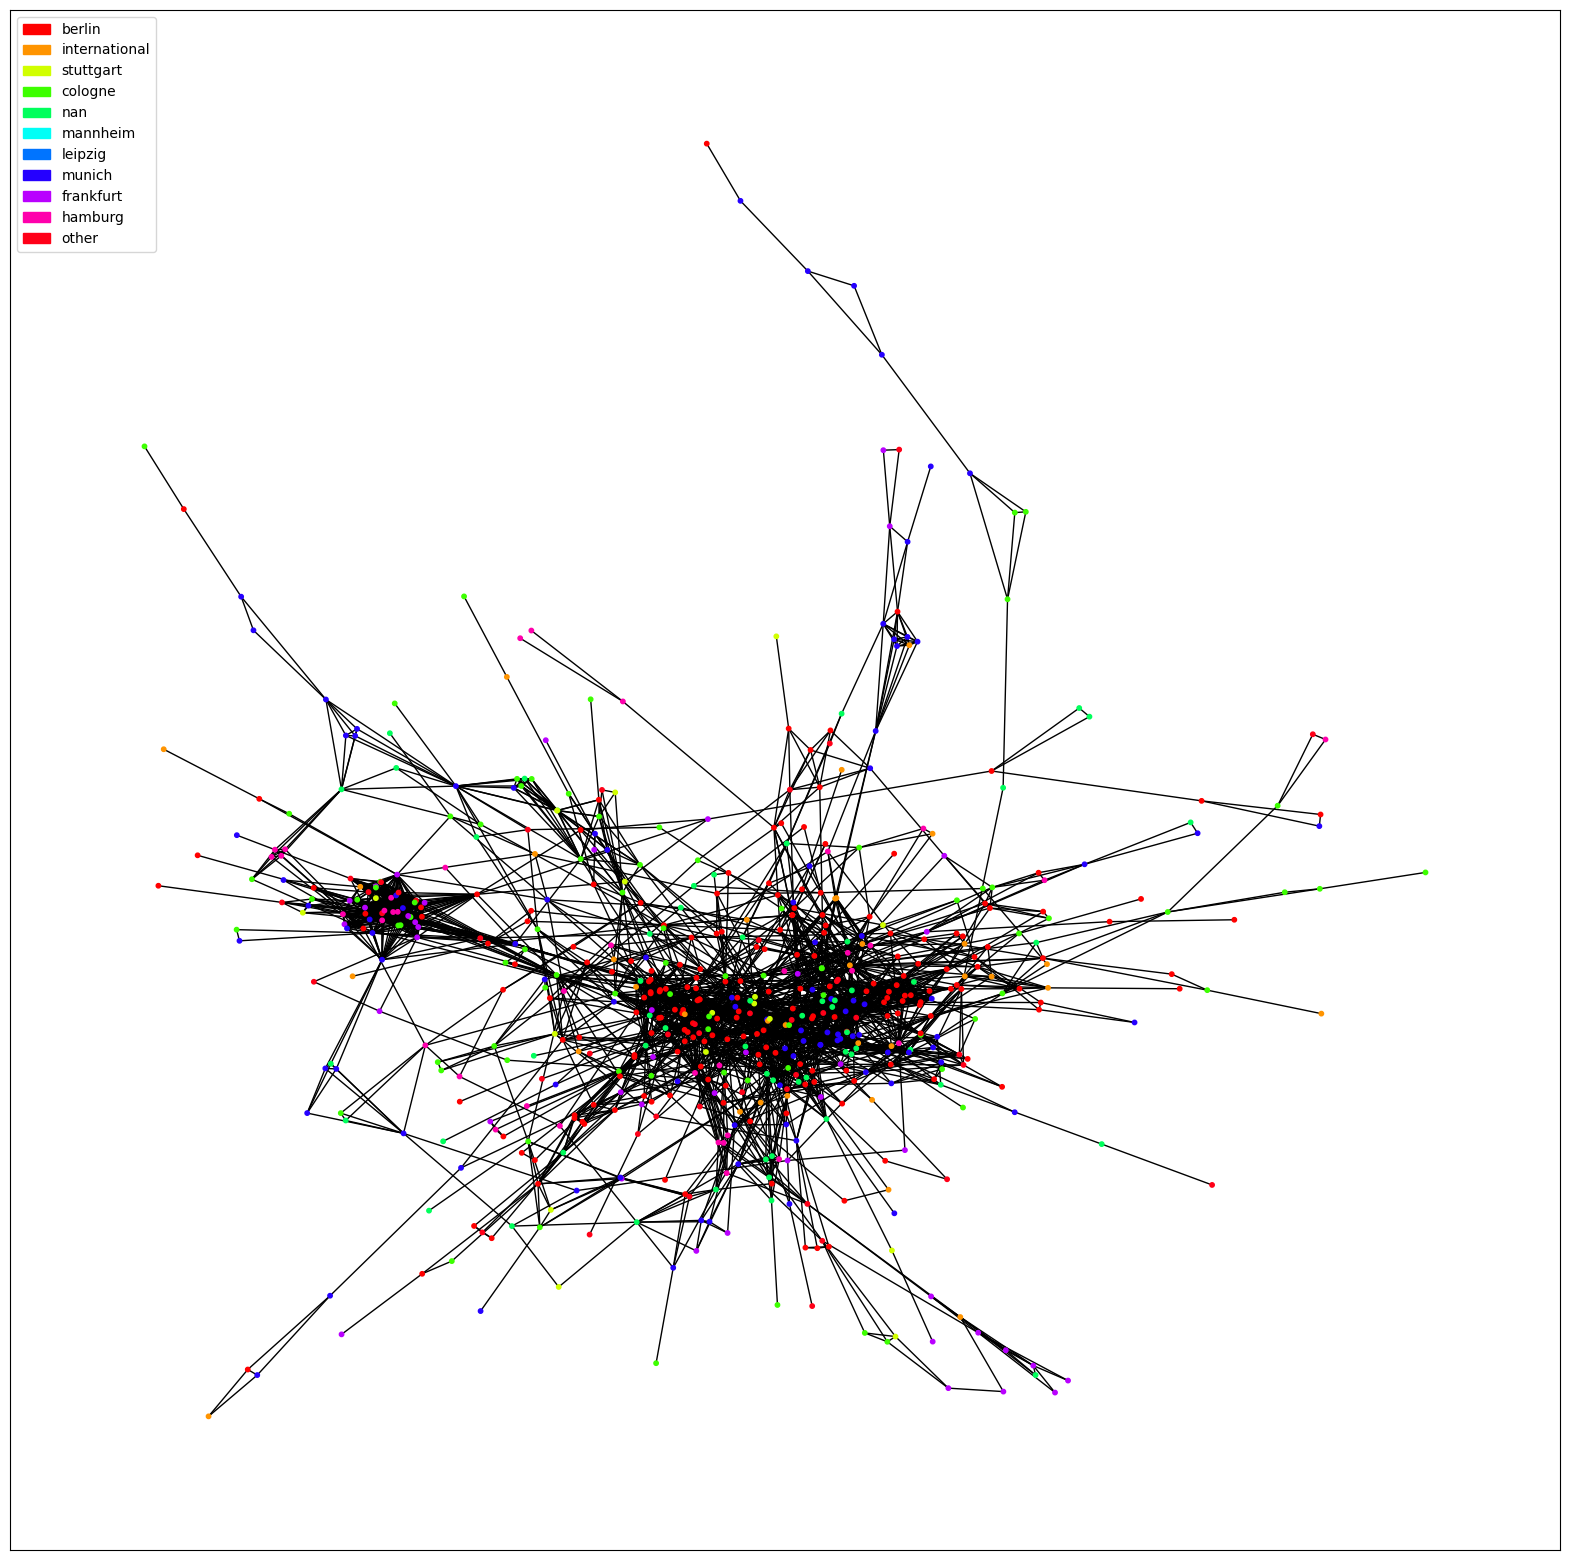

In [238]:
from matplotlib import patches


df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


In [239]:
# get subset of startups where link_si_file_current is ""
df_startups_no_link_si_file = df_startups[df_startups['link_si_file_current'].isnull()]
df_startups_no_link_si_file
#save as CSV
df_startups_no_link_si_file.to_csv('dataframes/startups_no_link_si_file.csv', sep=';')

In [240]:
#sum of number_angels of all startups
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels

2437

In [241]:
#get shareholders who are nodes in largest connected component
shareholders_in_largest_cc = set(subgraph.nodes)
#filter df_angels_active for shareholders in largest connected component
df_angels_active_largest_cc = df_angels_active[df_angels_active['shareholder_name'].isin(shareholders_in_largest_cc)]

#get subset of startup_name in df_investment_relations_angel_startup where minimum 2 angels in largest subgraph are shareholders
startups_in_largest_cc = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active_largest_cc['shareholder_name'])]

#get subset of startups in df_startups that are in startups_in_largest_cc
df_startups_largest_cc = df_startups[df_startups['startup_name'].isin(startups_in_largest_cc['startup_name'])]
df_startups_largest_cc

startup_id                     created_at  \
1           6259  2024-01-17 10:12:55.987461+00   
2          13422  2024-01-17 10:13:02.185889+00   
3           2404  2024-01-17 10:12:52.534717+00   
4           2186  2024-01-17 10:12:52.534717+00   
5           4741   2024-01-17 10:12:54.79246+00   
...          ...                            ...   
4863       12915  2024-01-17 10:13:01.504395+00   
4910         633  2024-01-17 10:12:50.707796+00   
4933       11240  2024-01-17 10:13:00.689369+00   
4951        6180  2024-01-17 10:12:55.987461+00   
5004       14101  2024-01-17 10:21:45.090336+00   

                             startup_name  \
1                        Avi Medical GmbH   
2                             CAPTIQ GmbH   
3     ostermeier H2ydrogen Solutions GmbH   
4               Amazing Brands Group GmbH   
5                WorkMotion Software GmbH   
...                                   ...   
4863                         StopApp GmbH   
4910                             wyz GmbH   
4933                    Healthmetrix GmbH   
4951                       AngelDesk GmbH   
5004                     BringLiesel GmbH   

                                       shareholder_json  \
1     {"shareholders":[{"shareholder_name":"Lata Ven...   
2                                                   NaN   
3     {"shareholders":[{"shareholder_name":"Ostermei...   
4     {"shareholders":[{"shareholder_name":"Amazing ...   
5                                                   NaN   
...                                                 ...   
4863                                                NaN   
4910  {"shareholders":[{"shareholder_name":"uncrowd ...   
4933                                                NaN   
4951  {"shareholders":[{"shareholder_name":"jvh-vent...   
5004                                                NaN   

                                               list_mds  number_shareholders  \
1     {"name":{"0":6259},"total_MDs":{"0":1},"gegens...                   57   
2     {"name":{"0":13422,"1":13422},"total_MDs":{"0"...                   55   
3     {"name":{"0":2404,"1":2404},"total_MDs":{"0":2...                   41   
4     {"name":{"0":2186,"1":2186},"total_MDs":{"0":2...                   40   
5     {"name":{"0":4741,"1":4741,"2":4741,"3":4741},...                   39   
...                                                 ...                  ...   
4863  {"name":{"0":12915},"total_MDs":{"0":1},"gegen...                    3   
4910  {"name":{"0":633,"1":633},"total_MDs":{"0":2,"...                    3   
4933  {"name":{"0":11240},"aktenzeichen":{"0":"HRB 1...                    3   
4951  {"name":{"0":6180},"total_MDs":{"0":1},"gegens...                    3   
5004  {"name":{"0":14101,"1":14101},"aktenzeichen":{...                    3   

      number_angels  startup_industry  \
1                12  medicine_biotech   
2                 3           finance   
3                14            energy   
4                 9         ecommerce   
5                10          staffing   
...             ...               ...   
4863              1          mobility   
4910              1              food   
4933              1  medicine_biotech   
4951              2           finance   
5004              1         ecommerce   

                                        startup_purpose  \
1     {"gegenstand": "Entwicklung und Vertrieb mediz...   
2     {"gegenstand": "die Verwaltung eigenen Verm\u0...   
3     {"gegenstand": "Entwicklung, Produktion, Vertr...   
4     {"gegenstand": "das Halten und Verwalten von B...   
5     {"gegenstand": "Software-Entwicklung, -Beratun...   
...                                                 ...   
4863  {"gegenstand": "die Entwicklung und der Vertri...   
4910  {"gegenstand": "ist die Herstellung, der Vertr...   
4933  {"gegenstand": "Die Entwicklung und der Betrie...   
4951  {"gegenstand": "die Erstellung und der Vertrie...   
5004  {"gegenstand": "Handel mit Bedarfs

In [242]:
df_angels_active

shareholder_name_old  shareholder_id  \
0                                    Jacobo Invest GmbH           768.0   
1                          CG Ventures GmbH Baiersbronn          1941.0   
2                         Charles Maxim Rolfe Songhurst          2792.0   
3          Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
4                                 Liberty Ventures GmbH          3959.0   
...                                                 ...             ...   
1301  Happy & Fresh Beratungs- und Beteiligungsgesel...          1847.0   
1302               Miyamax Beteiligungsgesellschaft mbH         20616.0   
1303                                        ALLUTI GmbH          9421.0   
1304                                 MM Investment GmbH          6459.0   
1305         F. Friede Ventures UG (haftungsbeschränkt)         11210.0   

                         created_at  number_of_investments shareholder_type  \
0     2024-03-10 17:37:19.751917+00                     15            angel   
1     2024-03-10 17:37:20.561047+00                     15            angel   
2     2024-03-10 17:37:20.561047+00                     14            angel   
3     2024-03-10 17:37:21.332579+00                     11            angel   
4     2024-03-10 17:37:21.332579+00                      8            angel   
...                             ...                    ...              ...   
1301  2024-03-10 17:37:20.561047+00                      2            angel   
1302  2024-03-10 17:37:30.929372+00                      2            angel   
1303  2024-03-10 17:37:24.528696+00                      2            angel   
1304  2024-03-10 17:37:22.963246+00                      2            angel   
1305  2024-03-10 17:37:25.834675+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
0       HRB 737155             Ulm            16.224912             109.0   
1       HRB 726408       Stuttgart             7.089747              95.0   
2              NaN             NaN             1.004879               NaN   
3       HRB 159992  Charlottenburg             0.468650             217.0   
4     HRB 158031 B  Charlottenburg            32.057400             217.0   
...            ...             ...                  ...               ...   
1301     HRB 39000         Dresden             8.500000             621.0   
1302    HRB 771450       Stuttgart            18.681650              95.0   
1303        210537    M\u00fcnchen             2.636859             136.0   
1304    HRB 216984  Charlottenburg            17.017700             217.0   
1305  HRB 151510 B  Charlottenburg             1.226000             217.0   

                                    shareholder_purpose  ... 2018 2019 2020  \
0     {"shareholder_purpose": "Halten von Beteiligun...  ...  3.0  5.0  3.0   
1     {"shareholder_purpose": "der Kauf, die dauernd...  ...  3.0  5.0  3.0   
2                                                   NaN  ...  4.0  4.0  3.0   
3     {"shareholder_purpose": "Das Halten und Verwal...  ...  0.0  3.0  5.0   
4     {"shareholder_purpose": "Der Erwerb, Halten, V...  ...  2.0  4.0  4.0   
...                                                 ...  ...  ...  ...  ...   
1301  {"shareholder_purpose": "Halten und Verwalten ...  ...  0.0  0.0  0.0   
1302  {"shareholder_purpose": "Der Erwerb, das langf...  ...  0.0  0.0  1.0   
1303  {"shareholder_purpose": "Verwaltung eigenen Ve...  ...  0.0  0.0  0.0   
1304  {"shareholder_purpose": "Die Verwaltung eigene...  ...  0.0  0.0  0.0   
1305  {"shareholder_purpose": "Der Erwerb, die Verwa...  ...  0.0  0.0  1.0   

     2021  status country industry_HHI region_HHI eigenvector_centrality  \
0     0.0  active      DE     0.671875   0.257812               0.000203   
1     2.0  active      AT     0.155556   0.404444               0.005056   
2     1.0  active      GB     0.173469   0.469388               0.000504   
3     2

## Simulating a network - 3



In [243]:
# Initialize an empty DataFrame to record the simulated investment relations
df_investment_rel_angel_startup_simulated = pd.DataFrame()

# Initialize a dictionary to keep track of the angels that have invested in each startup
angel_startup_map = {}
df_angels_active['number_of_simulated_investments'] = 0
# Loop through each startup
for _, startup in df_startups.iterrows():
    x = 0
    
    # Initialize an empty list for each startup to keep track of its angels
    angel_startup_map[startup['startup_name']] = []
    while x < startup['number_angels']:
        #cast to int
        #make string from year_of_incorporation
        startup['year_of_incorporation'] = str(startup['year_of_incorporation'])
        
        df_angels_active[startup['region_mapping']] = pd.to_numeric(df_angels_active[startup['region_mapping']], errors='coerce').fillna(1).astype(int)
        # Filter angels based on the criteria: active status, minimum 1 investment in the startup's startup_industry, and same location as the startup
        
        eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (df_angels_active[startup['startup_industry']].astype(int) >= 1) &
                                    (df_angels_active[startup['region_mapping']] >= 1)&
                                    #check if angel has invested in the year
                                    (df_angels_active[startup['year_of_incorporation']] >= 1) &

                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))
                                    #check if number of investments is less than number of simulated investments for the respective shareholder_name
                                    & (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]
                                                        
        
        # If there are eligible angels
        if not eligible_angels.empty:
            # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
            # Calculate the probability of drawing each angel but have a randomness factor in it
            #increase investment probability for angels in df_angels_active
            


            eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
            #increase probability to be selected of angels who have a simulated investment already
            eligible_angels.loc[eligible_angels['number_of_simulated_investments'] > 0, 'investment_probability'] += 0.2
            

            # Sample an angel based on the probability
            sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                
            
            # Create a record of the investment relationship
            investment_record = pd.DataFrame({
                'startup_name': [startup['startup_name']],
                'angel': [sampled_angel.iloc[0]['shareholder_name']],  # Assuming df_angels_active has a 'shareholder_name' column
                'startup_industry': [startup['startup_industry']],  # Assuming df_startups has an 'startup_industry' column
                'region': [sampled_angel.iloc[0]['region_mapping']],  # Assuming df_angels_active has a 'location' column
                'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],  # Assuming df_angels_active has a 'total_participation' column
                'birthdate': [sampled_angel.iloc[0]['birthdate']]  # Assuming df_angels_active has a 'birthdate' column
            })
            
            # Append the record to the df_investment_rel_angel_startup DataFrame
            df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
            #increase number of simulated investments where angel matches shareholder_name in df_angels_active
            df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
            

            
            # Add the angel to the list of drawn angels for the startup
            angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
            x += 1
        else:
            # If no eligible angel is left, relax the location criterion and take an angel that fulfills all criteria except location
            eligible_angels = df_angels_active[
                    (df_angels_active['status'] == "active") & 
                    (df_angels_active[startup['region_mapping']].astype(int) >= 1) &  # Checks if angel has invested in at least one startup industry
                    # (
                    #     (df_angels_active[startup['startup_industry']].astype(int) >= 1) |  # Checks if angel has invested in at least one startup industry
                    #     (df_angels_active[startup['region_mapping']] >= 1)                         # OR angel has invested in at least one startup region
                    # ) &
                    (df_angels_active[startup['year_of_incorporation']] >= 1) &
                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']])) &
                    (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])
                ]
            if not eligible_angels.empty:
                # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
                # Calculate the probability of drawing each angel
                eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                
                # Sample an angel based on the probability
                sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    
        
                # Create a record of the investment relationship
                investment_record = pd.DataFrame({
                    'startup_name': [startup['startup_name']],
                    'angel': [sampled_angel.iloc[0]['shareholder_name']],
                    'startup_industry': [startup['startup_industry']],
                    'region': [sampled_angel.iloc[0]['region_mapping']],
                    'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                    'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                    'birthdate': [sampled_angel.iloc[0]['birthdate']]
                })
            
                # Append the record to the df_investment_rel_angel_startup DataFrame
                df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                # Add the angel to the list of drawn angels for the startup
                angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                x += 1
            else:
                # If no eligible angel is still left, take any active and eligible angel regardless of startup_industry
                eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))&
                                     #get all angels where number of simulated investments is less than number of investments
                                    (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]                                    
                                     
                if not eligible_angels.empty:
                    # Sample a random angel from the eligible angels
                    eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                    
                    sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    # Create a record of the investment relationship
                    investment_record = pd.DataFrame({
                        'startup_name': [startup['startup_name']],
                        'angel': [sampled_angel.iloc[0]['shareholder_name']],
                        'startup_industry': [startup['startup_industry']],
                        'region': [sampled_angel.iloc[0]['region_mapping']],
                        'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                        'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                        'birthdate': [sampled_angel.iloc[0]['birthdate']]
                    })
            
                    # Append the record to the df_investment_rel_angel_startup DataFrame
                    df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                    df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                    # Add the angel to the list of drawn angels for the startup
                    angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                    x += 1
                else:
                    print("No eligible angel left")

In [244]:
# #load simulated network from csv
# df_investment_rel_angel_startup_simulated = pd.read_csv('dataframes/df_investment_rel_angel_startup_simulated.csv')

In [245]:
#calculate total sum of angel investors
total_number_of_angel_investors_simulated = len(df_investment_rel_angel_startup_simulated)
total_number_of_angel_investors= len(df_investment_rel_angel_startup)
#print data verification
print(f"Total number of angel investors in original data: {total_number_of_angel_investors}")
print(f"Total number of angel investors in simulated data: {total_number_of_angel_investors_simulated}")
if total_number_of_angel_investors_simulated == total_number_of_angel_investors:
    print("Network successfully simulated")

Total number of angel investors in original data: 2437
Total number of angel investors in simulated data: 2437
Network successfully simulated


In [246]:
#create a network graph from the simulated data
# Create a new DataFrame where each row represents a co-investment
co_investments_simulated = df_investment_rel_angel_startup_simulated.merge(df_investment_rel_angel_startup_simulated, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_simulated = co_investments_simulated[co_investments_simulated['angel_x'] != co_investments_simulated['angel_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_simulated = co_investments_simulated.groupby(['angel_x', 'angel_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts_simulated['angel_x'] = co_investment_counts_simulated['angel_x'].str.replace(' ', '_')
co_investment_counts_simulated['angel_y'] = co_investment_counts_simulated['angel_y'].str.replace(' ', '_')

co_investment_counts_simulated.to_csv('co_investment_counts_simulated.csv', index=False)

#sort by number of co-investments
co_investment_counts_simulated = co_investment_counts_simulated.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_simulated)




                                                angel_x  \
895                        CG_Ventures_GmbH_Baiersbronn   
3141                                 Jacobo_Invest_GmbH   
6288  Vento_Ventures_GmbH_mit_Sitz_in_Berlin_with_re...   
4472                                    Oliver_Diezmann   
1180                      Charles_Maxim_Rolfe_Songhurst   
...                                                 ...   
2388    GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
2387    GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
2386    GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
2385    GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
6847                                      zero.one_GmbH   

                                          angel_y  CoInvestments  
895                          Bochum_Ventures_GmbH              4  
3141                Charles_Maxim_Rolfe_Songhurst              4  
6288                           JAN_ARNE_TEGTMEIER              4  
4472                   

In [247]:
# # #save as csv
# df_investment_rel_angel_startup_simulated.to_csv('dataframes/df_investment_rel_angel_startup_simulated.csv', index=False)

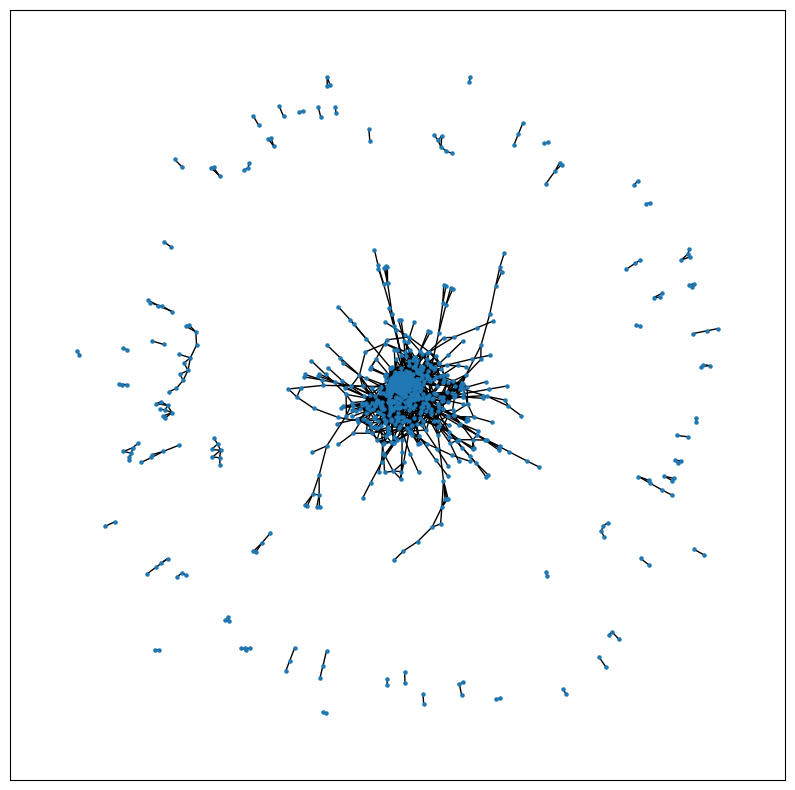

In [248]:
#plot network graph of simulated data
# Create a graph from the co_investment_counts DataFrame

G_simulated = nx.from_pandas_edgelist(co_investment_counts_simulated, 'angel_x', 'angel_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_simulated)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G_simulated, pos, with_labels=False, node_size=5, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
#save graph as png
plt.savefig('graphs/Simulated Network Graph.png')
plt.show()



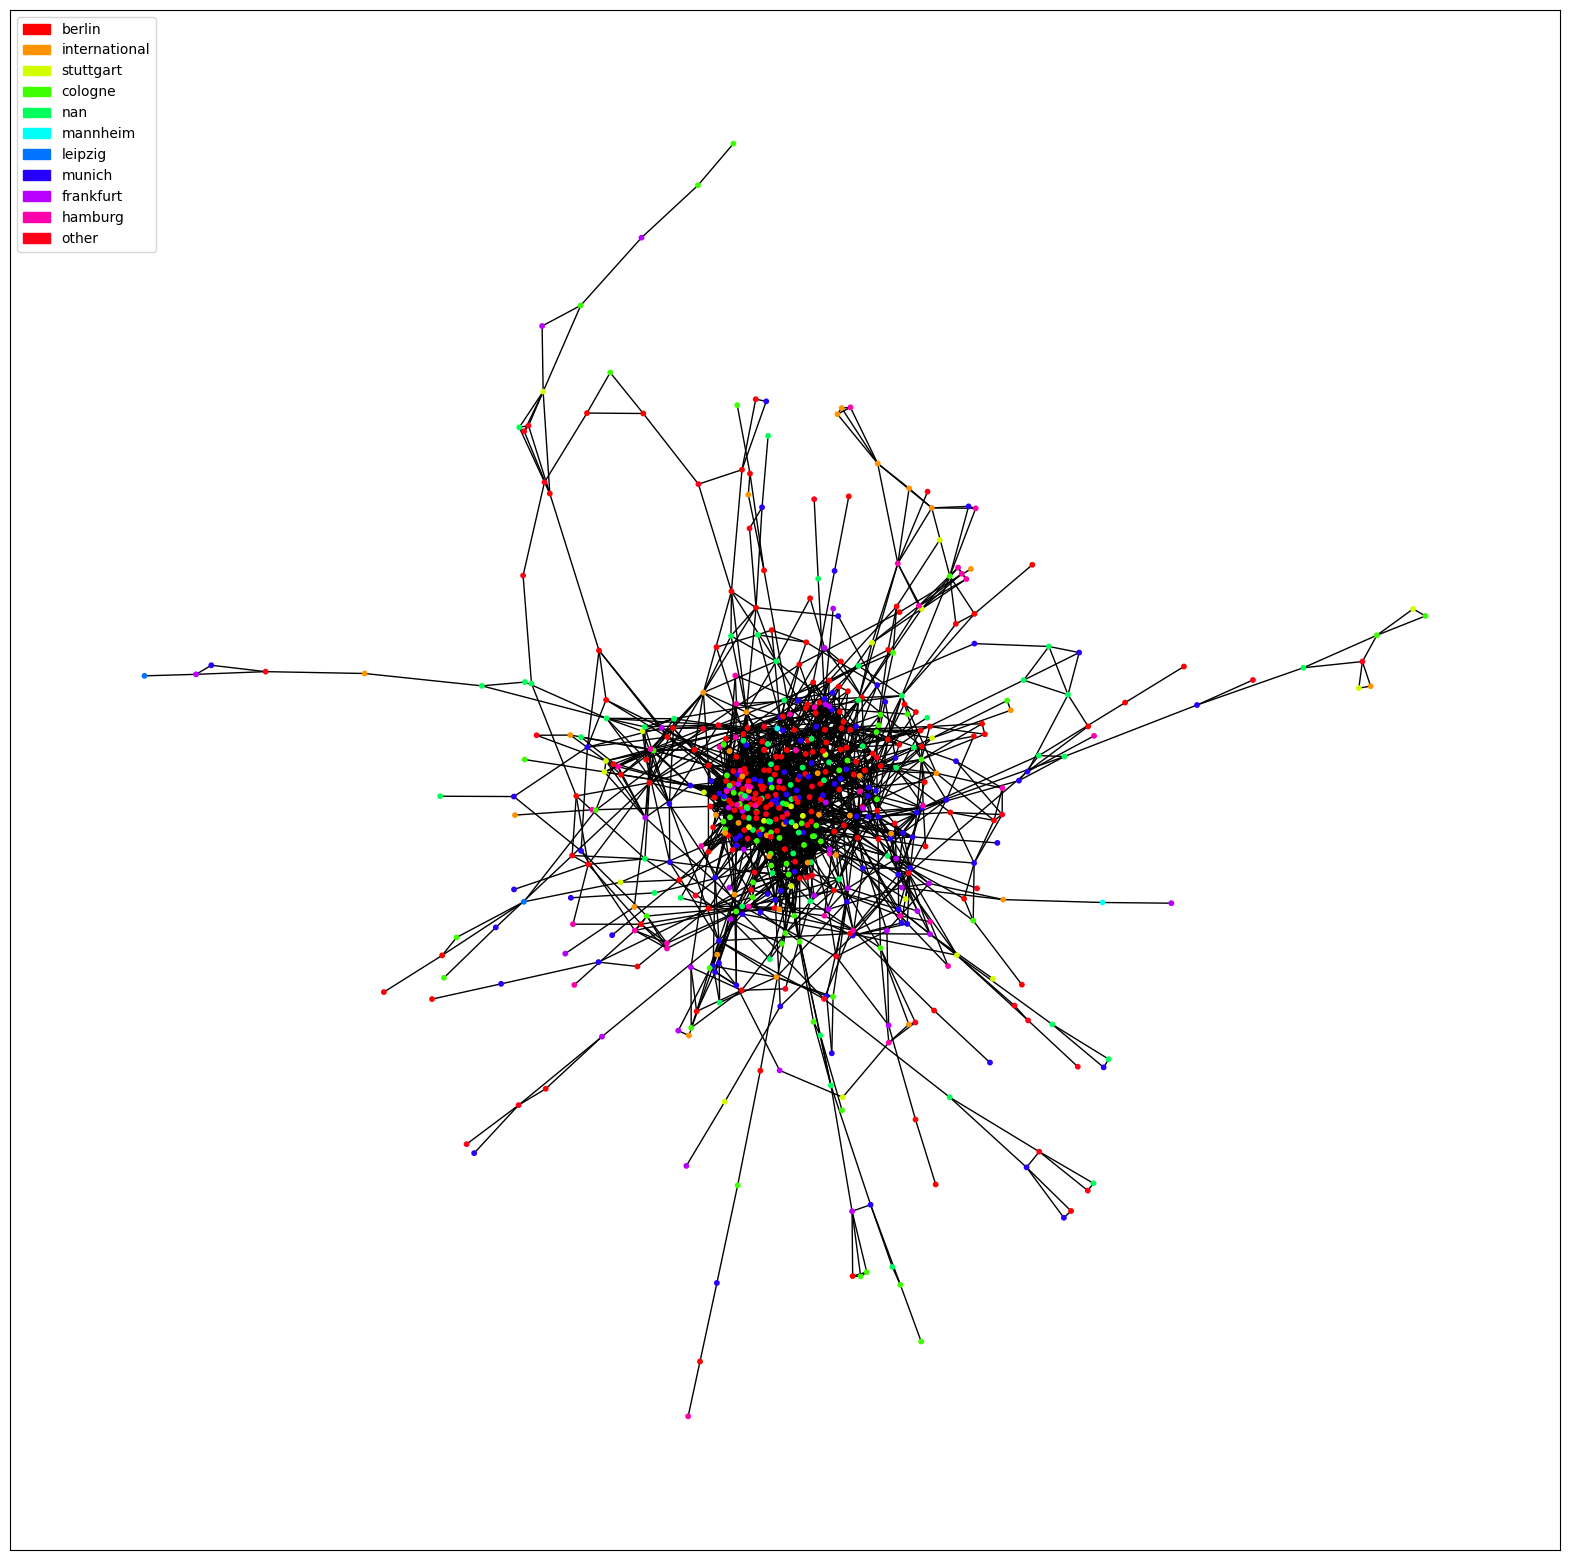

In [249]:
from matplotlib import patches

#get largest subgraph_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)

df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph_simulated.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping_simulated.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


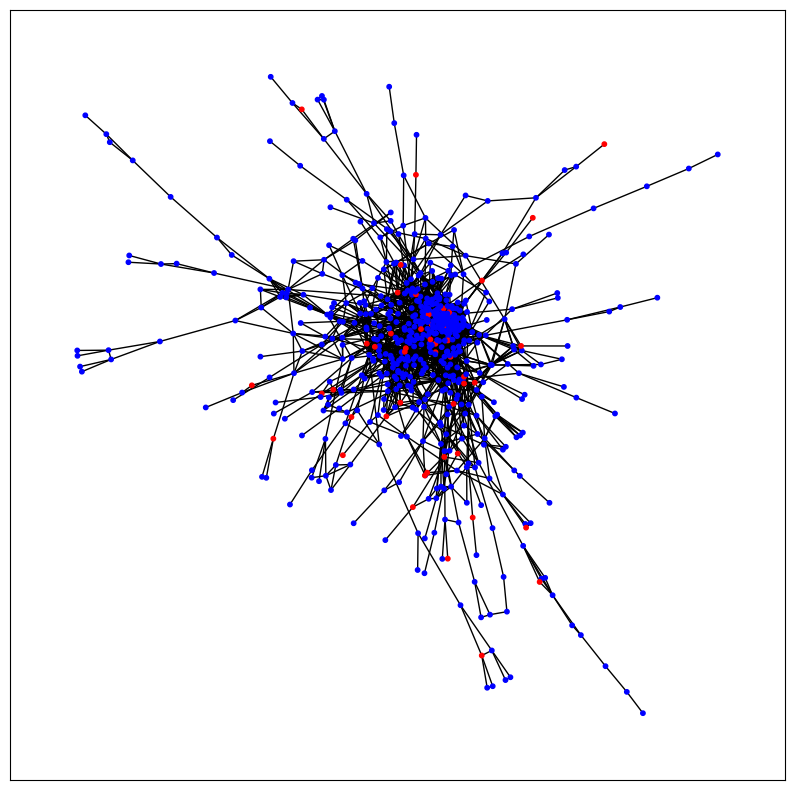

In [250]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph_simulated.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph_simulated.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

In [251]:
#Draw a network graph of active angels only
# Create a new DataFrame where each row represents a co-investment

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_angels[['name','status']], left_on='name', right_on='name', how='left')
#only consider active angels
# df_investment_rel_angel_startup_active = df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']

co_investments_active = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_active = co_investments_active[co_investments_active['shareholder_name_mapped_x'] != co_investments_active['shareholder_name_mapped_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_active = co_investments_active.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts_active['shareholder_name_mapped_x'] = co_investment_counts_active['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts_active['shareholder_name_mapped_y'] = co_investment_counts_active['shareholder_name_mapped_y'].str.replace(' ', '_')

co_investment_counts_active.to_csv('co_investment_counts_active.csv', index=False)

#sort by number of co-investments
co_investment_counts_active = co_investment_counts_active.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_active)

         shareholder_name_mapped_x      shareholder_name_mapped_y  \
4528             ROMM_Holding_GmbH                 whiletrue_GmbH   
4896  Roskopf_Ventures_GmbH_Berlin              ROMM_Holding_GmbH   
4522             ROMM_Holding_GmbH   Roskopf_Ventures_GmbH_Berlin   
6223                whiletrue_GmbH              ROMM_Holding_GmbH   
306                     Alvio_GmbH              ROMM_Holding_GmbH   
...                            ...                            ...   
2233                    GUIDO_LANG                 Mark_Mailänder   
2232                    GUIDO_LANG       MARKUS_RICHARD_REISINGER   
2230                    GUIDO_LANG                   Lutz_Kettner   
2229                    GUIDO_LANG  JOHANNES_GERD_EDUARD_SCHRADER   
6249                 zero.one_GmbH                Jonas_Altenburg   

      CoInvestments  
4528              6  
4896              6  
4522              6  
6223              6  
306               5  
...             ...  
2233             

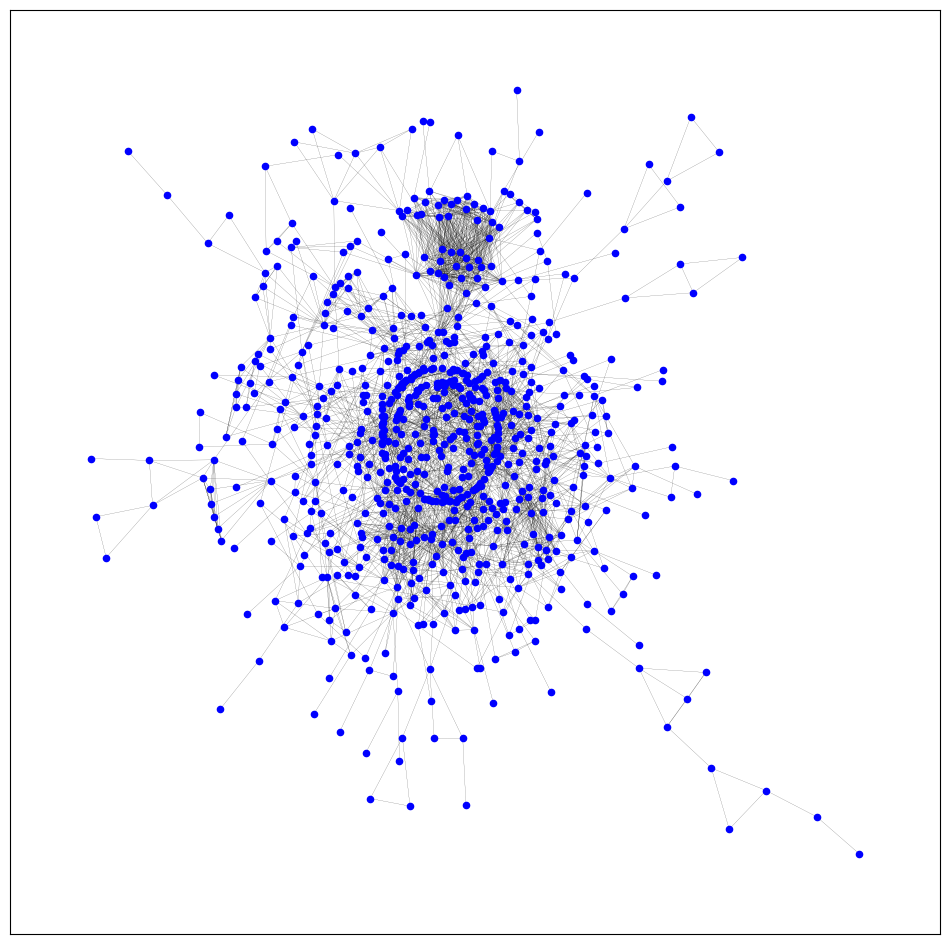

In [252]:
#plot network graph of active angels only
# Create a graph from the co_investment_counts DataFrame

G_active = nx.from_pandas_edgelist(co_investment_counts_active, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.kamada_kawai_layout(G_active, scale=2)  
# pos = nx.spring_layout(G_active)
#make the graph bigger
plt.figure(figsize=(12,12))
# make nodes bigger in the graph
nx.draw_networkx(G_active, pos, with_labels=False, node_size=20, width=0.1, edge_color='black', node_color='blue')
# nx.draw_networkx(G_active, pos, with_labels=False, node_size=5, edge_color='black', node_color='green')

#Save graph as png
plt.savefig('graphs/Active Angels Network Graph.png')

## Detecting communities - 4



In [253]:
from cdlib import algorithms
import networkx as nx
import igraph as ig

In [254]:
# Was nutzen wir (angelehnt an bubna, aber deren walk trap ausgetaischt mit apparently more robus leiden algorithmus) considered
# - Leiden (von louvain zu Leiden)
# - minimum 5 community members
# - diameter of the community not larger than 1/4 of the diameter of the largest connected subgraph

#Community detection, where we remove all communitiues that are only composed of less than 5 nodes or which have a diameter larger than 1/4 of the network diameter
from cdlib import algorithms
# Create a networkx graph (replace this with your graph)
def detectCommunities(G, method):
    # Apply the Walktrap algorithm to the graph
    if method == 'walktrap':
        coms = algorithms.walktrap(G)
    if method == 'louvain':
        coms = algorithms.louvain(G)
    if method == 'leiden':
        coms = algorithms.leiden(G)
    if method == 'infomap':
        coms = algorithms.infomap(G)
    print(f"We are using the {method} algorithm to detect communities\n")

    print("The network has "+ str(G.number_of_nodes())+" nodes\n")
    print("We detected "+str(len(coms.communities))+' communities\n')

    print("The communities have those sizes respectively: \n")
    print([len(community) for community in coms.communities]) # print sizes of all remaining communities
    #remove all smaller than 5
    largest_cc = max(nx.connected_components(G), key=len)

    # Generate the subgraph of G consisting only of this component
    subgraph = G.subgraph(largest_cc)

    # Calculate and print the diameter of this subgraph
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    coms.communities = [community for community in coms.communities if nx.diameter(G.subgraph(community)) <= network_diameter /4]
    
    coms.communities = [community for community in coms.communities if len(community) >4]
    # #remove communities larger than 25
    # coms.communities = [community for community in coms.communities if len(community) < 25]
    print("After removing all with less than 5 community members we have "+str(len(coms.communities))+" communities left. \n")
    print(coms.communities)
    return coms.communities


def comparison(G):
    communities_walktrap = detectCommunities(G,'walktrap')
    communities_louvain = detectCommunities(G,'louvain')
    communities_leiden = detectCommunities(G,'leiden')
    communities_infomap = detectCommunities(G,'infomap')

    # Create df that compares the number of communities across the different methods
    df_community_comparison = pd.DataFrame(columns=("method","number_of_communities"))
    df_community_comparison.loc[0] = ["walktrap", len(communities_walktrap)]
    df_community_comparison.loc[1] = ["louvain", len(communities_louvain)]
    df_community_comparison.loc[2] = ["leiden", len(communities_leiden)]
    df_community_comparison.loc[3] = ["infomap", len(communities_infomap)]
    return df_community_comparison

# comparison_g_active = comparison(G_active)
# comparison_g_simulated = comparison(G_simulated)

# #Same thing for simulated data

# # Create a networkx graph (replace this with your graph)
# print(comparison_g_active)
# print(comparison_g_simulated)


We are using the infomap algorithm to detect communities

The network has 616 nodes

We detected 61 communities

The communities have those sizes respectively: 

[53, 31, 23, 20, 19, 19, 17, 16, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 10, 10, 10, 10, 9, 9, 9, 9, 8, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2]
After removing all with less than 5 community members we have 40 communities left. 

[['ROMM_Holding_GmbH', 'whiletrue_GmbH', 'Roskopf_Ventures_GmbH_Berlin', 'Alvio_GmbH', 'PK_Projects_GmbH', 'Oyfri_GmbH', 'Michael_Schrezenmaier', 'Mercutio_GmbH_Berlin', 'jvh-ventures_GmbH', 'asteros_ventures_GmbH', 'Rieke_Ventures_GmbH', 'OMA_Ventures_GmbH', 'NP_Projects_GmbH', 'S.W._Projects_GmbH', 'huesmann_Punkt_GmbH', 'Blackbird_Internet_UG_(haftungsbeschränkt)', 'Felix_Jahn_Beteiligungen_GmbH', 'J._B._Projects_GmbH', 'Markus_Winter', 'Pasame_XingFu_UG_(haftungsbeschränkt)_Berlin', 'Dirk_Radzinski', 'Micha_Hernandez_van_Leuffen',

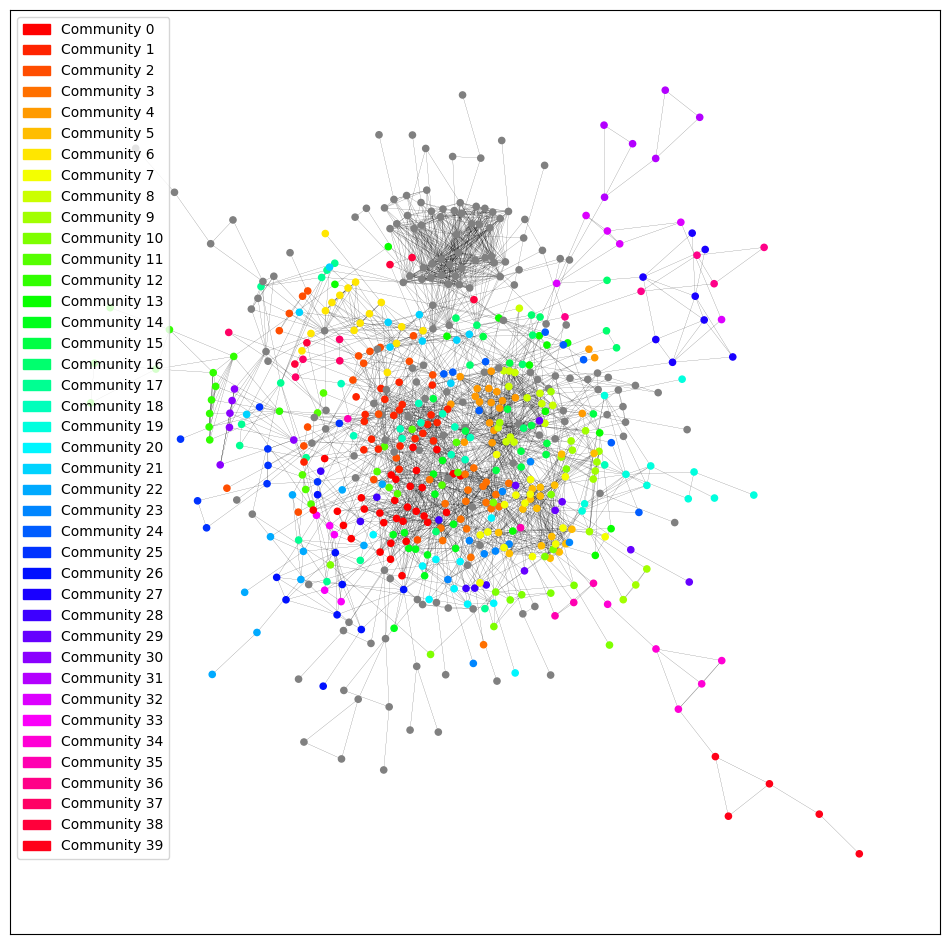

{'CG_Ventures_GmbH_Baiersbronn': 0, 'Bochum_Ventures_GmbH': 0, 'Jacobo_Invest_GmbH': 0, 'Charles_Maxim_Rolfe_Songhurst': 0, 'Vento_Ventures_GmbH_mit_Sitz_in_Berlin_with_registered_office_in_Berlin': 0, 'JAN_ARNE_TEGTMEIER': 0, 'Oliver_Diezmann': 0, 'DIRK_BREITBACH': 0, 'ROMM_Holding_GmbH': 0, 'Renner_Ventures_UG_(haftungsbeschränkt)': 0, 'GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)': 0, 'Mücke_&_Sturm_Beteiligungsgesellschaft_mbH': 0, 'Severe_Capital_GmbH': 0, 'Alvio_GmbH': 0, 'Inventures_GmbH': 0, 'STEFAN_SCHMÖLZ': 0, 'whiletrue_GmbH': 0, 'MJM_Investments': 0, 'Renner_Ventures_&_Philanthropies_GmbH': 0, 'Roskopf_Ventures_GmbH_Berlin': 0, 'Dr._Joachim_Maus': 0, 'Ralph_Müller': 0, 'JTD_Holding_GmbH_AG': 0, 'DR._MARTIN_HECKER': 0, 'Felix_Jahn_Beteiligungen_GmbH': 0, 'Benjamin_Günther_Invest_GmbH': 0, 'Swish_UG_(haftungsbeschränkt)': 0, 'Schwenke_Consulting_UG_(haftungsbeschränkt)': 0, 'Next_Big_Thing_AG': 0, 'Sebastian_Schuon_Investments_GmbH': 0, 'Reber_Capital_UG_(haftungsbeschränk

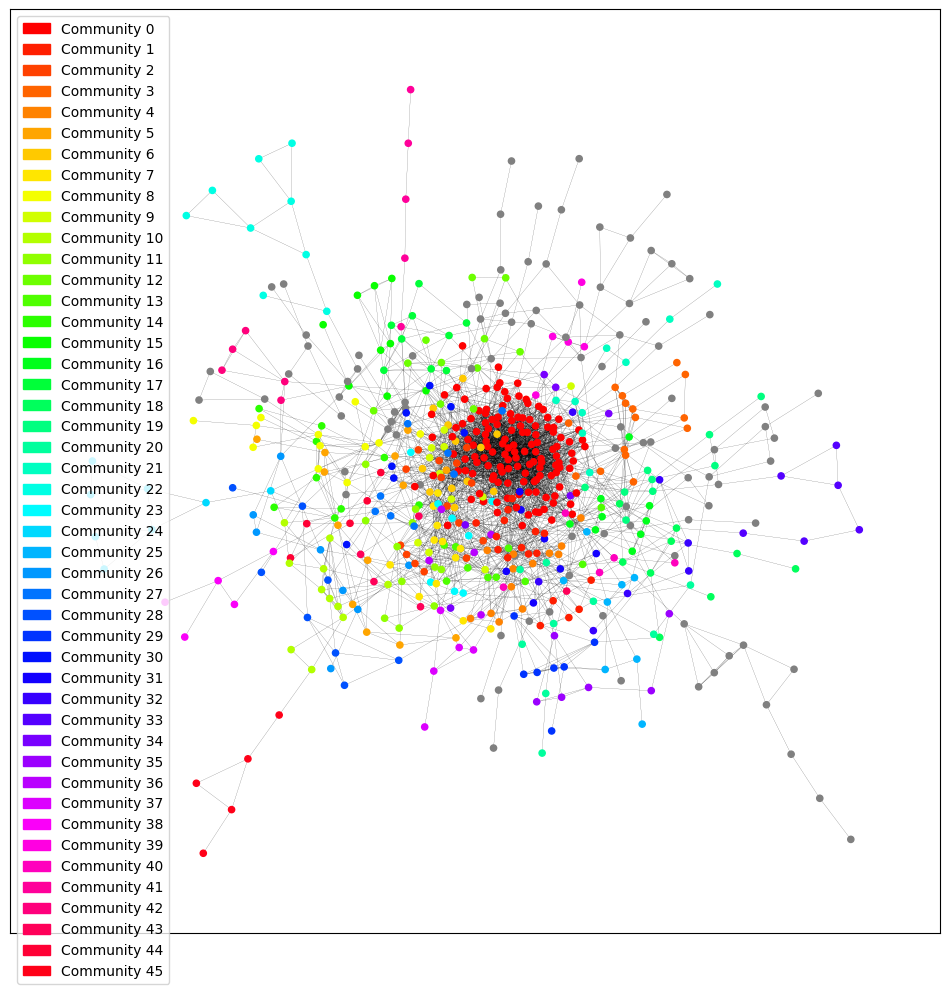

In [255]:
#get largest subgraph of G_active
largest_cc_active = max(nx.connected_components(G_active), key=len)
subgraph_active = G_active.subgraph(largest_cc_active)

#get largest subgraph of G_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def drawCommunities(G, communities):
    # Create a dictionary of community mappings
    community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}
    print(community_mapping)
    # Generate unique colors for each community
    colors = plt.cm.hsv(np.linspace(0, 1, len(communities)))
    community_colors = dict(zip(range(len(communities)), colors))

    # Create a list of node colors based on their community, if the are not in the list make it grey
    node_colors = [community_colors.get(community_mapping.get(node), 'grey') for node in G.nodes()]
    
    # Draw the graph
    pos = nx.kamada_kawai_layout(G, scale=2)  # Using Kamada-Kawai layout with increased scale
    plt.figure(figsize=(12,12))  # Increase figure size
    nx.draw_networkx(G, pos, with_labels=False, node_size=20, width=0.1, edge_color='black', node_color=node_colors)
    #add a legend for the communities
    # Create a legend
    patch_list = [patches.Patch(color=color, label=f'Community {community_id}') for community_id, color in community_colors.items()]
    plt.legend(handles=patch_list, loc='upper left')



    # Save as PNG
    plt.savefig('graphs/Network_graph_with_community_mapping.png')
    
    # Display the plot
    plt.show()

# Example usage, make sure detectCommunities function is defined and works correctly
communities=detectCommunities(subgraph_active, 'infomap')
print(f"communities: {communities}")
communities_simulated = detectCommunities(subgraph_simulated, 'infomap')

# #get subset where communities are saller than 25
# communities = [community for community in communities if len(community) < 25]
# communities_simulated = [community for community in communities_simulated if len(community) < 25]

drawCommunities(subgraph_active, communities)
drawCommunities(subgraph_simulated, communities_simulated)

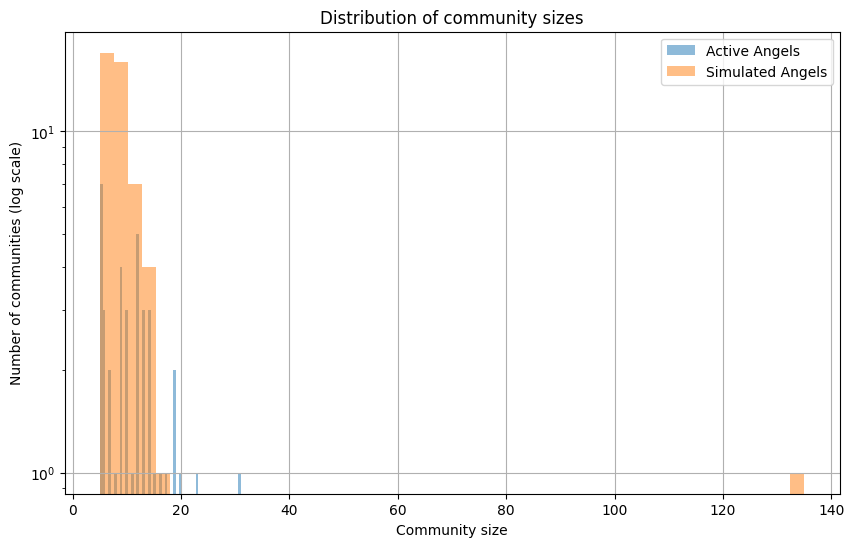

In [256]:
#plot the distribution of the how often a certain community size occurs
#count how often a certain community size occurs
community_sizes = [len(community) for community in communities]
community_sizes_simulated = [len(community) for community in communities_simulated]


# Plot the distribution of community sizes
plt.figure(figsize=(10, 6))
plt.hist(community_sizes, bins=50, log=True, alpha=0.5, label='Active Angels')
plt.hist(community_sizes_simulated, bins=50, log=True, alpha=0.5, label='Simulated Angels')
plt.title('Distribution of community sizes')
plt.xlabel('Community size')
plt.ylabel('Number of communities (log scale)')
plt.legend()
plt.grid(True)
# Save as PNG
plt.savefig('graphs/Distribution of community sizes.png')
plt.show()


In [257]:
#for each shareholder map into the df_angels_active the community they belong to
# Create a dictionary of community mappings
community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}

community_mapping_simulated = {node: community_id for community_id, community in enumerate(communities_simulated) for node in community}
# Map the community of each node to the df_angels_active DataFrame

df_angels_active['community'] = df_angels_active['shareholder_name'].map(community_mapping)
#fill nodes who are part of subgraph with -1 as they are not part of any community, fill everything thats still Nan with "not core network"
for node in subgraph_active.nodes():
    if node not in community_mapping:
        community_mapping[node] = -1
df_angels_active['community'] = df_angels_active['shareholder_name'].map(community_mapping)

df_angels_active['community'] = df_angels_active['community'].fillna(100).astype(int)
df_angels_active['community_simulated'] = df_angels_active['shareholder_name'].map(community_mapping_simulated)
df_angels_active['community_simulated'] = df_angels_active['community_simulated'].fillna(-1).astype(int)
df_angels_active

shareholder_name_old  shareholder_id  \
0                                    Jacobo Invest GmbH           768.0   
1                          CG Ventures GmbH Baiersbronn          1941.0   
2                         Charles Maxim Rolfe Songhurst          2792.0   
3          Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
4                                 Liberty Ventures GmbH          3959.0   
...                                                 ...             ...   
1301  Happy & Fresh Beratungs- und Beteiligungsgesel...          1847.0   
1302               Miyamax Beteiligungsgesellschaft mbH         20616.0   
1303                                        ALLUTI GmbH          9421.0   
1304                                 MM Investment GmbH          6459.0   
1305         F. Friede Ventures UG (haftungsbeschränkt)         11210.0   

                         created_at  number_of_investments shareholder_type  \
0     2024-03-10 17:37:19.751917+00                     15            angel   
1     2024-03-10 17:37:20.561047+00                     15            angel   
2     2024-03-10 17:37:20.561047+00                     14            angel   
3     2024-03-10 17:37:21.332579+00                     11            angel   
4     2024-03-10 17:37:21.332579+00                      8            angel   
...                             ...                    ...              ...   
1301  2024-03-10 17:37:20.561047+00                      2            angel   
1302  2024-03-10 17:37:30.929372+00                      2            angel   
1303  2024-03-10 17:37:24.528696+00                      2            angel   
1304  2024-03-10 17:37:22.963246+00                      2            angel   
1305  2024-03-10 17:37:25.834675+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
0       HRB 737155             Ulm            16.224912             109.0   
1       HRB 726408       Stuttgart             7.089747              95.0   
2              NaN             NaN             1.004879               NaN   
3       HRB 159992  Charlottenburg             0.468650             217.0   
4     HRB 158031 B  Charlottenburg            32.057400             217.0   
...            ...             ...                  ...               ...   
1301     HRB 39000         Dresden             8.500000             621.0   
1302    HRB 771450       Stuttgart            18.681650              95.0   
1303        210537    M\u00fcnchen             2.636859             136.0   
1304    HRB 216984  Charlottenburg            17.017700             217.0   
1305  HRB 151510 B  Charlottenburg             1.226000             217.0   

                                    shareholder_purpose  ... 2021  status  \
0     {"shareholder_purpose": "Halten von Beteiligun...  ...  0.0  active   
1     {"shareholder_purpose": "der Kauf, die dauernd...  ...  2.0  active   
2                                                   NaN  ...  1.0  active   
3     {"shareholder_purpose": "Das Halten und Verwal...  ...  2.0  active   
4     {"shareholder_purpose": "Der Erwerb, Halten, V...  ...  0.0  active   
...                                                 ...  ...  ...     ...   
1301  {"shareholder_purpose": "Halten und Verwalten ...  ...  2.0  active   
1302  {"shareholder_purpose": "Der Erwerb, das langf...  ...  0.0  active   
1303  {"shareholder_purpose": "Verwaltung eigenen Ve...  ...  0.0  active   
1304  {"shareholder_purpose": "Die Verwaltung eigene...  ...  2.0  active   
1305  {"shareholder_purpose": "Der Erwerb, die Verwa...  ...  1.0  active   

     country industry_HHI  region_HHI eigenvector_centrality  \
0         DE     0.671875    0.257812               0.000203   
1         AT     0.155556    0.404444               0.005056   
2         GB     0.173469    0.469388               0.000504   
3         US     0.125000    0.847222               0.003246   
4         AT   

In [258]:
import pandas as pd

# Definition der Funktion zur Berechnung des HHI
def gender_hhi(df):
    # Zählen der Vorkommen jedes Geschlechts
    gender_counts = df['gender'].value_counts()

    
    
    #get only male and female


    gender_counts = gender_counts.loc[gender_counts.index.isin(['male', 'female'])]

    # Quadrieren der gezählten Häufigkeiten
    squared_counts = gender_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

# Erstellen eines DataFrames mit einer Spalte 'gender'
df = pd.DataFrame({
    'gender': ['male', 'female', 'female', 'male', 'non-binary', 'female', 'male']
})

# Berechnen des HHI für den Beispiel-DataFrame
hhi = gender_hhi(df)
print(f'Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: {hhi}')

Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: 0.3673469387755102


In [259]:
#define function to calculate region HHI for communities
def region_hhi(df):
    
    # Zählen der Vorkommen jeder Region
    region_counts = df['region_mapping'].value_counts()
    #drop rows other
    region_counts = region_counts.drop('other', errors='ignore')
    # Quadrieren der gezählten Häufigkeiten
    squared_counts = region_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

In [260]:
def calculate_ei_index(num_males, num_females):
    # Calculate within-group ties for males and females
    ties_within_males = num_males * (num_males - 1) / 2
    ties_within_females = num_females * (num_females - 1) / 2

    # Calculate cross-group ties
    cross_group_ties = num_males * num_females

    # Total within-group ties
    total_within_group_ties = ties_within_males + ties_within_females

    # EI index calculation
    ei_index = (cross_group_ties - total_within_group_ties) / (cross_group_ties + total_within_group_ties)

    return ei_index

# Example usage:
num_males = 28
num_females = 2
ei_index = calculate_ei_index(num_males, num_females)

print(f"The EI index for a fully connected network with {num_males} males and {num_females} females is: {ei_index:.3f}")

The EI index for a fully connected network with 28 males and 2 females is: -0.743


In [261]:
# columns for community comparison
community_columns = ["community","number_of_members","average_age","sd_eigenvector_centrality","sd_degree_centrality","sd_total_participation","sd_number_of_investments","sd_age","sd_industry_hhi","sd_region_hhi","ei_index_gender","region_hhi_value","ei_index_dach","average_eigenvector_centrality",'average_number_of_investments']

In [262]:
# for each angel calculate degree centrality and add to df_angels_active
df_angels_active['degree_centrality'] = df_angels_active['shareholder_name'].map(nx.degree_centrality(G_active))
df_angels_active['degree_centrality_simulated'] = df_angels_active['shareholder_name'].map(nx.degree_centrality(G_simulated))

#fill degree centrality with 0 for where it is null
df_angels_active['degree_centrality'] = df_angels_active['degree_centrality'].fillna(0)
df_angels_active['degree_centrality_simulated'] = df_angels_active['degree_centrality_simulated'].fillna(0)


# for each angel calculate eigenvector centrality and add to df_angels_active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(G_active))
df_angels_active['eigenvector_centrality_simulated'] = ""
df_angels_active['eigenvector_centrality_simulated'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(G_simulated))

ei index for community 0 is -0.7505376344086021
                              shareholder_name_old  shareholder_id  \
30                               jvh-ventures GmbH         20274.0   
145                              OMA Ventures GmbH         19853.0   
193          Minec Holding UG (haftungsbeschränkt)          1999.0   
645   Pasame XingFu UG (haftungsbeschränkt) Berlin          5862.0   
819              Behantivo UG (haftungsbeschränkt)          4406.0   
1118                   Micha Hernandez van Leuffen         10181.0   

                         created_at  number_of_investments shareholder_type  \
30    2024-03-10 17:37:30.929372+00                      6            angel   
145   2024-03-10 17:37:30.209471+00                      4            angel   
193   2024-03-10 17:37:20.561047+00                      3            angel   
645   2024-03-10 17:37:22.160384+00                      2            angel   
819   2024-03-10 17:37:21.332579+00                      2        

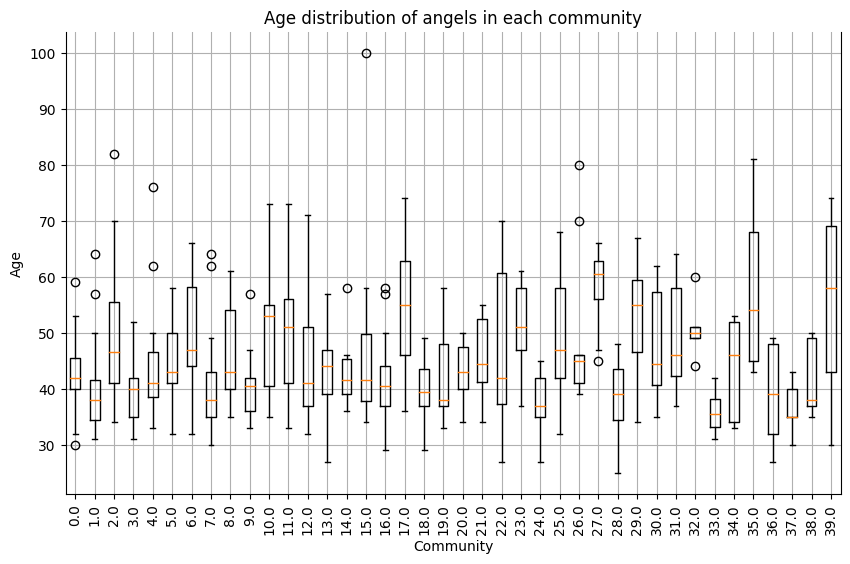

community  number_of_members  average_age  sd_eigenvector_centrality  \
0         0.0               31.0    42.387097               2.612652e-04   
1         1.0               23.0    39.913043               1.118442e-03   
2         2.0               20.0    50.000000               1.208589e-03   
3         3.0               19.0    39.421053               2.655970e-04   
4         4.0               19.0    44.000000               1.565330e-03   
5         5.0               17.0    44.941176               6.455274e-05   
6         6.0               16.0    50.187500               1.105247e-03   
7         7.0               15.0    41.400000               1.139163e-04   
8         8.0               14.0    46.071429               1.844165e-03   
9         9.0               14.0    40.714286               1.045310e-04   
10       10.0               14.0    51.357143               2.623073e-05   
11       11.0               13.0    51.307692               1.525129e-04   
12       12.0               13.0    45.461538               1.234408e-05   
13       13.0               13.0    43.923077               9.123151e-05   
14       14.0               12.0    43.000000               2.098822e-04   
15       15.0               12.0    48.000000               1.146957e-03   
16       16.0               12.0    42.250000               1.880991e-02   
17       17.0               12.0    55.250000               2.625525e-03   
18       18.0               12.0    39.750000               1.310415e-03   
19       19.0               11.0    42.454545               1.526143e-05   
20       20.0               10.0    43.300000               7.208711e-05   
21       21.0               10.0    45.400000               9.378244e-04   
22       22.0               10.0    47.900000               6.861900e-05   
23       23.0                9.0    50.777778               7.381117e-05   
24       24.0                9.0    37.888889               1.712802e-04   
25       25.0                9.0    50.000000               7.023527e-05   
26       26.0                9.0    50.000000               1.359230e-05   
27       27.0                8.0    58.125000               2.070718e-06   
28       28.0                7.0    38.285714               1.790631e-04   
29       29.0                7.0    52.571429               3.505483e-04   
30       30.0                6.0    47.833333               2.928264e-06   
31       31.0                6.0    49.333333               8.958469e-05   
32       32.0                6.0    50.800000               5.483321e-05   
33       33.0                5.0    36.000000               1.480914e-05   
34       34.0                5.0    43.600000               5.653621e-07   
35       35.0                5.0    58.200000               7.285338e-05   
36       36.0                5.0    39.000000               5.897663e-05   
37       37.0                5.0    36.600000               1.525291e-05   
38       38.0                5.0    41.800000               8.132532e-06   
39       39.0                5.0    54.800000               3.976277e-11   

    sd_degree_centrality  sd_total_participation  sd_number_of_investments  \
0               0.011505                7.899774                  1.824564   
1               0.009718                7.478348                  2.738252   
2               0.006168               11.672197                  1.050063   
3               0.009972                6.793463                  1.781976   
4               0.016678               17.272168                  2.323287   
5               0.006895                9.967474                  3.143621   
6               0.005325               10.020420                  0.718795   
7               0.004395                4.770619                  0.487950   
8               0.005669                5.047659                  0.646206   
9               0.004312                7.907328                  0.468807   
10              0.004383     

In [263]:
#build df_communities_active
df_communities_active = pd.DataFrame(columns=community_columns)
#drip rows with nan from commnities

#

# Loop through each community
for community_id, community in enumerate(communities):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    
    #Calculate SD of age
    sd_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].std()
    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].mean()
    sd_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].std()
   
    
    # Calculate the average eigenvector centrality of the community
    average_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].mean()
    sd_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].std()
    # Calculate the number of members in the community
    number_of_members = df_angels_active[df_angels_active['community'] == community_id].shape[0]
    temp= df_angels_active[df_angels_active['community'] == community_id]
    
    #calculate sd degree centrality
    sd_degree_centrality = df_angels_active[df_angels_active['community'] == community_id]['degree_centrality'].std()


    # Calculate the percentage of men
    if len(temp) > 0:
        female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(temp)
    else:
        female_ratio = 0
    #calculate ei index per community
    if(len(temp) > 0):
        
        ei_index = calculate_ei_index(len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')]),len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'male')]))
    else:
        ei_index = 1000
    
    print(f"ei index for community {community_id} is {ei_index}")
    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community'] == community_id]['industry_HHI'].std()
    
    #Calculate sd of region hhi
    sd_region_hhi = df_angels_active[df_angels_active['community'] == community_id]['region_HHI'].std()
    # Calculate female ratio
    # female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(community)
    # Add the community to the DataFrame
    region_hhi_value = region_hhi(temp)
    #get angels in this community where country is not in DE CH and AT
    non_dach = df_angels_active[(df_angels_active['community'] == community_id) & (~df_angels_active['country'].isin(['DE', 'CH', 'AT']))]
    print(non_dach)
    #calculate non-DACH ratios
    if len(temp) > 0:
        ei_index_dach = calculate_ei_index(len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['country'].isin(['DE', 'CH', 'AT']))]),len(df_angels_active[(df_angels_active['community'] == community_id) & (~df_angels_active['country'].isin(['DE', 'CH', 'AT']))]))
    else:
        ei_index_dach = 0
    #add to df_communities_active
    
    df_communities_active.loc[community_id] = [community_id, number_of_members, average_age,sd_eigenvector_centrality, sd_degree_centrality,sd_total_participation,sd_number_of_investments ,sd_age,sd_industry_hhi,sd_region_hhi,ei_index,region_hhi_value,ei_index_dach,average_eigenvector_centrality,average_number_of_investments]

    
df_communities_active

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_active['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_active['community'])
plt.title('Age distribution of angels in each community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community.png')
plt.show()

#calc average_sd_age
average_sd_age_active = df_communities_active['average_age'].mean()
#drop rows with nan
df_communities_active = df_communities_active.dropna(subset=['sd_eigenvector_centrality'])
df_communities_active

In [264]:
# #plot gender hhi
# plt.figure(figsize=(10, 6))
# plt.bar(df_communities_active['community'], df_communities_active['female_ratio'])
# plt.title('Female ratio in communities')
# plt.xlabel('Community')
# plt.ylabel
# plt.grid(True)
# plt.xticks(rotation=90)
# plt.gca().spines['top'].set_visible(False)
# plt.savefig
# plt.show()


In [265]:
#return subset of df_angels_active where community is 25
df_angels_active[df_angels_active['community'] == 25]

shareholder_name_old  shareholder_id  \
144   MGH Beratungs- und Beteiligungs- GmbH         15413.0   
162                        FS Ventures GmbH         20677.0   
406                        TS Ventures GmbH         19340.0   
445                      Hübner Invest GmbH         20346.0   
628                             Reidro GmbH          6786.0   
932                Benvaulter Ventures GmbH         20163.0   
972                 Gaia Beteiligungen GmbH         21262.0   
1136                      Wilfried Gillrath         11323.0   
1161                    Annegret Jatzkewitz         12642.0   

                         created_at  number_of_investments shareholder_type  \
144   2024-03-10 17:37:27.447081+00                      4            angel   
162   2024-03-10 17:37:30.929372+00                      2            angel   
406   2024-03-10 17:37:30.209471+00                      2            angel   
445   2024-03-10 17:37:30.929372+00                      4            angel   
628   2024-03-10 17:37:22.963246+00                      2            angel   
932   2024-03-10 17:37:30.929372+00                      2            angel   
972   2024-03-10 17:37:30.929372+00                      2            angel   
1136  2024-03-10 17:37:25.834675+00                      2            angel   
1161  2024-03-10 17:37:26.607323+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
144      HRB 23398       Wiesbaden             4.765425             335.0   
162     HRB 259312         München            22.716667             136.0   
406      HRB 73349            Köln             8.639700             568.0   
445   HRB 14475 PI       Pinneberg            24.466275             703.0   
628     HRB 123345  Charlottenburg            10.277200             217.0   
932     HRB 258587         München            30.325000             136.0   
972    HRB 30909 P         Potsdam            17.325000             252.0   
1136           NaN             NaN             3.033350               NaN   
1161           NaN             NaN             5.134000               NaN   

                                    shareholder_purpose  ... industry_HHI  \
144   {"shareholder_purpose": "Erbringung von Untern...  ...     0.375000   
162   {"shareholder_purpose": "Finanzielle und subst...  ...     0.333333   
406   {"shareholder_purpose": "der Erwerb und das Ha...  ...     0.500000   
445                                                 NaN  ...     0.250000   
628   {"shareholder_purpose": "Der Erwerb, das Halte...  ...     0.500000   
932   {"shareholder_purpose": "Finanzielle und subst...  ...     0.500000   
972   {"shareholder_purpose": "Der Erwerb, das Halte...  ...     0.500000   
1136                                                NaN  ...     0.500000   
1161                                                NaN  ...     0.500000   

     region_HHI eigenvector_centrality number_of_co_investments  \
144    1.000000           2.178955e-04                      8.0   
162    0.555556           4.602757e-07                      3.0   
406    1.000000           4.138701e-05                      8.0   
445    0.375000           1.117211e-05                      6.0   
628    0.500000           3.410738e-07                      1.0   
932    1.000000           4.602757e-07                      3.0   
972    1.000000           8.626476e-06                      2.0   
1136   0.500000           1.113705e-05                      4.0   
1161   0.500000           1.113705e-05                      4.0   

      number_of_simulated_investments community community_simulated  \
144                                 4        25                  25   
162                                 2        25                  11   
406                                 2        25                   0   
445                                 4        25                  23   
628                              

In [266]:
#descriptive stats on communities
#create df_community_descriptive
df_community_descriptive = pd.DataFrame(columns=["variable_name","value"])

number_of_communities = len(df_communities_active)
df_community_descriptive.loc[0] = ["number_of_communities", number_of_communities]
#add average number of members per community
#add average number of members per community
average_number_of_members = df_communities_active['number_of_members'].mean()
df_community_descriptive.loc[1] = ["average_number_of_members", average_number_of_members]

#add average age per community
average_age = df_communities_active['average_age'].mean()
df_community_descriptive.loc[2] = ["average_age", average_age]

#add average number of investments
average_number_of_investments = df_communities_active['average_number_of_investments'].mean()
df_community_descriptive.loc[3] = ["average_number_of_investments", average_number_of_investments]

#add max number of members
max_number_of_members = df_communities_active['number_of_members'].max()
df_community_descriptive.loc[4] = ["max_number_of_members", max_number_of_members]

#add min number of members
min_number_of_members = df_communities_active['number_of_members'].min()
df_community_descriptive.loc[5] = ["min_number_of_members", min_number_of_members]

# add median number od members
median_number_of_members = df_communities_active['number_of_members'].median()
df_community_descriptive.loc[6] = ["median_number_of_members", median_number_of_members]

#calculate sd of number of members
sd_number_of_members = df_communities_active['number_of_members'].std()
df_community_descriptive.loc[7] = ["sd_number_of_members", sd_number_of_members]

df_community_descriptive

variable_name      value
0          number_of_communities  40.000000
1      average_number_of_members  11.325000
2                    average_age  45.850126
3  average_number_of_investments   2.684523
4          max_number_of_members  31.000000
5          min_number_of_members   5.000000
6       median_number_of_members  10.500000
7           sd_number_of_members   5.676707

In [267]:
#create df_angels_active_simulated
#add_columns for each region_simulated berlin_simulated, munich_simulated, hamburg_simulated, franfurt_simulated, stuttgart_simulated, other_simulated, cologne_simulated, leipzig_simulated
df_angels_active['berlin_simulated'] = 0
df_angels_active['munich_simulated'] = 0
df_angels_active['hamburg_simulated'] = 0
df_angels_active['frankfurt_simulated'] = 0
df_angels_active['stuttgart_simulated'] = 0
df_angels_active['other_simulated'] = 0
df_angels_active['cologne_simulated'] = 0
df_angels_active['leipzig_simulated'] = 0



#count for every shareholder how many startups they are involved in per location
#create a df that counts the number of startups per shareholder per location
df_investment_rel_angel_startup_simulated['count'] = 1
df_shareholder_relations_pivot_simulated = df_investment_rel_angel_startup_simulated.pivot_table(index='angel', columns='region', values='count', aggfunc='sum')
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.fillna(0)
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.reset_index()
df_shareholder_relations_pivot_simulated

#now map the values from df_shareholder_relations_pivot_simulated to df_angels_active

for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    berlin_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['berlin']
    munich_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['munich']
    stuttgart_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['stuttgart']
    leipzig_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['leipzig']
    cologne_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['cologne']
    franfurt_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['frankfurt']
    hamburg_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['hamburg']
    other_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['other']
    # international = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['international']

    if len(berlin_simulated) > 0:
        df_angels_active.at[index, 'berlin_simulated'] = berlin_simulated.values[0]
    if len(munich_simulated) > 0:
        df_angels_active.at[index, 'munich_simulated'] = munich_simulated.values[0]
    if len(stuttgart_simulated) > 0:
        df_angels_active.at[index, 'stuttgart_simulated'] = stuttgart_simulated.values[0]
    if len(leipzig_simulated) > 0:
        df_angels_active.at[index, 'leipzig_simulated'] = leipzig_simulated.values[0]
    if len(cologne_simulated) > 0:
        df_angels_active.at[index, 'cologne_simulated'] = cologne_simulated.values[0]
    if len(franfurt_simulated) > 0:
        df_angels_active.at[index, 'frankfurt_simulated'] = franfurt_simulated.values[0]
    if len(hamburg_simulated) > 0:
        df_angels_active.at[index, 'hamburg_simulated'] = hamburg_simulated.values[0]
    if len(other_simulated) > 0:
        df_angels_active.at[index, 'other_simulated'] = other_simulated.values[0]
    # if len(international) > 0:
    #     df_angels_active.at[index, 'international'] = international.values[0]

df_angels_active


shareholder_name_old  shareholder_id  \
0                                    Jacobo Invest GmbH           768.0   
1                          CG Ventures GmbH Baiersbronn          1941.0   
2                         Charles Maxim Rolfe Songhurst          2792.0   
3          Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
4                                 Liberty Ventures GmbH          3959.0   
...                                                 ...             ...   
1301  Happy & Fresh Beratungs- und Beteiligungsgesel...          1847.0   
1302               Miyamax Beteiligungsgesellschaft mbH         20616.0   
1303                                        ALLUTI GmbH          9421.0   
1304                                 MM Investment GmbH          6459.0   
1305         F. Friede Ventures UG (haftungsbeschränkt)         11210.0   

                         created_at  number_of_investments shareholder_type  \
0     2024-03-10 17:37:19.751917+00                     15            angel   
1     2024-03-10 17:37:20.561047+00                     15            angel   
2     2024-03-10 17:37:20.561047+00                     14            angel   
3     2024-03-10 17:37:21.332579+00                     11            angel   
4     2024-03-10 17:37:21.332579+00                      8            angel   
...                             ...                    ...              ...   
1301  2024-03-10 17:37:20.561047+00                      2            angel   
1302  2024-03-10 17:37:30.929372+00                      2            angel   
1303  2024-03-10 17:37:24.528696+00                      2            angel   
1304  2024-03-10 17:37:22.963246+00                      2            angel   
1305  2024-03-10 17:37:25.834675+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
0       HRB 737155             Ulm            16.224912             109.0   
1       HRB 726408       Stuttgart             7.089747              95.0   
2              NaN             NaN             1.004879               NaN   
3       HRB 159992  Charlottenburg             0.468650             217.0   
4     HRB 158031 B  Charlottenburg            32.057400             217.0   
...            ...             ...                  ...               ...   
1301     HRB 39000         Dresden             8.500000             621.0   
1302    HRB 771450       Stuttgart            18.681650              95.0   
1303        210537    M\u00fcnchen             2.636859             136.0   
1304    HRB 216984  Charlottenburg            17.017700             217.0   
1305  HRB 151510 B  Charlottenburg             1.226000             217.0   

                                    shareholder_purpose  ...  \
0     {"shareholder_purpose": "Halten von Beteiligun...  ...   
1     {"shareholder_purpose": "der Kauf, die dauernd...  ...   
2                                                   NaN  ...   
3     {"shareholder_purpose": "Das Halten und Verwal...  ...   
4     {"shareholder_purpose": "Der Erwerb, Halten, V...  ...   
...                                                 ...  ...   
1301  {"shareholder_purpose": "Halten und Verwalten ...  ...   
1302  {"shareholder_purpose": "Der Erwerb, das langf...  ...   
1303  {"shareholder_purpose": "Verwaltung eigenen Ve...  ...   
1304  {"shareholder_purpose": "Die Verwaltung eigene...  ...   
1305  {"shareholder_purpose": "Der Erwerb, die Verwa...  ...   

     degree_centrality_simulated eigenvector_centrality_simulated  \
0                       0.072304                     1.307532e-01   
1                       0.102941                     2.033932e-01   
2                       0.069853                     1.311725e-01   
3                       0.072304                     1.498284e-01   
4                       0.019608                     4.519007e-03   
...                          ...                              ...   
1301    

In [268]:
# Updated list of industries with 'medicine' renamed to 'medicine_biotech'
english_industries = [
    'mobility', 'software', 'food', 'industry', 'staffing', 
    'energy', 'media', 'service', 'construction', 'hardware', 
    'blockchain_crypto', 'gaming', 'medicine_biotech', 'agriculture', 
    'real_estate', 'environmental_technology', 'sports', 'education', 
    'ecommerce', 'finance', 'tourism', 'advertising', 'logistics', 
    'legal_consulting', 'insurance'
]

# Initialize the new columns with 0, using the updated English names
for industry in english_industries:
    df_angels_active[industry] = 0

# Assuming df_shareholder_relations is already defined and has a similar structure
# as shown in your initial code.
# Creating a pivot table to count the startups per shareholder per industry
df_shareholder_relations_pivot = df_investment_rel_angel_startup_simulated.pivot_table(
    index='angel', 
    columns='startup_industry', 
    values='count', 
    aggfunc='sum'
).fillna(0).reset_index()

# Mapping the values from the pivot table to df_angels_active
for index, row in df_angels_active.iterrows():
    shareholder_name_mapped = row['shareholder_name']
    
    # Iterate through each industry to assign the corresponding values
    for industry in english_industries:
        industry_count = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == shareholder_name_mapped].get(industry)
        if industry_count is not None and len(industry_count) > 0:
            df_angels_active.at[index, industry] = industry_count.values[0]
           

# Display the updated df_angels_active DataFrame
df_angels_active

shareholder_name_old  shareholder_id  \
0                                    Jacobo Invest GmbH           768.0   
1                          CG Ventures GmbH Baiersbronn          1941.0   
2                         Charles Maxim Rolfe Songhurst          2792.0   
3          Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
4                                 Liberty Ventures GmbH          3959.0   
...                                                 ...             ...   
1301  Happy & Fresh Beratungs- und Beteiligungsgesel...          1847.0   
1302               Miyamax Beteiligungsgesellschaft mbH         20616.0   
1303                                        ALLUTI GmbH          9421.0   
1304                                 MM Investment GmbH          6459.0   
1305         F. Friede Ventures UG (haftungsbeschränkt)         11210.0   

                         created_at  number_of_investments shareholder_type  \
0     2024-03-10 17:37:19.751917+00                     15            angel   
1     2024-03-10 17:37:20.561047+00                     15            angel   
2     2024-03-10 17:37:20.561047+00                     14            angel   
3     2024-03-10 17:37:21.332579+00                     11            angel   
4     2024-03-10 17:37:21.332579+00                      8            angel   
...                             ...                    ...              ...   
1301  2024-03-10 17:37:20.561047+00                      2            angel   
1302  2024-03-10 17:37:30.929372+00                      2            angel   
1303  2024-03-10 17:37:24.528696+00                      2            angel   
1304  2024-03-10 17:37:22.963246+00                      2            angel   
1305  2024-03-10 17:37:25.834675+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
0       HRB 737155             Ulm            16.224912             109.0   
1       HRB 726408       Stuttgart             7.089747              95.0   
2              NaN             NaN             1.004879               NaN   
3       HRB 159992  Charlottenburg             0.468650             217.0   
4     HRB 158031 B  Charlottenburg            32.057400             217.0   
...            ...             ...                  ...               ...   
1301     HRB 39000         Dresden             8.500000             621.0   
1302    HRB 771450       Stuttgart            18.681650              95.0   
1303        210537    M\u00fcnchen             2.636859             136.0   
1304    HRB 216984  Charlottenburg            17.017700             217.0   
1305  HRB 151510 B  Charlottenburg             1.226000             217.0   

                                    shareholder_purpose  ...  \
0     {"shareholder_purpose": "Halten von Beteiligun...  ...   
1     {"shareholder_purpose": "der Kauf, die dauernd...  ...   
2                                                   NaN  ...   
3     {"shareholder_purpose": "Das Halten und Verwal...  ...   
4     {"shareholder_purpose": "Der Erwerb, Halten, V...  ...   
...                                                 ...  ...   
1301  {"shareholder_purpose": "Halten und Verwalten ...  ...   
1302  {"shareholder_purpose": "Der Erwerb, das langf...  ...   
1303  {"shareholder_purpose": "Verwaltung eigenen Ve...  ...   
1304  {"shareholder_purpose": "Die Verwaltung eigene...  ...   
1305  {"shareholder_purpose": "Der Erwerb, die Verwa...  ...   

     degree_centrality_simulated eigenvector_centrality_simulated  \
0                       0.072304                     1.307532e-01   
1                       0.102941                     2.033932e-01   
2                       0.069853                     1.311725e-01   
3                       0.072304                     1.498284e-01   
4                       0.019608                     4.519007e-03   
...                          ...                              ...   
1301    

In [269]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi

#calculate the industry_HHI for each angel based on the industry columns production_trade,technology_digital_services,energy_environment_infrastructure,healthcare,services_consulting
df_angels_active['industry_HHI_simulated'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)

#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI_simulated'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


shareholder_name_old  shareholder_id  \
0                                    Jacobo Invest GmbH           768.0   
1                          CG Ventures GmbH Baiersbronn          1941.0   
2                         Charles Maxim Rolfe Songhurst          2792.0   
3          Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
4                                 Liberty Ventures GmbH          3959.0   
...                                                 ...             ...   
1301  Happy & Fresh Beratungs- und Beteiligungsgesel...          1847.0   
1302               Miyamax Beteiligungsgesellschaft mbH         20616.0   
1303                                        ALLUTI GmbH          9421.0   
1304                                 MM Investment GmbH          6459.0   
1305         F. Friede Ventures UG (haftungsbeschränkt)         11210.0   

                         created_at  number_of_investments shareholder_type  \
0     2024-03-10 17:37:19.751917+00                     15            angel   
1     2024-03-10 17:37:20.561047+00                     15            angel   
2     2024-03-10 17:37:20.561047+00                     14            angel   
3     2024-03-10 17:37:21.332579+00                     11            angel   
4     2024-03-10 17:37:21.332579+00                      8            angel   
...                             ...                    ...              ...   
1301  2024-03-10 17:37:20.561047+00                      2            angel   
1302  2024-03-10 17:37:30.929372+00                      2            angel   
1303  2024-03-10 17:37:24.528696+00                      2            angel   
1304  2024-03-10 17:37:22.963246+00                      2            angel   
1305  2024-03-10 17:37:25.834675+00                      2            angel   

       register_id  register_court  total_participation  register_mapping  \
0       HRB 737155             Ulm            16.224912             109.0   
1       HRB 726408       Stuttgart             7.089747              95.0   
2              NaN             NaN             1.004879               NaN   
3       HRB 159992  Charlottenburg             0.468650             217.0   
4     HRB 158031 B  Charlottenburg            32.057400             217.0   
...            ...             ...                  ...               ...   
1301     HRB 39000         Dresden             8.500000             621.0   
1302    HRB 771450       Stuttgart            18.681650              95.0   
1303        210537    M\u00fcnchen             2.636859             136.0   
1304    HRB 216984  Charlottenburg            17.017700             217.0   
1305  HRB 151510 B  Charlottenburg             1.226000             217.0   

                                    shareholder_purpose  ... berlin_simulated  \
0     {"shareholder_purpose": "Halten von Beteiligun...  ...                0   
1     {"shareholder_purpose": "der Kauf, die dauernd...  ...                0   
2                                                   NaN  ...                0   
3     {"shareholder_purpose": "Das Halten und Verwal...  ...               11   
4     {"shareholder_purpose": "Der Erwerb, Halten, V...  ...                8   
...                                                 ...  ...              ...   
1301  {"shareholder_purpose": "Halten und Verwalten ...  ...                0   
1302  {"shareholder_purpose": "Der Erwerb, das langf...  ...                0   
1303  {"shareholder_purpose": "Verwaltung eigenen Ve...  ...                0   
1304  {"shareholder_purpose": "Die Verwaltung eigene...  ...                2   
1305  {"shareholder_purpose": "Der Erwerb, die Verwa...  ...                2   

     munich_simulated hamburg_simulated frankfurt_simulated  \
0                   0                 0                   0   
1                   0                 0                   0   
2                   0                 0                   0   
3                   0              

In [270]:
# #calculate eigenvector centrality for each angel in simulated graph
# # Create a dictionary of eigenvector centralities
eigenvector_centrality = nx.eigenvector_centrality(G_active)

# # Map the eigenvector centralities to the df_angels_active DataFrame
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)

# #fill NaN values with 0
# df_angels_active = df_angels_active.fillna(0)
# df_angels_active

                                   shareholder_name_old  shareholder_id  \
2                         Charles Maxim Rolfe Songhurst          2792.0   
3          Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
15                                 Eyser GmbH Stuttgart         19572.0   
20                               JALE Beteiligungs GmbH          3082.0   
30                                    jvh-ventures GmbH         20274.0   
44                                      JG Holding GmbH         10424.0   
53                                     BAK Venture GmbH         20155.0   
92              Jonnielias Beteiligungsgesellschaft mbH         20010.0   
98                        SI Development & Service GmbH         19278.0   
137                                 Hunaja Capital GmbH          3194.0   
145                                   OMA Ventures GmbH         19853.0   
180      Auspicium Beteiligungs UG (haftungsbeschränkt)         12406.0   
202            BS Beteili

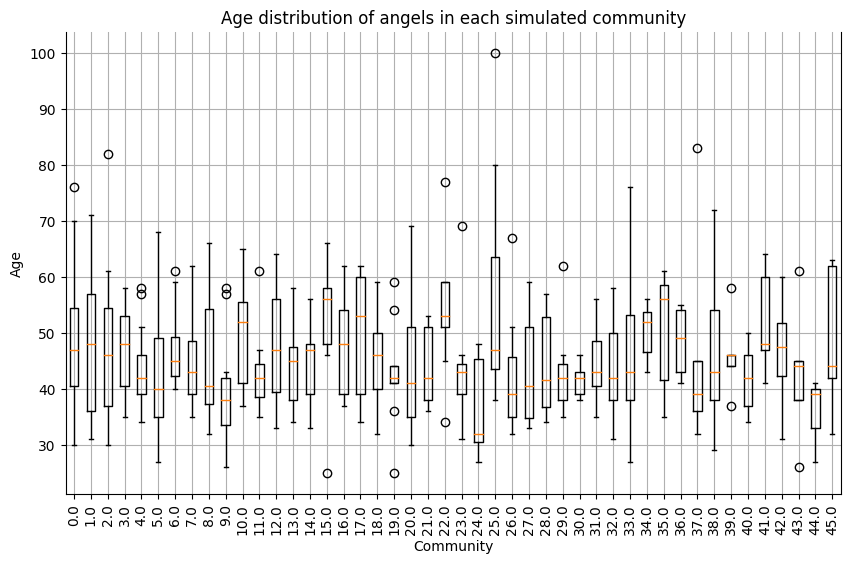

community  number_of_members  average_age  sd_eigenvector_centrality  \
0         0.0              135.0    47.696296               4.482907e-02   
1         1.0               17.0    47.470588               1.707142e-02   
2         2.0               15.0    47.333333               1.179946e-02   
3         3.0               15.0    47.133333               1.326583e-02   
4         4.0               13.0    43.692308               1.873916e-03   
5         5.0               13.0    42.769231               6.298850e-03   
6         6.0               12.0    46.916667               2.167307e-02   
7         7.0               12.0    44.666667               4.749203e-03   
8         8.0               12.0    44.750000               3.602210e-03   
9         9.0               11.0    39.181818               1.541470e-02   
10       10.0               11.0    49.454545               6.942948e-05   
11       11.0               11.0    42.909091               1.515830e-03   
12       12.0               11.0    47.818182               7.595990e-03   
13       13.0               10.0    43.700000               1.514073e-03   
14       14.0                9.0    44.333333               3.789924e-03   
15       15.0                9.0    51.888889               1.690933e-03   
16       16.0                9.0    47.777778               2.321034e-03   
17       17.0                9.0    50.555556               7.508493e-04   
18       18.0                9.0    46.333333               1.014168e-03   
19       19.0                9.0    42.777778               1.215498e-02   
20       20.0                9.0    44.555556               1.104913e-03   
21       21.0                9.0    43.555556               4.831516e-03   
22       22.0                9.0    53.777778               2.562838e-06   
23       23.0                8.0    44.000000               1.075215e-02   
24       24.0                8.0    36.250000               8.362234e-06   
25       25.0                8.0    57.000000               3.172829e-03   
26       26.0                8.0    42.750000               2.035800e-04   
27       27.0                8.0    43.000000               1.217123e-02   
28       28.0                8.0    44.250000               3.105525e-05   
29       29.0                7.0    43.428571               8.364998e-05   
30       30.0                7.0    41.428571               1.114546e-02   
31       31.0                7.0    44.571429               1.208229e-02   
32       32.0                7.0    43.857143               3.038084e-03   
33       33.0                6.0    47.000000               1.474380e-06   
34       34.0                6.0    50.333333               2.973187e-03   
35       35.0                6.0    50.666667               3.344540e-05   
36       36.0                5.0    48.400000               6.129644e-03   
37       37.0                5.0    47.000000               1.213927e-04   
38       38.0                5.0    47.200000               5.577975e-06   
39       39.0                5.0    46.200000               7.925061e-03   
40       40.0                5.0    41.800000               1.622078e-02   
41       41.0                5.0    52.000000               6.897986e-05   
42       42.0                5.0    46.500000               3.846709e-06   
43       43.0                5.0    42.800000               2.959649e-03   
44       44.0                5.0    36.000000               7.625553e-04   
45       45.0                5.0    48.600000               5.028358e-09   

    sd_degree_centrality  sd_total_participation  sd_number_of_investments  \
0               0.017904               12.291250                  2.429595   
1               0.011990                6.145421                  1.166316   
2               0.006961               16.127255                  0.833809   
3               0.006704               10.263065                  0.632456   
4               0.004395               20

In [271]:
#build df_communities_simulated
df_communities_simulated = pd.DataFrame(columns=community_columns)
# Loop through each community
for community_id, community in enumerate(communities_simulated):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    sd_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].std()

    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].mean()

    sd_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].std()

    #Calculate average eigenvector centrality
    average_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality_simulated'] != 0)]['eigenvector_centrality_simulated'].mean()
    sd_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality_simulated'] != 0)]['eigenvector_centrality_simulated'].std()

    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['industry_HHI'].std()

    #calculate regio hhi
    sd_region_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['region_HHI'].std()
    temp= df_angels_active[df_angels_active['community_simulated'] == community_id]
    
    if len(temp) > 0:
        female_ratio = len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] == 'female')])/len(temp)
    else:
        female_ratio = 0
    
    #calculate sd degree centrality
    sd_degree_centrality = df_angels_active[df_angels_active['community_simulated'] == community_id]['degree_centrality_simulated'].std()

    
    #get angels in this community where country is not in DE CH and AT
    non_dach = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (~df_angels_active['country'].isin(['DE', 'CH', 'AT']))]
    print(non_dach)
    #calculate non-DACH ratios
    non_dach_ratio = len(non_dach)/len(temp)
    #add to df_communities_active
    
    if(len(temp) > 0):
        ei_index_gender = calculate_ei_index(len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] == 'female')]),len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] == 'male')]))
    else:
        ei_index_gender = 1000
    if len(temp) > 0:
        ei_index_dach = calculate_ei_index(len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['country'].isin(['DE', 'CH', 'AT']))]),len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (~df_angels_active['country'].isin(['DE', 'CH', 'AT']))]))
    else:
        ei_index_dach = 1000

    #Calculate region hhi
    region_hhi_value = region_hhi(temp)
    # Calculate the female_ratio of the community
    # female_ratio = len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] =='female')])/len(community)

    # Calculate the number of members in the community
    number_of_members = len(community)
    # Add the community to the DataFrame
    df_communities_simulated.loc[community_id] = [community_id, number_of_members, average_age,sd_eigenvector_centrality, sd_degree_centrality,sd_total_participation,sd_number_of_investments ,sd_age,sd_industry_hhi,sd_region_hhi,ei_index_gender,region_hhi_value,ei_index_dach,average_eigenvector_centrality,average_number_of_investments]

df_communities_simulated

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community_simulated'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_simulated['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_simulated['community'])
plt.title('Age distribution of angels in each simulated community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community_simulated.png')
plt.show()

df_communities_simulated


In [272]:
len(df_angels_active[(df_angels_active['community_simulated'] == 8) & (df_angels_active['gender'] == 'male')])
calculate_ei_index(5,1)

-0.3333333333333333

In [273]:
# #plot the female ratio of each community
# plt.figure(figsize=(10, 6))
# plt.bar(df_communities_simulated['community'], df_communities_simulated['female_ratio'])
# plt.title('female ratio simulated')
# plt.xlabel('Community')
# plt.ylabel
# plt.grid(True)
# plt.xticks(rotation=90)
# plt.gca().spines['top'].set_visible(False)
# plt.savefig
# plt.show()


In [274]:
#descriptive stats on communities
#create df_community_descriptive_simulated
df_community_descriptive_simulated = pd.DataFrame(columns=["variable_name","value"])

#add number of communities 
number_of_communities = len(df_communities_simulated)
df_community_descriptive_simulated.loc[0] = ["number_of_communities", number_of_communities]
#add average number of members per community
average_number_of_members = df_communities_simulated['number_of_members'].mean()
df_community_descriptive_simulated.loc[1] = ["average_number_of_members", average_number_of_members]

#add average age per community
average_age = df_communities_simulated['average_age'].mean()
df_community_descriptive_simulated.loc[2] = ["average_age", average_age]

#add average number of investments
average_number_of_investments = df_communities_simulated['average_number_of_investments'].mean()
df_community_descriptive_simulated.loc[3] = ["average_number_of_investments", average_number_of_investments]
#add max number of members
max_number_of_members = df_communities_simulated['number_of_members'].max()
df_community_descriptive_simulated.loc[4] = ["max_number_of_members", max_number_of_members]

#add min number of members
min_number_of_members = df_communities_simulated['number_of_members'].min()
df_community_descriptive_simulated.loc[5] = ["min_number_of_members", min_number_of_members]

# add median number od members
median_number_of_members = df_communities_simulated['number_of_members'].median()
df_community_descriptive_simulated.loc[6] = ["median_number_of_members", median_number_of_members]

df_community_descriptive_simulated

variable_name       value
0          number_of_communities   46.000000
1      average_number_of_members   11.369565
2                    average_age   45.784420
3  average_number_of_investments    2.484391
4          max_number_of_members  135.000000
5          min_number_of_members    5.000000
6       median_number_of_members    8.500000

In [275]:

#add df_community_descriptive_simulated as a column to df_community_descriptive
df_community_descriptive['value_simulated'] = df_community_descriptive_simulated['value']
df_community_descriptive



variable_name      value  value_simulated
0          number_of_communities  40.000000        46.000000
1      average_number_of_members  11.325000        11.369565
2                    average_age  45.850126        45.784420
3  average_number_of_investments   2.684523         2.484391
4          max_number_of_members  31.000000       135.000000
5          min_number_of_members   5.000000         5.000000
6       median_number_of_members  10.500000         8.500000
7           sd_number_of_members   5.676707              NaN

In [276]:
#make all values numeric
df_communities_active = df_communities_active.apply(pd.to_numeric, errors='ignore')
df_communities_simulated = df_communities_simulated.apply(pd.to_numeric, errors='ignore')


In [277]:
import pandas as pd
import scipy.stats as stats

# Calculate standard deviation of 'average_age' for active and simulated communities
average_sd_age_active = df_communities_active['average_age'].std()
average_sd_age_simulated = df_communities_simulated['average_age'].std()

# Create DataFrame for comparison of communities, including mean and sd
df_community_comparison = pd.DataFrame(columns=["variable", "t_stat", "p_value", "mean_simulated", "mean_active", "sd_simulated", "sd_active"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable,simulated_data, active_data):
    t_stat, p_value = stats.ttest_ind(active_data, simulated_data, equal_var=False)
    p_value_one_side = p_value / 2
    mean_active = active_data.mean()
    mean_simulated = simulated_data.mean()
    sd_active = active_data.std()
    sd_simulated = simulated_data.std()
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,mean_simulated, mean_active,  sd_simulated,sd_active]

# Perform t-tests on each variable and add to df_community_comparison
add_comparison_row(df_community_comparison, "sd_eigenvector_centrality",  df_communities_simulated['sd_eigenvector_centrality'],df_communities_active['sd_eigenvector_centrality'])

add_comparison_row(df_community_comparison, "sd_degree_centrality", df_communities_active['sd_degree_centrality'], df_communities_simulated['sd_degree_centrality'])

# add_comparison_row(df_community_comparison, "average_number_of_investments", df_communities_active['average_number_of_investments'], df_communities_simulated['average_number_of_investments'])
# add_comparison_row(df_community_comparison, "average_eigenvector_centrality", df_communities_active['average_eigenvector_centrality'], df_communities_simulated['average_eigenvector_centrality'])
add_comparison_row(df_community_comparison, "sd_number_of_investments", df_communities_simulated['sd_number_of_investments'],df_communities_active['sd_number_of_investments'] )
add_comparison_row(df_community_comparison, "sd_total_participation",df_communities_simulated['sd_total_participation'], df_communities_active['sd_total_participation'])

add_comparison_row(df_community_comparison, "sd_industry_hhi",df_communities_simulated['sd_industry_hhi'], df_communities_active['sd_industry_hhi'])

#add comparison for region hhi
add_comparison_row(df_community_comparison, "sd_region_hhi",df_communities_simulated['sd_region_hhi'], df_communities_active['sd_region_hhi'])
# # Assuming 'sd_age' columns exist in your DataFrames
# add_comparison_row(df_community_comparison, "sd_age", df_communities_active['sd_age'], df_communities_simulated['sd_age'])

# #add coparison for region_hhi value
# add_comparison_row(df_community_comparison, "region_hhi_value",df_communities_simulated['region_hhi_value'], df_communities_active['region_hhi_value'])

# add_comparison_row(df_community_comparison, "gender_hhi",df_communities_simulated['gender_hhi'], df_communities_active["gender_hhi"])
# # Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated


add_comparison_row(df_community_comparison, "sd_age", df_communities_simulated['sd_age'], df_communities_active['sd_age'])
# t_stat, p_value_two_tail = stats.ttest_ind(df_communities_active['female_ratio'], df_communities_simulated['female_ratio'], equal_var=False)
# p_value_one_tail = p_value_two_tail / 2
# print(f"One-tailed p-value for female_ratio: {p_value_one_tail}")

# Add the two-tailed test result for 'female_ratio' to the comparison DataFrame
# add_comparison_row(df_community_comparison, "female_ratio", df_communities_active['female_ratio'], df_communities_simulated['female_ratio'])


df_community_comparison
# #perform t-test
# from scipy.stats import ttest_ind
# t_stat, p_value = ttest_ind(df_communities_active['sd_age'], df_communities_simulated['sd_age'])
# print(t_stat, p_value)
# # average_eigenvector_centrality_active = df_communities_active['average_eigenvector_centrality'].std()
# # print(average_eigenvector_centrality_active)

# # average_eigenvector_centrality_simulated = df_communities_simulated['average_eigenvector_centrality'].std()
# # print(average_eigenvector_centrality_simulated)
# #calculate t test between averages average_sd_age_active
# # and average_sd_age_simulated
# # from scipy.stats import ttest_ind
# # t_stat, p_value = ttest_ind(average_eigenvector_centrality_active, average_eigenvector_centrality_simulated, equal_var=False)
# # print(t_stat, p_value)

variable    t_stat   p_value  mean_simulated  mean_active  \
0  sd_eigenvector_centrality -3.843830  0.000151        0.005844     0.000858   
1       sd_degree_centrality -0.892528  0.187475        0.005421     0.004693   
2   sd_number_of_investments  3.090232  0.001568        0.681524     1.150738   
3     sd_total_participation -3.314947  0.000677       11.761395     8.576758   
4            sd_industry_hhi  1.003796  0.159346        0.172105     0.189138   
5              sd_region_hhi -1.599798  0.057062        0.243821     0.226787   
6                     sd_age -0.739969  0.230703       10.176612     9.597835   

   sd_simulated  sd_active  
0      0.008199   0.002976  
1      0.004102   0.003350  
2      0.428562   0.873201  
3      4.715649   4.192876  
4      0.069647   0.085436  
5      0.040603   0.055687  
6      3.679048   3.563881

In [278]:
# Create DataFrame for comparison of communities, including mean and sd
df_community_comparison_mean_vals = pd.DataFrame(columns=["variable", "t_stat", "p_value", "mean_active", "mean_simulated", "sd_active", "sd_simulated"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable,simulated_data, active_data):
    t_stat, p_value = stats.ttest_ind(active_data, simulated_data, equal_var=False)
    p_value_one_side = p_value / 2
    mean_active = active_data.mean()
    mean_simulated = simulated_data.mean()
    sd_active = active_data.std()
    sd_simulated = simulated_data.std()
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,mean_simulated, mean_active,  sd_simulated,sd_active]


#add coparison for region_hhi value
add_comparison_row(df_community_comparison_mean_vals, "region_hhi_value",df_communities_active['region_hhi_value'], df_communities_simulated['region_hhi_value'])


df_community_comparison_mean_vals_female_ratio = pd.DataFrame(columns=["variable", "t_stat", "p_value","mean_simulated", "mean_active", "sd_active", "sd_simulated"])
add_comparison_row(df_community_comparison_mean_vals_female_ratio, "ei_index_gender", df_communities_simulated['ei_index_gender'],df_communities_active["ei_index_gender"])
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated

df_community_comparison_mean_vals



variable    t_stat   p_value  mean_active  mean_simulated  \
0  region_hhi_value -2.114996  0.018836     0.365322        0.281673   

   sd_active  sd_simulated  
0   0.196403       0.16612

In [279]:
df_community_comparison_mean_vals_female_ratio = pd.DataFrame(columns=["variable", "t_stat", "p_value","mean_simulated", "mean_active", "sd_active", "sd_simulated"])
add_comparison_row(df_community_comparison_mean_vals_female_ratio, "ei_index_gender", df_communities_simulated['ei_index_gender'],df_communities_active["ei_index_gender"])
# Perform a one-tailed t-test for 'ei_index_gender' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated

#perforem one-tailed t-test for non_dach_ratio
add_comparison_row(df_community_comparison_mean_vals_female_ratio, "ei_index_dach", df_communities_simulated['ei_index_dach'],df_communities_active["ei_index_dach"])
df_community_comparison_mean_vals_female_ratio

variable    t_stat   p_value  mean_simulated  mean_active  \
0  ei_index_gender  0.805339  0.211467       -0.739892    -0.682127   
1    ei_index_dach  1.131853  0.130491       -0.351248    -0.274603   

   sd_active  sd_simulated  
0   0.334315      0.329563  
1   0.357792      0.268518

In [280]:
# Check if 'startup_name' is unique in df_startups
if df_startups['startup_name'].is_unique:
    # Use 'startup_name' as the index for mapping
    mapping_series = df_startups.set_index('startup_name')['changed_shareholder_structure']
    df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['startup_name'].map(mapping_series)
else:
    print("Error: 'startup_name' is not unique in df_startups.")
    # Handle the non-unique 'startup_name' here, maybe by aggregating or cleaning up

# Print the result
df_investment_rel_angel_startup

#If yes then 1 else 0
df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['changed_shareholder_structure'].apply(lambda x: 1 if x == 'yes' else 0)
#Replace all spaces in shareholder name mapped with _
df_investment_rel_angel_startup['shareholder_name_mapped'] = df_investment_rel_angel_startup['shareholder_name_mapped'].str.replace(' ', '_')

In [281]:
#add a column survival_rate to df_angels_active
df_angels_active['survival_rate'] = 0
# Calculate the survival rate for each angel
for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    # Calculate the survival rate for the angel
    survival_rate = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == angel]['changed_shareholder_structure'].mean()
    
    # Add the survival rate to the DataFrame
    df_angels_active.at[index, 'survival_rate'] = survival_rate



In [282]:
#for each community calculate the average survival rate
# Create a DataFrame to store the average survival rate for each community
df_survival_rate = pd.DataFrame(columns=["community", "average_survival_rate","members"])
#get unique community value sin df_angels_active["community"]
communities = df_angels_active['community'].unique()
# Loop through each community
for community in communities:
    # Calculate the average survival rate of the community
    average_survival_rate = df_angels_active[df_angels_active['community'] == community]['survival_rate'].mean()
    # Add the community to the DataFrame

    members= len(df_angels_active[df_angels_active['community'] == community])
    df_survival_rate.loc[community] = [community, average_survival_rate,members]
#sort ascending by community
df_survival_rate = df_survival_rate.sort_values(by='community', ascending=True)
df_survival_rate

community  average_survival_rate  members
-1         -1.0               0.701271    163.0
 0          0.0               0.789580     31.0
 1          1.0               0.695652     23.0
 2          2.0               0.728333     20.0
 3          3.0               1.000000     19.0
 4          4.0               0.479859     19.0
 5          5.0               0.819608     17.0
 6          6.0               0.947917     16.0
 7          7.0               0.900000     15.0
 8          8.0               0.815476     14.0
 9          9.0               0.916667     14.0
 10        10.0               0.757143     14.0
 11        11.0               0.582051     13.0
 12        12.0               0.538462     13.0
 13        13.0               0.484615     13.0
 14        14.0               0.891204     12.0
 15        15.0               0.825000     12.0
 16        16.0               0.861111     12.0
 17        17.0               0.983333     12.0
 18        18.0               0.726389     12.0
 19        19.0               0.833333     11.0
 20        20.0               0.900000     10.0
 21        21.0               0.616667     10.0
 22        22.0               0.741667     10.0
 23        23.0               0.907407      9.0
 24        24.0               0.728704      9.0
 25        25.0               0.666667      9.0
 26        26.0               0.666667      9.0
 27        27.0               0.750000      8.0
 28        28.0               0.775510      7.0
 29        29.0               0.666667      7.0
 30        30.0               0.597222      6.0
 31        31.0               0.777778      6.0
 32        32.0               0.944444      6.0
 33        33.0               1.000000      5.0
 34        34.0               0.720000      5.0
 35        35.0               0.466667      5.0
 36        36.0               0.633333      5.0
 37        37.0               0.466667      5.0
 38        38.0               0.800000      5.0
 39        39.0               0.566667      5.0
 100      100.0               0.484645    343.0

In [283]:
#ttest for survival rate between community -1 and all others
# Perform a t-test between community -1 and all other communities
community_minus_one = df_angels_active[df_angels_active['community'] == -1]['survival_rate']
other_communities = df_angels_active[(df_angels_active['community'] != -1)&(df_angels_active['community'] != 100)]['survival_rate']
t_stat, p_value = stats.ttest_ind(community_minus_one, other_communities, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -2.2718046046871545, p-value: 0.023882304973149485


In [284]:
#map column community into df_investment_rel_angel_startup
df_investment_rel_angel_startup['community'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels_active.set_index('shareholder_name')['community'])

#create a df with columns shareholder_name_mapped, shareholder_type, changed_shareholder_structure, funding_round_type
df_investment_rel_angel_startup_ancova = df_investment_rel_angel_startup[['shareholder_name_mapped', 'shareholder_type', 'changed_shareholder_structure','startup_name', 'funding_round_type','community']]

df_investment_rel_angel_startup_ancova




shareholder_name_mapped shareholder_type  \
3                                     Simon_Vogt            angel   
4                                       Helen_Oy            angel   
37                                Frederik_Dietz            angel   
39                  5DMG_UG_(haftungsbeschränkt)            angel   
57                      AREO_B_Beteiligungs_GmbH            angel   
...                                          ...              ...   
27715                          Next_Big_Thing_AG            angel   
27757                           FRESH_Media_GmbH            angel   
27765                        Spree_Eternity_GmbH            angel   
27766                            phm_equity_GmbH            angel   
27769  Campione_Ventures_UG_(haftungsbeschränkt)            angel   

       changed_shareholder_structure       startup_name funding_round_type  \
3                                  0       &Charge GmbH                NaN   
4                                  0       &Charge GmbH                NaN   
37                                 1     101skills GmbH                NaN   
39                                 0    10er Karte GmbH                NaN   
57                                 1  1648 Factory GmbH                NaN   
...                              ...                ...                ...   
27715                              0  ZERO defects GmbH                NaN   
27757                              1         Zwopr GmbH                NaN   
27765                              1       ZYP.ONE GmbH                NaN   
27766                              1       ZYP.ONE GmbH                NaN   
27769                              1       ZYP.ONE GmbH                NaN   

       community  
3            100  
4            100  
37           100  
39           100  
57            -1  
...          ...  
27715        100  
27757        100  
27765          4  
27766          4  
27769          4  

[2437 rows x 6 columns]

In [285]:
#if community is -1 or 100 then set communityto "no"
df_investment_rel_angel_startup_ancova['community'] = df_investment_rel_angel_startup_ancova['community'].apply(lambda x: "no" if x == -1 or x == 100 else "yes")

# if funding round type is aangel set no else yes
df_investment_rel_angel_startup_ancova['funding_round_type'] = df_investment_rel_angel_startup_ancova['funding_round_type'].apply(lambda x: "no" if x == 'angel' else "yes")

df_investment_rel_angel_startup_ancova
#count yes and no for fundingroundtype and community

#encode yes to 1

#encode yes to 1
df_investment_rel_angel_startup_ancova['community'] = df_investment_rel_angel_startup_ancova['community'].apply(lambda x: 1 if x == 'yes' else 0)
#encode yes to 1
df_investment_rel_angel_startup_ancova['funding_round_type'] = df_investment_rel_angel_startup_ancova['funding_round_type'].apply(lambda x: 1 if x == 'yes' else 0)

#map in year from df_startups
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    startup = row['startup_name']
    year = df_startups[df_startups['startup_name'] == startup]['year_of_incorporation']
    if len(year) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'year'] = year.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'year'] = 0

df_investment_rel_angel_startup_ancova

shareholder_name_mapped shareholder_type  \
3                                     Simon_Vogt            angel   
4                                       Helen_Oy            angel   
37                                Frederik_Dietz            angel   
39                  5DMG_UG_(haftungsbeschränkt)            angel   
57                      AREO_B_Beteiligungs_GmbH            angel   
...                                          ...              ...   
27715                          Next_Big_Thing_AG            angel   
27757                           FRESH_Media_GmbH            angel   
27765                        Spree_Eternity_GmbH            angel   
27766                            phm_equity_GmbH            angel   
27769  Campione_Ventures_UG_(haftungsbeschränkt)            angel   

       changed_shareholder_structure       startup_name  funding_round_type  \
3                                  0       &Charge GmbH                   1   
4                                  0       &Charge GmbH                   1   
37                                 1     101skills GmbH                   1   
39                                 0    10er Karte GmbH                   1   
57                                 1  1648 Factory GmbH                   1   
...                              ...                ...                 ...   
27715                              0  ZERO defects GmbH                   1   
27757                              1         Zwopr GmbH                   1   
27765                              1       ZYP.ONE GmbH                   1   
27766                              1       ZYP.ONE GmbH                   1   
27769                              1       ZYP.ONE GmbH                   1   

       community    year  
3              0  2019.0  
4              0  2019.0  
37             0  2018.0  
39             0  2020.0  
57             0  2020.0  
...          ...     ...  
27715          0  2021.0  
27757          0  2018.0  
27765          1  2018.0  
27766          1  2018.0  
27769          1  2018.0  

[2437 rows x 7 columns]

In [286]:
#Match eigenvector centrality from df_angels_active to df_investment_rel_angel_startup_ancova
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    angel = row['shareholder_name_mapped']
    eigenvector_centrality = df_angels_active[df_angels_active['shareholder_name'] == angel]['eigenvector_centrality']
    if len(eigenvector_centrality) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'eigenvector_centrality'] = eigenvector_centrality.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'eigenvector_centrality'] = 0

In [287]:
#categorize the eigenvector centrality into three equally sized bins 0,1,2 representing small middle large and bins being constructed based on the size
df_investment_rel_angel_startup_ancova['eigenvector_centrality'] = pd.qcut(df_investment_rel_angel_startup_ancova['eigenvector_centrality'], 2, labels=[0, 1])

df_investment_rel_angel_startup_ancova

shareholder_name_mapped shareholder_type  \
3                                     Simon_Vogt            angel   
4                                       Helen_Oy            angel   
37                                Frederik_Dietz            angel   
39                  5DMG_UG_(haftungsbeschränkt)            angel   
57                      AREO_B_Beteiligungs_GmbH            angel   
...                                          ...              ...   
27715                          Next_Big_Thing_AG            angel   
27757                           FRESH_Media_GmbH            angel   
27765                        Spree_Eternity_GmbH            angel   
27766                            phm_equity_GmbH            angel   
27769  Campione_Ventures_UG_(haftungsbeschränkt)            angel   

       changed_shareholder_structure       startup_name  funding_round_type  \
3                                  0       &Charge GmbH                   1   
4                                  0       &Charge GmbH                   1   
37                                 1     101skills GmbH                   1   
39                                 0    10er Karte GmbH                   1   
57                                 1  1648 Factory GmbH                   1   
...                              ...                ...                 ...   
27715                              0  ZERO defects GmbH                   1   
27757                              1         Zwopr GmbH                   1   
27765                              1       ZYP.ONE GmbH                   1   
27766                              1       ZYP.ONE GmbH                   1   
27769                              1       ZYP.ONE GmbH                   1   

       community    year eigenvector_centrality  
3              0  2019.0                      0  
4              0  2019.0                      0  
37             0  2018.0                    NaN  
39             0  2020.0                    NaN  
57             0  2020.0                      1  
...          ...     ...                    ...  
27715          0  2021.0                      0  
27757          0  2018.0                      0  
27765          1  2018.0                      1  
27766          1  2018.0                      1  
27769          1  2018.0                      1  

[2437 rows x 8 columns]

In [288]:
#pull in column number_of_investments from df_angels_active
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    angel = row['shareholder_name_mapped']
    number_of_investments = df_angels_active[df_angels_active['shareholder_name'] == angel]['number_of_investments']
    if len(number_of_investments) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'number_of_investments'] = number_of_investments.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'number_of_investments'] = 0

In [289]:
#for each startup calculate the max number of investments of their angels
# add to df_startups
# Create a DataFrame to store the average number of investments for each startup
df_startups['max_number_of_investments'] = 0
# Loop through each startup
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    # Calculate the average number of investments of the startup
    max_number_of_investments = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['number_of_investments'].max()
    # Add the startup to the DataFrame
    df_startups.at[index, 'max_number_of_investments'] = max_number_of_investments


In [290]:
#to df_startups add columns community_round
df_startups['community_round'] = 0
#if community in df_investment_rel_angel_startup_ancova is yes then set community_round to 1
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    community_round = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['community'].sum()
    df_startups.at[index, 'community_round'] = community_round

In [291]:
#get rows in df_startups where community_round is 2
df_startups[df_startups['community_round'] == 2]

#add column angel_sydication to df_startups
df_startups['angel_syndication'] = 0
#if community_round>1 then set angel_syndication to 1
df_startups['angel_syndication'] = df_startups['number_angels'].apply(lambda x: 1 if x > 1 else 0)

#replace all numbers in community_round >1 with 1
df_startups['community_round'] = df_startups['community_round'].apply(lambda x: 1 if x > 1 else x)

#add_column hot_spot which is 1 is startup_region is berlin or munich and 0 if not
df_startups['hot_spot'] = 0
df_startups['hot_spot'] = df_startups['region_mapping'].apply(lambda x: 1 if x == 'berlin' or x == 'munich' else 0)

#average status add column
df_startups['average_status'] = 0
#for every startup get the highest eigenvetor_centrality category of their angels
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    average_status = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['eigenvector_centrality'].max()
    df_startups.at[index, 'average_status'] = average_status


In [292]:
df_startups
#fill nan with 0

startup_id                     created_at  \
1           6259  2024-01-17 10:12:55.987461+00   
2          13422  2024-01-17 10:13:02.185889+00   
3           2404  2024-01-17 10:12:52.534717+00   
4           2186  2024-01-17 10:12:52.534717+00   
5           4741   2024-01-17 10:12:54.79246+00   
...          ...                            ...   
4985        3315   2024-01-17 10:12:53.52288+00   
4986        2006  2024-01-17 10:12:52.534717+00   
5002       12079  2024-01-17 10:13:00.689369+00   
5003        3380   2024-01-17 10:12:53.52288+00   
5004       14101  2024-01-17 10:21:45.090336+00   

                             startup_name  \
1                        Avi Medical GmbH   
2                             CAPTIQ GmbH   
3     ostermeier H2ydrogen Solutions GmbH   
4               Amazing Brands Group GmbH   
5                WorkMotion Software GmbH   
...                                   ...   
4985                        baumento GmbH   
4986                         natuamo GmbH   
5002                        Rentsoft GmbH   
5003                      BeYourHero GmbH   
5004                     BringLiesel GmbH   

                                       shareholder_json  \
1     {"shareholders":[{"shareholder_name":"Lata Ven...   
2                                                   NaN   
3     {"shareholders":[{"shareholder_name":"Ostermei...   
4     {"shareholders":[{"shareholder_name":"Amazing ...   
5                                                   NaN   
...                                                 ...   
4985  {"shareholders":[{"shareholder_name":"LL Ventu...   
4986  {"shareholders":[{"shareholder_name":"Grenion ...   
5002                                                NaN   
5003  {"shareholders":[{"shareholder_name":"NBK Bete...   
5004                                                NaN   

                                               list_mds  number_shareholders  \
1     {"name":{"0":6259},"total_MDs":{"0":1},"gegens...                   57   
2     {"name":{"0":13422,"1":13422},"total_MDs":{"0"...                   55   
3     {"name":{"0":2404,"1":2404},"total_MDs":{"0":2...                   41   
4     {"name":{"0":2186,"1":2186},"total_MDs":{"0":2...                   40   
5     {"name":{"0":4741,"1":4741,"2":4741,"3":4741},...                   39   
...                                                 ...                  ...   
4985  {"name":{"0":3315},"total_MDs":{"0":1},"gegens...                    3   
4986  {"name":{"0":2006},"total_MDs":{"0":1},"gegens...                    3   
5002  {"name":{"0":12079,"1":12079},"total_MDs":{"0"...                    3   
5003  {"name":{"0":3380,"1":3380},"total_MDs":{"0":2...                    3   
5004  {"name":{"0":14101,"1":14101},"aktenzeichen":{...                    3   

      number_angels  startup_industry  \
1                12  medicine_biotech   
2                 3           finance   
3                14            energy   
4                 9         ecommerce   
5                10          staffing   
...             ...               ...   
4985              1      construction   
4986              3              food   
5002              2          software   
5003              1              food   
5004              1         ecommerce   

                                        startup_purpose  \
1     {"gegenstand": "Entwicklung und Vertrieb mediz...   
2     {"gegenstand": "die Verwaltung eigenen Verm\u0...   
3     {"gegenstand": "Entwicklung, Produktion, Vertr...   
4     {"gegenstand": "das Halten und Verwalten von B...   
5     {"gegenstand": "Software-Entwicklung, -Beratun...   
...                                                 ...   
4985  {"gegenstand": "Onlinehandelsplattform f\u00fc...   
4986  {"gegenstand": "Ist Herstellung, Entwicklung u...   
5002  {"gegenstand": "Erbringung von Softwaredienstl...   
5003  {"gegenstand": "Der Import und Export sowie di...   
5004  {"gegenstand": "Handel mit Bedarfs

In [293]:
#get subset of df_startups year, startup_name, community_round, angel_syndication, funding_round_type
df_startups_subset = df_startups[['year_of_incorporation', 'startup_name', 'community_round', 'angel_syndication', 'funding_round_type','changed_shareholder_structure','hot_spot','average_status','number_shareholders','number_angels','max_number_of_investments']]
#replace yes with 1 no with zero
df_startups_subset['changed_shareholder_structure'] = df_startups_subset['changed_shareholder_structure'].apply(lambda x: 1 if x == 'yes' else 0)
df_startups_subset
#replace institutional_investor with 1 else with zero in funding_round_type
df_startups_subset['funding_round_type'] = df_startups_subset['funding_round_type'].apply(lambda x: 1 if x == 'institutional_investor' else 0)
df_startups_subset
# number_shareholders is one if number_shareholders > 2 else 0
# df_startups_subset['number_angels'] = df_startups_subset['number_angels'].apply(lambda x: 1 if x > 2 else 0)
#fill nan with 0
df_startups_subset = df_startups_subset.fillna(0)

In [294]:
# duplicate all rows in startup_subset
df_startups_subset = df_startups_subset.append(df_startups_subset)
df_startups_subset

year_of_incorporation                         startup_name  \
1                      2020                     Avi Medical GmbH   
2                      2017                          CAPTIQ GmbH   
3                      2021  ostermeier H2ydrogen Solutions GmbH   
4                      2021            Amazing Brands Group GmbH   
5                      2020             WorkMotion Software GmbH   
...                     ...                                  ...   
4985                   2021                        baumento GmbH   
4986                   2021                         natuamo GmbH   
5002                   2017                        Rentsoft GmbH   
5003                   2020                      BeYourHero GmbH   
5004                   2017                     BringLiesel GmbH   

      community_round  angel_syndication  funding_round_type  \
1                   1                  1                   1   
2                   1                  1                   1   
3                   0                  1                   1   
4                   1                  1                   1   
5                   1                  1                   1   
...               ...                ...                 ...   
4985                0                  0                   0   
4986                0                  1                   0   
5002                0                  1                   0   
5003                0                  0                   0   
5004                1                  0                   0   

      changed_shareholder_structure  hot_spot  average_status  \
1                                 1         1             1.0   
2                                 1         0             0.0   
3                                 1         1             1.0   
4                                 1         0             1.0   
5                                 1         1             1.0   
...                             ...       ...             ...   
4985                              1         0             0.0   
4986                              0         0             0.0   
5002                              1         1             0.0   
5003                              0         0             0.0   
5004                              1         0             1.0   

      number_shareholders  number_angels  max_number_of_investments  
1                      57             12                          7  
2                      55              3                          2  
3                      41             14                          6  
4                      40              9                          7  
5                      39             10                          7  
...                   ...            ...                        ...  
4985                    3              1                          3  
4986                    3              3                          3  
5002                    3              2                          2  
5003                    3              1                          2  
5004                    3              1                          4  

[2390 rows x 11 columns]

In [295]:
#safe df_startups_subset to csv
df_startups_subset.to_csv('dataframes/df_startups_subset.csv', index=False)

In [296]:
#read from csv
df_startups_subset = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/df_startups_subset - df_startups_subset.csv')

In [297]:
#replace all 4 in changed_shareholderstructure with 1
df_startups_subset['changed_shareholder_structure'] = df_startups_subset['changed_shareholder_structure'].apply(lambda x: 1 if x == 4 else x)

In [298]:
#perform multiple logistic regression with changed_shareholder_structure as dependent variable and year_of_incorporation, community_round, angel_syndication, funding_round_type as independent variables
import statsmodels.api as sm
# Define the independent variables
X = df_startups_subset[[ 'community_round', 'year_of_incorporation','funding_round_type','hot_spot','number_shareholders']]
# Define the dependent variable
y = df_startups_subset['changed_shareholder_structure']
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()
# Print the model summary
logit_model.summary()


Optimization terminated successfully.
         Current function value: 0.610516
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     changed_shareholder_structure   No. Observations:                 2166
Model:                                     Logit   Df Residuals:                     2160
Method:                                      MLE   Df Model:                            5
Date:                           Wed, 10 Apr 2024   Pseudo R-squ.:                 0.07197
Time:                                   19:15:04   Log-Likelihood:                -1322.4
converged:                                  True   LL-Null:                       -1424.9
Covariance Type:                       nonrobust   LLR p-value:                 2.307e-42
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -87.1914     71.886     -1.213      0.225    -228.085      53.702
community_round           0.6471      0.115      5.639      0.000       0.422       0.872
year_of_incorporation     0.0429      0.036      1.206      0.228      -0.027       0.113
funding_round_type        0.7072      0.106      6.688      0.000       0.500       0.914
hot_spot                  0.1828      0.096      1.901      0.057      -0.006       0.371
number_shareholders       0.0422      0.011      3.887      0.000       0.021       0.063
=========================================================================================
"""

In [299]:
#check if there are any NaN
df_investment_rel_angel_startup_ancova.isnull().sum()

shareholder_name_mapped            0
shareholder_type                   0
changed_shareholder_structure      0
startup_name                       0
funding_round_type                 0
community                          0
year                               0
eigenvector_centrality           370
number_of_investments              0
dtype: int64

In [300]:
import statsmodels.api as sm

# Assuming 'df_investment_rel_angel_startup_ancova' has a 'year' column and 'changed_shareholder_structure' is binary
# and 'community' and 'funding_round_type' are your independent variables

# Loop through each year and fit a model
for year in df_investment_rel_angel_startup_ancova['year'].unique():
    print(f"Fitting model for year: {year}")
    
    # Subset the DataFrame for the current year
    df_year = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['year'] == year]
    
    # Add a constant to the independent variables to represent the intercept
    X = sm.add_constant(df_year[['community', 'funding_round_type']])
    
    # Fit logistic regression model
    try:
        logit_model = sm.Logit(df_year['changed_shareholder_structure'], X).fit(disp=0)  # disp=0 suppresses the output during fitting

        # Display the summary
        print(logit_model.summary())
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")
    
    print("\n")  # Add a newline for separation between years

Fitting model for year: 2019.0
                                 Logit Regression Results                                
Dep. Variable:     changed_shareholder_structure   No. Observations:                  536
Model:                                     Logit   Df Residuals:                      534
Method:                                      MLE   Df Model:                            1
Date:                           Wed, 10 Apr 2024   Pseudo R-squ.:                 0.05826
Time:                                   19:15:04   Log-Likelihood:                -314.61
converged:                                  True   LL-Null:                       -334.08
Covariance Type:                       nonrobust   LLR p-value:                 4.406e-10
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
community              1.1837      0.194      6.104      0.000       0.804 

In [301]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_angels_active is your DataFrame containing all active angels

# Calculate the average and standard deviation where the age is greater than 1
average_age_overall = df_angels_active[df_angels_active['age'] > 1]['age'].mean()
sd_age_overall = df_angels_active[df_angels_active['age'] > 1]['age'].std()

# Calculate the average and standard deviation of total participation
average_total_participation_overall = df_angels_active['total_participation'].mean()
sd_total_participation_overall = df_angels_active['total_participation'].std()

# Calculate the average and standard deviation of the number of investments
average_number_of_investments_overall = df_angels_active['number_of_investments'].mean()
sd_number_of_investments_overall = df_angels_active['number_of_investments'].std()

# Calculate the average and standard deviation of eigenvector centrality excluding zeros
average_eigenvector_centrality_overall = df_angels_active[df_angels_active['eigenvector_centrality'] != 0]['eigenvector_centrality'].mean()
sd_eigenvector_centrality_overall = df_angels_active[df_angels_active['eigenvector_centrality'] != 0]['eigenvector_centrality'].std()

# Calculate the standard deviation of industry HHI
sd_industry_hhi_overall = df_angels_active['industry_HHI'].std()

# Calculate the standard deviation of region HHI
sd_region_hhi_overall = df_angels_active['region_HHI'].std()

# Assuming the gender_hhi and region_hhi functions are defined and work on the overall DataFrame
gender_hhi_value_overall = gender_hhi(df_angels_active)
region_hhi_value_overall = region_hhi(df_angels_active)



In [302]:
# Create a DataFrame to hold the aggregated statistics
df_overall_stats = pd.DataFrame(columns=[
    'average_age', 'sd_age', 'average_total_participation',
    'sd_total_participation', 'average_number_of_investments',
    'sd_number_of_investments', 'average_eigenvector_centrality',
    'sd_eigenvector_centrality', 'sd_industry_hhi', 'sd_region_hhi',
    'gender_hhi_value', 'region_hhi_value'
])

# Add the calculated overall stats to the DataFrame
df_overall_stats.loc[0] = [
    average_age_overall, sd_age_overall,
    average_total_participation_overall, sd_total_participation_overall,
    average_number_of_investments_overall, sd_number_of_investments_overall,
    average_eigenvector_centrality_overall, sd_eigenvector_centrality_overall,
    sd_industry_hhi_overall, sd_region_hhi_overall,
    gender_hhi_value_overall, region_hhi_value_overall
]

# Display the DataFrame
df_overall_stats


average_age     sd_age  average_total_participation  \
0    46.229801  10.701482                    12.442945   

   sd_total_participation  average_number_of_investments  \
0               16.423728                       2.541189   

   sd_number_of_investments  average_eigenvector_centrality  \
0                  1.253023                        0.008762   

   sd_eigenvector_centrality  sd_industry_hhi  sd_region_hhi  \
0                   0.034692         0.211001        0.25767   

   gender_hhi_value  region_hhi_value  
0           0.86795          0.122087

In [303]:
#Perform a one-sided t-test where we compare sd community age to the overall average age

#get sd age from df_communities_active
sd_age_community = df_communities_active['sd_age']
# Perform a one-sided t-test
t_stat, p_value = stats.ttest_1samp(sd_age_community, average_age_overall)
print(f"One-sided t-test for sd_age in communities: t-statistic = {t_stat}, p-value = {p_value/2}")

import pandas as pd
import scipy.stats as stats


# Create DataFrame for comparison of communities, including mean and sd
df_community_network_comparison = pd.DataFrame(columns=["variable", "t_stat", "p_value", "network_value", "mean_active", "sd_active"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable, active_data,network_value):
    t_stat, p_value = stats.ttest_1samp(active_data, network_value)
    p_value_one_side = p_value/2
    mean_active = active_data.mean()

    sd_active = active_data.std()
   
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,network_value, mean_active, sd_active]

# Perform t-tests on each variable and add to df_community_comparison
add_comparison_row(df_community_network_comparison, "sd_eigenvector_centrality",  df_communities_active['sd_eigenvector_centrality'],sd_eigenvector_centrality_overall)


# add_comparison_row(df_community_comparison, "average_number_of_investments", df_communities_active['average_number_of_investments'], df_communities_simulated['average_number_of_investments'])
# # add_comparison_row(df_community_comparison, "average_eigenvector_centrality", df_communities_active['average_eigenvector_centrality'], df_communities_simulated['average_eigenvector_centrality'])
add_comparison_row(df_community_network_comparison, "sd_number_of_investments", df_communities_active['sd_number_of_investments'],sd_number_of_investments_overall )
# add_comparison_row(df_community_comparison, "sd_total_participation",df_communities_simulated['sd_total_participation'], df_communities_active['sd_total_participation'])

add_comparison_row(df_community_network_comparison, "sd_industry_hhi", df_communities_active['sd_industry_hhi'],sd_industry_hhi_overall)

# #add comparison for region hhi
add_comparison_row(df_community_network_comparison, "sd_region_hhi", df_communities_active['sd_region_hhi'],sd_region_hhi_overall)
# # # Assuming 'sd_age' columns exist in your DataFrames
add_comparison_row(df_community_network_comparison, "sd_age", df_communities_active['sd_age'], sd_age_overall)


df_community_network_comparison


One-sided t-test for sd_age in communities: t-statistic = -65.00802703929948, p-value = 1.1136360717094155e-41


variable     t_stat       p_value  network_value  \
0  sd_eigenvector_centrality -71.900119  2.258407e-43       0.034692   
1   sd_number_of_investments  -0.740843  2.316131e-01       1.253023   
2            sd_industry_hhi  -1.618441  5.681397e-02       0.211001   
3              sd_region_hhi  -3.507406  5.779897e-04       0.257670   
4                     sd_age  -1.958559  2.867181e-02      10.701482   

   mean_active  sd_active  
0     0.000858   0.002976  
1     1.150738   0.873201  
2     0.189138   0.085436  
3     0.226787   0.055687  
4     9.597835   3.563881

In [304]:
# Create DataFrame for comparison of communities, including mean and sd
df_community_network_comparison_mean_vals = pd.DataFrame(columns=["variable", "t_stat", "p_value", "network_value","mean_active",  "sd_active"])

# Helper function to add a row to the DataFrame
# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable, active_data,network_value):
    t_stat, p_value = stats.ttest_1samp(active_data, network_value)
    p_value_one_side = p_value/2
    mean_active = active_data.mean()

    sd_active = active_data.std()
   
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,network_value, mean_active, sd_active]


#calculate fema

#add coparison for region_hhi value
add_comparison_row(df_community_network_comparison_mean_vals, "region_hhi_value",df_communities_active['region_hhi_value'], region_hhi_value_overall)

add_comparison_row(df_community_network_comparison_mean_vals, "female_ratio",df_communities_active['female_ratio'], share_of_female_angels_active)
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated
df_community_network_comparison_mean_vals

KeyError: 'female_ratio'

In [ ]:
# #Girvan Newman based community detection

# import matplotlib.pyplot as plt
# import networkx as nx
# from networkx.algorithms.community.centrality import girvan_newman
# from networkx.algorithms.community import modularity
 

# def get_communities_Girvan_Newman(G_active):
#     comp = girvan_newman(G_active)
    
#     max_modularity = None
#     optimal_partition = None
#     for communities in comp:
#         new_modularity = modularity(G_active, communities)

#         if max_modularity is None or new_modularity > max_modularity:
#             max_modularity = new_modularity
#             optimal_partition = communities

#         if max_modularity is not None and new_modularity < max_modularity:
#             break
#     # node_groups = []
#     # for com in next(communities):
#     #   node_groups.append(list(com))

#     optimal_partition = [c for c in optimal_partition if len(c) > 4]
#     largest_cc = max(nx.connected_components(G_active), key=len)

#     subgraph = G_active.subgraph(largest_cc)
#     network_diameter = nx.diameter(subgraph)
#     # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
#     optimal_partition = [c for c in optimal_partition if nx.diameter(G_active.subgraph(c)) < network_diameter/2]
#     #transform optimal partition to list of lists
#     optimal_partition = [list(c) for c in optimal_partition]
#     return optimal_partition



# communities_girvan_newman = get_communities_Girvan_Newman(G_active)
# communities_girvan_newman_simulated = get_communities_Girvan_Newman(G_simulated)
# print(communities_girvan_newman)
# communities_girvan_newman
# len(communities_girvan_newman)
# len(communities_girvan_newman_simulated)
# #return size of all communities
# community_sizes = [len(community) for community in communities_girvan_newman]
# community_sizes_simulated = [len(community) for community in communities_girvan_newman_simulated]   
# print(community_sizes_simulated)
# print(community_sizes)

In [ ]:
print(len(communities_girvan_newman))


#get number of shareholders in each community
community_sizes = [len(community) for community in communities_girvan_newman]
community_sizes

NameError: name 'communities_girvan_newman' is not defined

In [ ]:
# Load csv angels
df_temp = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels.csv')
#rename column birthdate_x to birthdate
df_temp = df_temp.rename(columns={'birthdate_x':'birthdate'})

#save as csv
df_temp.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels_upload.csv', index=False)

## Analysis of similarity within communities - 5


In [ ]:
#calculate investments per location per angel based on input df_angel and input df_investment_rel_angel_startup
#define funtion
def investments_per_location_per_angel(df_angel, df_investment_rel_angel_startup):
    #get list of all unique angels
    # rename column angel to name
    df_angel = df_angel.rename(columns={'angel':'name'})
    df_investment_rel_angel_startup = df_investment_rel_angel_startup.rename(columns={'angel':'name'})
    angels = df_angel['name'].unique()
    #create list of all locations in df_investment_rel_angel_startup
    locations = df_investment_rel_angel_startup['startup_location'].unique()
    #in front of every location write investments_
    locations_columns = [x for x in locations+ '_investments']
    #create empty df with columns name and one column for each location
    df_investments_per_location_per_angel = pd.DataFrame(columns=['name']+locations_columns)

    #loop through all angels
    for angel in angels:
        #create empty list to store investments per location
        investments_per_location = []
        #loop through all locations
        for location in locations:
            #calculate investments per location
            investments = len(df_investment_rel_angel_startup[(df_investment_rel_angel_startup['startup_location'] == location) & (df_investment_rel_angel_startup['name'] == angel)])
            #append to list
            investments_per_location.append(investments)
        #create df with name and investments per location
        df = pd.DataFrame([[angel]+investments_per_location], columns=['name']+locations_columns)
        #append to df_investments_per_location_per_angel
        df_investments_per_location_per_angel = df_investments_per_location_per_angel.append(df, ignore_index=True)


    return df_investments_per_location_per_angel

#run function
df_investments_per_location_per_angel = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup)
df_investments_per_location_per_angel_simulated = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup_simulated)
df_investments_per_location_per_angel




KeyError: 'name'

In [ ]:
#Generating a df_angels_simulated from df_angels active angels only

df_angels_simulated = df_angels[df_angels['status'] == 'active']
#rename name to angel
df_angels_simulated = df_angels_simulated.rename(columns={"name": "angel"})
#calculate number of investments from df_investment_rel_angel_startup_simulated
#calculate number of investments per angel
number_of_investments_per_angel = df_investment_rel_angel_startup_simulated.groupby(['angel']).size().reset_index(name='number_of_investments')

#drop column number_of_investments from df_angels_simulated
df_angels_simulated = df_angels_simulated.drop(columns=['number_of_investments'])
#overwrite number of investments in df_angels_simulated with number_of_investments_per_angel
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_angel, left_on='angel', right_on='angel', how='left')

#Calculate number of investments for all locations and add to df_angels_simulated
#Drop all investments columns from df_angels_simulated
#get all locations from df_investment_rel_angel_startup_simulated
locations_unique = df_investment_rel_angel_startup_simulated['startup_location'].unique()
#add _investments to all locations
locations_investments = [x for x in locations_unique+ '_investments']
df_angels_simulated = df_angels_simulated.drop(columns=locations_investments)
#calculate number of investments per location
number_of_investments_per_location = investments_per_location_per_angel(df_angels_simulated,df_investment_rel_angel_startup_simulated)
#merge with df_angels_simulated
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_location, left_on='angel', right_on='name', how='left')


df_angels_simulated

angel  gender   location  \
0                                    PK Projects GmbH    male    Cologne   
1   Bayern Kapital Innovationsfonds EFRE GmbH & Co...  female    Cologne   
2                                          Alvio GmbH    male     Munich   
3                                 Rivus Ventures GmbH  female    Cologne   
4                                       Mercutio GmbH    male    Cologne   
5   AKVaganza Unternehmergesellschaft (haftungsbes...  female   Landshut   
6                                   ROMM Holding GmbH    male    Hamburg   
7                               Roskopf Ventures GmbH    male     Munich   
8                                WENVEST Capital GmbH  female    Hamburg   
9            Atlantic Food Labs Vintage GmbH & Co. KG  female    Hamburg   
10                                  SEK Ventures GmbH  female  Stuttgart   
11                                     Wax Venture UG    male   Landshut   
12                                 ROBEL Holding GmbH  female     Berlin   
13                  Dr. Alfred Heinrich Georg Spieker    male     Berlin   
14                                Main Incubator GmbH  female   Landshut   
15                                    another.vc GmbH  female     Berlin   
16                 Companisto Trust Service XVII GmbH  female  Stuttgart   
17                                    HW Capital GmbH  female  Stuttgart   
18                           Aurum Impact Invest GmbH  female  Stuttgart   
19                         ARES CAPITAL ADVISERS GmbH  female  Stuttgart   
20         Alexander Ludwig Friedrich Christian Fuchs    male  Stuttgart   
21                                Herr Gopi Kannappan    male  Stuttgart   
22                        Herr Vijay Pravin Maharajan  female  Stuttgart   
23                                    SixVenture GmbH    male  Stuttgart   
24                   Software Defined Automation Inc.    male  Stuttgart   
25           High-Tech Griinderfonds IV GmbH & Co. KG  female     Berlin   
26                         Vesta Venture Holding GmbH  female    Hamburg   
27                                Manoa Ventures GmbH  female    Cologne   
28                                      La Plata GmbH  female     Munich   
29                    Vsquared Ventures GmbH & Co. KG    male    Cologne   
30           eNugget Ventures UG (haftungsbeschrankt)    male    Cologne   
31                            Herr Ashok Varadharajan    male     Munich   
32              Entrepreneur First Operations Limited  female     Munich   
33                           AENU Fund SCA SICAV-RAIF    male     Berlin   
34                                         Kupke GmbH    male    Hamburg   
35                  Sebastian Schuon Investments GmbH    male    Cologne   
36                                  DSR Ventures GmbH  female   Landshut   
37        Herr Ajay Prashanth Narasaraju Gajendraraju    male     Berlin   
38                        Herr Saravanan Jaichandaran  female  Stuttgart   
39                                          Lino GmbH  female    Hamburg   
40                                 Picus Capital GmbH    male     Berlin   
41                 Possible Ventures II GmbH & Co. KG    male  Stuttgart   
42         Meinhardt Ventures UG (haftungsbeschrankt)    male    Cologne   
43                                  Charles Songhurst    male  Stuttgart   
44                        Simon Capital GmbH & Co. KG  female  Stuttgart   
45         Atlantic Food Labs Vintage I GmbH & Co. KG  female    Hamburg   

    total_participation date_of_birth    label  \
0              0.052364    1983-05-22    Angel   
1              0.020300    1951-03-11       VC   
2              0.039406    1957-04-06    Angel   
3              0.040825    1978-07-20    Angel   
4              0.072229    1979-06-05  founder   
5              0.116015    1992-12-19  founder   
6              0.135157    1984-10-24       VC   
7              0.052308    1971-01-26    Angel   
8              0.093130  

In [ ]:
#prepping the data

#add a column to df angels that contains the community of each angel
df_angels['community_membership'] = None

#in df angels replace all spaces in name column with _
df_angels['name'] = df_angels['name'].str.replace(' ', '_')
communities = communities_girvan_newman
print(communities)
print(df_angels.iloc[1]['name'])
# Ensure the column exists
if 'community_membership' not in df_angels.columns:
    df_angels['community_membership'] = None

# For each angel, see if they are in a community and if so add the community number to the df
for i in range(len(df_angels)):
    for j in range(len(communities)):
        try:
            if df_angels.iloc[i]['name'] in communities[j]:
                comm_memb = "comm_"+str(j+1)
                df_angels.at[i,'community_membership'] = comm_memb
        except KeyError:
            print(f"KeyError: 'name' not found in df_angels at index {i}")
        except Exception as e:
            print(f"An error occurred: {e}")

#for everyone with entry None in community_membership column, add them to a community called "no_community"
df_angels['community_membership'] = df_angels['community_membership'].fillna('no_community')

#show active angels
df_angels[df_angels['status'] == 'active']


[['Alvio_GmbH', 'Mercutio_GmbH', 'Sebastian_Schuon_Investments_GmbH', 'Lino_GmbH', 'Manoa_Ventures_GmbH', 'La_Plata_GmbH', 'PK_Projects_GmbH', 'Possible_Ventures_II_GmbH_&_Co._KG', 'ROMM_Holding_GmbH', 'Roskopf_Ventures_GmbH', 'Picus_Capital_GmbH', 'Wax_Venture_UG', 'DSR_Ventures_GmbH'], ['Herr_Gopi_Kannappan', 'Herr_Ajay_Prashanth_Narasaraju_Gajendraraju', 'Herr_Vijay_Pravin_Maharajan', 'Herr_Saravanan_Jaichandaran', 'Herr_Ashok_Varadharajan'], ['Vesta_Venture_Holding_GmbH', 'Kupke_GmbH', 'ARES_CAPITAL_ADVISERS_GmbH', 'Aurum_Impact_Invest_GmbH', 'Meinhardt_Ventures_UG_(haftungsbeschrankt)', 'AENU_Fund_SCA_SICAV-RAIF'], ['Rivus_Ventures_GmbH', 'HW_Capital_GmbH', 'Main_Incubator_GmbH', 'Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG', 'Charles_Songhurst', 'WENVEST_Capital_GmbH', 'Simon_Capital_GmbH_&_Co._KG']]
Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co._KG


name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    hhi = sum([share**2 for share in market_shares])

    return hhi

# Example usage:
market_shares = [30, 30, 20, 20]  # Market shares in percent
hhi = calculate_hhi(market_shares)
print(f"The HHI is {hhi}")

The HHI is 2600


In [ ]:
df_angels

name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
df_angels_test = df_angels[df_angels['status'] == 'active']
 #get subset of angels in comm_1

def get_geographical_HHI(df_angels_comm_1):
    #get all communities
    communities = df_angels_comm_1['community_membership'].unique()
    #create df with columns community and HHI

    df_community_HHI = pd.DataFrame(columns=("community","geographical_HHI"))
    print(df_community_HHI)

    #go thorugh communities, create subsets
    input = df_angels_comm_1
    for community in communities:

        #get subset of angels in comm_1
  
        temp2 = input[input['community_membership'] == community]
        # add row for community to df_community_HHI

        #count how many angels there are per location
        temp = temp2.groupby(['location']).size().reset_index(name='count')
        
        #calculate share per location and make whole number sform it
        temp['share'] = temp['count']/temp['count'].sum()*100
       
        #get shares only as list
        shares = temp['share'].tolist()
        #calculate HHI
        hhi = calculate_hhi(shares)
   
        #save HHI community pair in df
        df_community_HHI.loc[len(df_community_HHI)] = [community, hhi]
        
        #add community to df\

    return df_community_HHI
        
test = get_geographical_HHI(df_angels_test)
test

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community  geographical_HHI
0        comm_1       2071.005917
1  no_community       2088.888889
2        comm_4       4285.714286
3        comm_3       2777.777778
4        comm_2       5200.000000

In [ ]:
#create df with all communities and the additional columns average age, average industry HHI
#for everyone with entry None in community_membership column, add them to a community called "no_community"

def get_community_statistics(df_angels):
    # Create a new DataFrame where each row represents a community
    df_communities = pd.DataFrame(columns=("community","average_age","average_eigenvector_centrality_across_angels","average_number_of_investments_per_angel_in_community"))
    df_communities['community'] = df_angels['community_membership'].unique()

    #calculate average age of angels in each community and add to df_communities with variable name "average_age"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_age'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['age'].mean()

    #calculate average industry HHI of angels in each community and add to df_communities with variable name "average_industry_HHI"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_industry_HHI'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['industry_HHI_angel'].mean()

    #calculate average eigenvector centrality of angels in each community and add to df_communities with variable name "average_eigenvector_centrality_across_angels"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_eigenvector_centrality_across_angels'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['eigenvector_centrality'].mean()

    #Calculate average number of investments in each community and add to df_communities with variable name "average_number_of_investments_per_angel_in_community"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_number_of_investments_per_angel_in_community'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['number_of_investments'].mean()

    #add number of angels in each community
    for i in range(len(df_communities)):
        df_communities.at[i,'number_of_angels_in_community'] = len(df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']])
    #Calculate geographic HHI for each community
    # determine the number of angels per location in each community
    df_geographic_HHI = get_geographical_HHI(df_angels)
    #add geographic HHI to df_communities

    df_communities = df_communities.merge(df_geographic_HHI, left_on='community', right_on='community', how='left')
    

    return df_communities

#Calculate geographic HHI for each community


df_communities_statistics = get_community_statistics(df_angels)
df_communities_statistics

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community average_age average_eigenvector_centrality_across_angels  \
0        comm_1    44.62824                                     0.571394   
1  no_community   45.969132                                     0.474168   
2        comm_4   50.104501                                     0.460581   
3        comm_3   59.582192                                     0.663625   
4        comm_2   46.848767                                     0.333581   

  average_number_of_investments_per_angel_in_community  average_industry_HHI  \
0                                           2.153846            39743.589744   
1                                           2.066667            38574.074074   
2                                                2.0            31071.428571   
3                                                2.0            59583.333333   
4                                                2.0            47500.000000   

   number_of_angels_in_community  geographical_HHI  
0                           13.0       2071.005917  
1                           15.0       2088.888889  
2                            7.0       4285.714286  
3                            6.0       2777.777778  
4                            5.0       5200.000000